# Train ADAGE models on Staph aureus data

### Georgia Doing 2022

This notebook walks through first training an ADAGE model on the same array compnedium that published eADAGE was trained on and then training a seqADAGE model on a compendium of *S. aureus* RNAseq data. The focus is on the applying the workflow to this organism.

The main objectives are to validate the training workflow using
1. Loss and validation loss curves
2. Node weight distributions
3. Node KEGG and GO enrichments

In [2]:
import run_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imp import reload
import Adage
from scipy.stats import hypergeom
import csv

TabError: inconsistent use of tabs and spaces in indentation (run_model.py, line 58)

In [22]:
# for dev purposes, while updating run_model.py need to reload
# for dev purposes, while updating run_model.py need to reload
reload(run_model)
reload(Adage)

<module 'Adage' from '/Users/doingg/Dropbox (JAX)/Github/seqADAGE/Py/Adage.py'>

## Base features (from ADAGE)

For the sake of this efficiency, starting with the following parameters:

* hidden features: 300
* epochs: 500
* curruption: 0.01
* batchs zie: 10
* validatoin split: 0.1
* activation: sigmoid
* objective: binary cross-entropy



In [53]:
#adage_comp = pandas.read_csv('data_files/ADAGE_compendium.csv')
all_comp = np.loadtxt(open('../data_files/sa_NCTC3825_filt_norm_log_01_nonames.csv', "rb"),delimiter=',',skiprows = 1)
gene_num = np.size(all_comp, 0)
samp_num = np.size(all_comp, 1)
print(gene_num, samp_num)

2766 2153


/Users/doingg/miniforge3/envs/tf/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


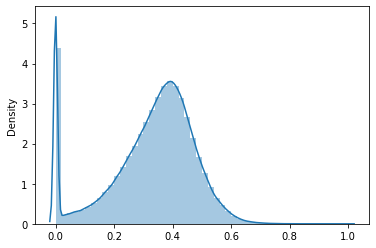

In [54]:
fig = sns.distplot(all_comp.flatten())

First train a keras model on this compendium.

In [55]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]
seq_temp = run_model.run_model('../data_files/sa_NCTC3825_filt_norm_log_01.csv',960,kl1=0, act = 'tanh', tied = True, epochs=1, init='glorot_normal')
arr_temp = run_model.run_model('../data_files/train_set_normalized.csv',960,kl1=0, act = 'tanh', tied = True, epochs=1, init='glorot_normal')
tf_adage = Adage.Adage(arr_temp.autoencoder, arr_temp.history, arr_temp.compendium)
tf_weights = np.array(pd.read_csv('../outputs/ADAGE_OG_weights.csv', header = None))
tf_cost = pd.read_csv('../outputs/ADAGE_OG_cost_log.csv')
tf_adage.weights = tf_weights
tf_adage.loss = tf_cost['cost']
tf_adage.set_hwg_cutoff(2.5).shape

86/86 [==============================] - 1s 6ms/step - loss: 0.6936 - val_loss: 0.6912


(5549, 600)

In [93]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]

model_dict2 = {
    "tf_adage": tf_adage
}
model_dict_seq2 = {
    "tf_adage": tf_adage
}

for seed in range(1):
    for i in inits:
    #print(i)
        for l in L1_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                    print(name)
                    mseq = run_model.run_model('../data_files/sa_NCTC3825_filt_norm_log_01.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)
                    marr = run_model.run_model('../data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)

                    model_dict2[name] = marr
                    model_dict_seq2[name] = mseq

ad_glorot_uniform_0_sigmoid_tiedTrue
Epoch 1/300
194/194 [==============================] - 1s 4ms/step - loss: 0.6547 - val_loss: 0.6270
Epoch 2/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6219 - val_loss: 0.6136
Epoch 3/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6145 - val_loss: 0.6085
Epoch 4/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6108 - val_loss: 0.6053
Epoch 5/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6081 - val_loss: 0.6027
Epoch 6/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6058 - val_loss: 0.6004
Epoch 7/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6035 - val_loss: 0.5980
Epoch 8/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6010 - val_loss: 0.5955
Epoch 9/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5982 - val_loss: 0.5926
Epoch 10/300
194/194 [==============================] 

194/194 [==============================] - 1s 3ms/step - loss: 0.5857 - val_loss: 0.5809
Epoch 82/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5856 - val_loss: 0.5808
Epoch 83/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5856 - val_loss: 0.5808
Epoch 84/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5856 - val_loss: 0.5808
Epoch 85/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5855 - val_loss: 0.5807
Epoch 86/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5855 - val_loss: 0.5807
Epoch 87/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5855 - val_loss: 0.5806
Epoch 88/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5854 - val_loss: 0.5806
Epoch 89/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5854 - val_loss: 0.5805
Epoch 90/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5853 - val_loss: 

Epoch 161/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5831 - val_loss: 0.5780
Epoch 162/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5831 - val_loss: 0.5780
Epoch 163/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5830 - val_loss: 0.5779
Epoch 164/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5830 - val_loss: 0.5779
Epoch 165/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5830 - val_loss: 0.5779
Epoch 166/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5830 - val_loss: 0.5778
Epoch 167/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5829 - val_loss: 0.5778
Epoch 168/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5829 - val_loss: 0.5778
Epoch 169/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5829 - val_loss: 0.5778
Epoch 170/300
194/194 [==============================] - 1s 3ms/step - lo

86/86 [==============================] - 0s 4ms/step - loss: 0.6323 - val_loss: 0.6403
Epoch 21/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6318 - val_loss: 0.6397
Epoch 22/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6312 - val_loss: 0.6391
Epoch 23/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6307 - val_loss: 0.6385
Epoch 24/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6302 - val_loss: 0.6380
Epoch 25/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6296 - val_loss: 0.6374
Epoch 26/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6291 - val_loss: 0.6369
Epoch 27/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6287 - val_loss: 0.6365
Epoch 28/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6282 - val_loss: 0.6360
Epoch 29/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6278 - val_loss: 0.6355
Epoch 30/300


86/86 [==============================] - 0s 4ms/step - loss: 0.6144 - val_loss: 0.6209
Epoch 103/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6142 - val_loss: 0.6207
Epoch 104/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6141 - val_loss: 0.6206
Epoch 105/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6139 - val_loss: 0.6204
Epoch 106/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6137 - val_loss: 0.6202
Epoch 107/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6136 - val_loss: 0.6200
Epoch 108/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6134 - val_loss: 0.6198
Epoch 109/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6133 - val_loss: 0.6197
Epoch 110/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6131 - val_loss: 0.6195
Epoch 111/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6130 - val_loss: 0.6193
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.6034 - val_loss: 0.6106
Epoch 265/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6034 - val_loss: 0.6105
Epoch 266/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6033 - val_loss: 0.6105
Epoch 267/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6033 - val_loss: 0.6105
Epoch 268/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6033 - val_loss: 0.6105
Epoch 269/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6032 - val_loss: 0.6104
Epoch 270/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6032 - val_loss: 0.6104
Epoch 271/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6032 - val_loss: 0.6104
Epoch 272/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6031 - val_loss: 0.6104
Epoch 273/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6031 - val_loss: 0.6104
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.5852 - val_loss: 0.5805
Epoch 125/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5852 - val_loss: 0.5804
Epoch 126/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5851 - val_loss: 0.5804
Epoch 127/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5851 - val_loss: 0.5804
Epoch 128/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5851 - val_loss: 0.5803
Epoch 129/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5850 - val_loss: 0.5803
Epoch 130/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5850 - val_loss: 0.5803
Epoch 131/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5850 - val_loss: 0.5802
Epoch 132/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5850 - val_loss: 0.5802
Epoch 133/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5849 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5816 - val_loss: 0.5766
Epoch 283/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5816 - val_loss: 0.5766
Epoch 284/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5816 - val_loss: 0.5766
Epoch 285/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5816 - val_loss: 0.5766
Epoch 286/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5816 - val_loss: 0.5766
Epoch 287/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5815 - val_loss: 0.5766
Epoch 288/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5815 - val_loss: 0.5766
Epoch 289/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5815 - val_loss: 0.5765
Epoch 290/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5815 - val_loss: 0.5765
Epoch 291/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5815 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6163 - val_loss: 0.6203
Epoch 145/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6162 - val_loss: 0.6203
Epoch 146/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6162 - val_loss: 0.6202
Epoch 147/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6161 - val_loss: 0.6202
Epoch 148/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6161 - val_loss: 0.6201
Epoch 149/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6160 - val_loss: 0.6201
Epoch 150/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6160 - val_loss: 0.6200
Epoch 151/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6159 - val_loss: 0.6200
Epoch 152/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6159 - val_loss: 0.6199
Epoch 153/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6159 - val_loss: 0.6199
Epoc

Epoch 6/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6337 - val_loss: 0.6340
Epoch 7/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6334 - val_loss: 0.6342
Epoch 8/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6333 - val_loss: 0.6341
Epoch 9/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6331 - val_loss: 0.6337
Epoch 10/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6329 - val_loss: 0.6338
Epoch 11/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6327 - val_loss: 0.6333
Epoch 12/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6324 - val_loss: 0.6331
Epoch 13/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6322 - val_loss: 0.6331
Epoch 14/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6320 - val_loss: 0.6326
Epoch 15/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6317 - v

Epoch 166/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5755 - val_loss: 0.5714
Epoch 167/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5755 - val_loss: 0.5713
Epoch 168/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5755 - val_loss: 0.5713
Epoch 169/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5755 - val_loss: 0.5713
Epoch 170/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5755 - val_loss: 0.5713
Epoch 171/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5754 - val_loss: 0.5713
Epoch 172/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5754 - val_loss: 0.5713
Epoch 173/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5754 - val_loss: 0.5713
Epoch 174/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5754 - val_loss: 0.5712
Epoch 175/300
194/194 [==============================] - 0s 3ms/step - lo

86/86 [==============================] - 0s 4ms/step - loss: 0.6284 - val_loss: 0.6409
Epoch 26/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6280 - val_loss: 0.6405
Epoch 27/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6276 - val_loss: 0.6405
Epoch 28/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6273 - val_loss: 0.6401
Epoch 29/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6269 - val_loss: 0.6399
Epoch 30/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6266 - val_loss: 0.6394
Epoch 31/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6262 - val_loss: 0.6389
Epoch 32/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6259 - val_loss: 0.6397
Epoch 33/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6255 - val_loss: 0.6388
Epoch 34/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6252 - val_loss: 0.6390
Epoch 35/300


Epoch 107/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6112 - val_loss: 0.6322
Epoch 108/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6111 - val_loss: 0.6319
Epoch 109/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6110 - val_loss: 0.6321
Epoch 110/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6109 - val_loss: 0.6319
Epoch 111/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6108 - val_loss: 0.6317
Epoch 112/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6107 - val_loss: 0.6319
Epoch 113/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6105 - val_loss: 0.6314
Epoch 114/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6104 - val_loss: 0.6312
Epoch 115/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6103 - val_loss: 0.6314
Epoch 116/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6102 - val_los

86/86 [==============================] - 0s 4ms/step - loss: 0.5961 - val_loss: 0.6110
Epoch 189/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5960 - val_loss: 0.6109
Epoch 190/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5960 - val_loss: 0.6108
Epoch 191/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5959 - val_loss: 0.6106
Epoch 192/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5959 - val_loss: 0.6105
Epoch 193/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5958 - val_loss: 0.6105
Epoch 194/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5958 - val_loss: 0.6103
Epoch 195/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5958 - val_loss: 0.6104
Epoch 196/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5957 - val_loss: 0.6102
Epoch 197/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5957 - val_loss: 0.6102
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.5848 - val_loss: 0.5801
Epoch 50/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5847 - val_loss: 0.5800
Epoch 51/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5846 - val_loss: 0.5799
Epoch 52/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5798
Epoch 53/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5797
Epoch 54/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5796
Epoch 55/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5843 - val_loss: 0.5795
Epoch 56/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5842 - val_loss: 0.5794
Epoch 57/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5841 - val_loss: 0.5793
Epoch 58/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5841 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5780 - val_loss: 0.5737
Epoch 209/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5780 - val_loss: 0.5737
Epoch 210/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5779 - val_loss: 0.5737
Epoch 211/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5779 - val_loss: 0.5737
Epoch 212/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5779 - val_loss: 0.5736
Epoch 213/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5779 - val_loss: 0.5736
Epoch 214/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5779 - val_loss: 0.5736
Epoch 215/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5778 - val_loss: 0.5736
Epoch 216/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5778 - val_loss: 0.5736
Epoch 217/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5778 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6120 - val_loss: 0.6161
Epoch 69/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6119 - val_loss: 0.6160
Epoch 70/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6117 - val_loss: 0.6159
Epoch 71/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6116 - val_loss: 0.6158
Epoch 72/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6114 - val_loss: 0.6156
Epoch 73/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6112 - val_loss: 0.6155
Epoch 74/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6111 - val_loss: 0.6154
Epoch 75/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6109 - val_loss: 0.6153
Epoch 76/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6108 - val_loss: 0.6151
Epoch 77/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6106 - val_loss: 0.6150
Epoch 78/300


86/86 [==============================] - 1s 6ms/step - loss: 0.5990 - val_loss: 0.6072
Epoch 231/300
86/86 [==============================] - 1s 6ms/step - loss: 0.5989 - val_loss: 0.6072
Epoch 232/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5989 - val_loss: 0.6072
Epoch 233/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5989 - val_loss: 0.6071
Epoch 234/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5988 - val_loss: 0.6071
Epoch 235/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5988 - val_loss: 0.6071
Epoch 236/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5988 - val_loss: 0.6071
Epoch 237/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5987 - val_loss: 0.6070
Epoch 238/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5987 - val_loss: 0.6070
Epoch 239/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5986 - val_loss: 0.6070
Epoc

Epoch 11/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5866 - val_loss: 0.5816
Epoch 12/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5861 - val_loss: 0.5812
Epoch 13/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5857 - val_loss: 0.5808
Epoch 14/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5853 - val_loss: 0.5804
Epoch 15/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5850 - val_loss: 0.5800
Epoch 16/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5847 - val_loss: 0.5797
Epoch 17/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.5794
Epoch 18/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5841 - val_loss: 0.5791
Epoch 19/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5838 - val_loss: 0.5789
Epoch 20/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5836

194/194 [==============================] - 1s 3ms/step - loss: 0.5749 - val_loss: 0.5708
Epoch 171/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5749 - val_loss: 0.5707
Epoch 172/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5749 - val_loss: 0.5707
Epoch 173/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5749 - val_loss: 0.5707
Epoch 174/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5749 - val_loss: 0.5707
Epoch 175/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5749 - val_loss: 0.5707
Epoch 176/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5749 - val_loss: 0.5706
Epoch 177/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5748 - val_loss: 0.5706
Epoch 178/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5748 - val_loss: 0.5706
Epoch 179/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5748 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6170 - val_loss: 0.6261
Epoch 30/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6165 - val_loss: 0.6256
Epoch 31/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6160 - val_loss: 0.6252
Epoch 32/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6155 - val_loss: 0.6249
Epoch 33/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6149 - val_loss: 0.6244
Epoch 34/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6144 - val_loss: 0.6239
Epoch 35/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6139 - val_loss: 0.6235
Epoch 36/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6134 - val_loss: 0.6231
Epoch 37/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6129 - val_loss: 0.6227
Epoch 38/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6124 - val_loss: 0.6222
Epoch 39/300


Epoch 111/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5945 - val_loss: 0.6044
Epoch 112/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5944 - val_loss: 0.6044
Epoch 113/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5943 - val_loss: 0.6043
Epoch 114/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5943 - val_loss: 0.6043
Epoch 115/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5942 - val_loss: 0.6042
Epoch 116/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5941 - val_loss: 0.6042
Epoch 117/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5941 - val_loss: 0.6041
Epoch 118/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5940 - val_loss: 0.6041
Epoch 119/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5939 - val_loss: 0.6040
Epoch 120/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5939 - val_los

86/86 [==============================] - 0s 4ms/step - loss: 0.5908 - val_loss: 0.6017
Epoch 193/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5908 - val_loss: 0.6017
Epoch 194/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5908 - val_loss: 0.6017
Epoch 195/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5907 - val_loss: 0.6016
Epoch 196/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5907 - val_loss: 0.6016
Epoch 197/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5907 - val_loss: 0.6016
Epoch 198/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5906 - val_loss: 0.6016
Epoch 199/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5906 - val_loss: 0.6015
Epoch 200/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5906 - val_loss: 0.6015
Epoch 201/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5906 - val_loss: 0.6015
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.5823 - val_loss: 0.5772
Epoch 54/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5822 - val_loss: 0.5772
Epoch 55/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5821 - val_loss: 0.5771
Epoch 56/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5820 - val_loss: 0.5770
Epoch 57/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5819 - val_loss: 0.5769
Epoch 58/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5818 - val_loss: 0.5768
Epoch 59/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5817 - val_loss: 0.5768
Epoch 60/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5816 - val_loss: 0.5767
Epoch 61/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5815 - val_loss: 0.5766
Epoch 62/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5814 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5776 - val_loss: 0.5734
Epoch 134/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5776 - val_loss: 0.5734
Epoch 135/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5776 - val_loss: 0.5734
Epoch 136/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5775 - val_loss: 0.5734
Epoch 137/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5775 - val_loss: 0.5734
Epoch 138/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5775 - val_loss: 0.5733
Epoch 139/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5774 - val_loss: 0.5733
Epoch 140/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5774 - val_loss: 0.5732
Epoch 141/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5774 - val_loss: 0.5732
Epoch 142/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5774 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - val_loss: 0.5713
Epoch 292/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - val_loss: 0.5713
Epoch 293/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - val_loss: 0.5713
Epoch 294/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - val_loss: 0.5712
Epoch 295/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - val_loss: 0.5713
Epoch 296/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - val_loss: 0.5712
Epoch 297/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5749 - val_loss: 0.5712
Epoch 298/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5749 - val_loss: 0.5712
Epoch 299/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5749 - val_loss: 0.5712
Epoch 300/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5749 - v

Epoch 73/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6036 - val_loss: 0.6102
Epoch 74/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6035 - val_loss: 0.6101
Epoch 75/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6033 - val_loss: 0.6099
Epoch 76/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6032 - val_loss: 0.6098
Epoch 77/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6030 - val_loss: 0.6098
Epoch 78/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6029 - val_loss: 0.6097
Epoch 79/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6027 - val_loss: 0.6095
Epoch 80/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6026 - val_loss: 0.6095
Epoch 81/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6025 - val_loss: 0.6095
Epoch 82/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6023 - val_loss: 0.6093


86/86 [==============================] - 0s 4ms/step - loss: 0.5941 - val_loss: 0.6039
Epoch 236/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5941 - val_loss: 0.6039
Epoch 237/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5941 - val_loss: 0.6039
Epoch 238/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5940 - val_loss: 0.6039
Epoch 239/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5940 - val_loss: 0.6038
Epoch 240/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5940 - val_loss: 0.6038
Epoch 241/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5940 - val_loss: 0.6038
Epoch 242/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5939 - val_loss: 0.6038
Epoch 243/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5939 - val_loss: 0.6038
Epoch 244/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5939 - val_loss: 0.6038
Epoc

Epoch 16/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6301 - val_loss: 0.6244
Epoch 17/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6263 - val_loss: 0.6211
Epoch 18/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6234 - val_loss: 0.6185
Epoch 19/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6212 - val_loss: 0.6166
Epoch 20/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6195 - val_loss: 0.6152
Epoch 21/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6182 - val_loss: 0.6140
Epoch 22/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6172 - val_loss: 0.6131
Epoch 23/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6163 - val_loss: 0.6124
Epoch 24/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6156 - val_loss: 0.6117
Epoch 25/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6150

194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5864
Epoch 176/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5864
Epoch 177/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5863
Epoch 178/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5863
Epoch 179/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5863
Epoch 180/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5863
Epoch 181/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5864
Epoch 182/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5864
Epoch 183/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5863
Epoch 184/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6757 - val_loss: 0.6839
Epoch 35/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6751 - val_loss: 0.6833
Epoch 36/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6747 - val_loss: 0.6829
Epoch 37/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6743 - val_loss: 0.6825
Epoch 38/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6740 - val_loss: 0.6822
Epoch 39/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6737 - val_loss: 0.6819
Epoch 40/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6734 - val_loss: 0.6816
Epoch 41/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6732 - val_loss: 0.6814
Epoch 42/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6730 - val_loss: 0.6812
Epoch 43/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6728 - val_loss: 0.6810
Epoch 44/300


Epoch 116/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6562 - val_loss: 0.6671
Epoch 117/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6560 - val_loss: 0.6670
Epoch 118/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6559 - val_loss: 0.6670
Epoch 119/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6557 - val_loss: 0.6669
Epoch 120/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6556 - val_loss: 0.6667
Epoch 121/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6554 - val_loss: 0.6666
Epoch 122/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6553 - val_loss: 0.6665
Epoch 123/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6551 - val_loss: 0.6664
Epoch 124/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6550 - val_loss: 0.6662
Epoch 125/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6548 - val_los

86/86 [==============================] - 0s 4ms/step - loss: 0.6478 - val_loss: 0.6599
Epoch 198/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6477 - val_loss: 0.6599
Epoch 199/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6476 - val_loss: 0.6597
Epoch 200/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6475 - val_loss: 0.6596
Epoch 201/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6474 - val_loss: 0.6595
Epoch 202/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6473 - val_loss: 0.6593
Epoch 203/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6472 - val_loss: 0.6592
Epoch 204/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6471 - val_loss: 0.6591
Epoch 205/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6470 - val_loss: 0.6590
Epoch 206/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6469 - val_loss: 0.6589
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 59/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 60/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 61/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 62/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 63/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 64/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 65/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 66/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 67/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 139/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 140/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 141/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 142/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 143/300
194/194 [==============================] - 1s 4ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 144/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 145/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 146/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 147/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 297/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 298/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 299/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 300/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 1/300
86/86 [==============================] - 1s 5ms/step - loss: 0.9445 - val_loss: 0.9250
Epoch 2/300
86/86 [==============================] - 0s 5ms/step - loss: 0.9013 - val_loss: 0.8921
Epoch 3/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8740 - val_loss: 0.8751
Epoch 4/300
86/86 [==============================] - 0s 4ms/step - loss: 0.8580 - val_loss: 0.8620
Epoch 5/300
86/86 [==============================] - 0s 4ms/step - loss: 0.8447 - val_loss: 0.8493
Epoc

86/86 [==============================] - 0s 5ms/step - loss: 0.6367 - val_loss: 0.6478
Epoch 79/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6367 - val_loss: 0.6477
Epoch 80/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6367 - val_loss: 0.6477
Epoch 81/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6366 - val_loss: 0.6477
Epoch 82/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6366 - val_loss: 0.6477
Epoch 83/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6366 - val_loss: 0.6476
Epoch 84/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6366 - val_loss: 0.6475
Epoch 85/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6365 - val_loss: 0.6474
Epoch 86/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6365 - val_loss: 0.6474
Epoch 87/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6365 - val_loss: 0.6474
Epoch 88/300


86/86 [==============================] - 0s 5ms/step - loss: 0.6296 - val_loss: 0.6359
Epoch 241/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6296 - val_loss: 0.6358
Epoch 242/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6296 - val_loss: 0.6358
Epoch 243/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6295 - val_loss: 0.6358
Epoch 244/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6295 - val_loss: 0.6357
Epoch 245/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6295 - val_loss: 0.6357
Epoch 246/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6294 - val_loss: 0.6356
Epoch 247/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6294 - val_loss: 0.6356
Epoch 248/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6294 - val_loss: 0.6356
Epoch 249/300
86/86 [==============================] - 1s 8ms/step - loss: 0.6294 - val_loss: 0.6355
Epoc

Epoch 21/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6581 - val_loss: 0.6564
Epoch 22/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6572 - val_loss: 0.6556
Epoch 23/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6566 - val_loss: 0.6550
Epoch 24/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6559 - val_loss: 0.6544
Epoch 25/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6554 - val_loss: 0.6539
Epoch 26/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6548 - val_loss: 0.6533
Epoch 27/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6542 - val_loss: 0.6527
Epoch 28/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6537 - val_loss: 0.6522
Epoch 29/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6531 - val_loss: 0.6516
Epoch 30/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6525

194/194 [==============================] - 1s 3ms/step - loss: 0.5894 - val_loss: 0.5858
Epoch 181/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5894 - val_loss: 0.5857
Epoch 182/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5894 - val_loss: 0.5857
Epoch 183/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5894 - val_loss: 0.5858
Epoch 184/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5894 - val_loss: 0.5857
Epoch 185/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5894 - val_loss: 0.5857
Epoch 186/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5894 - val_loss: 0.5857
Epoch 187/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5894 - val_loss: 0.5857
Epoch 188/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5894 - val_loss: 0.5857
Epoch 189/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5893 - v

Epoch 40/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6731 - val_loss: 0.6806
Epoch 41/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6728 - val_loss: 0.6803
Epoch 42/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6726 - val_loss: 0.6799
Epoch 43/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6723 - val_loss: 0.6797
Epoch 44/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6721 - val_loss: 0.6795
Epoch 45/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6719 - val_loss: 0.6794
Epoch 46/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6717 - val_loss: 0.6792
Epoch 47/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6715 - val_loss: 0.6790
Epoch 48/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6714 - val_loss: 0.6787
Epoch 49/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6712 - val_loss: 0.6788


86/86 [==============================] - 0s 5ms/step - loss: 0.6504 - val_loss: 0.6600
Epoch 203/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6503 - val_loss: 0.6599
Epoch 204/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6502 - val_loss: 0.6599
Epoch 205/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6501 - val_loss: 0.6598
Epoch 206/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6501 - val_loss: 0.6598
Epoch 207/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6500 - val_loss: 0.6597
Epoch 208/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6499 - val_loss: 0.6596
Epoch 209/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6498 - val_loss: 0.6596
Epoch 210/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6497 - val_loss: 0.6595
Epoch 211/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6496 - val_loss: 0.6595
Epoc

194/194 [==============================] - 2s 11ms/step - loss: 0.5890 - val_loss: 0.5851
Epoch 64/300
194/194 [==============================] - 2s 11ms/step - loss: 0.5890 - val_loss: 0.5851
Epoch 65/300
194/194 [==============================] - 1s 4ms/step - loss: 0.5890 - val_loss: 0.5850
Epoch 66/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5890 - val_loss: 0.5851
Epoch 67/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5889 - val_loss: 0.5850
Epoch 68/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5889 - val_loss: 0.5850
Epoch 69/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5889 - val_loss: 0.5851
Epoch 70/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5889 - val_loss: 0.5849
Epoch 71/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5889 - val_loss: 0.5850
Epoch 72/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5889 - val_loss

194/194 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5837
Epoch 144/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5836
Epoch 145/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5835
Epoch 146/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5877 - val_loss: 0.5836
Epoch 147/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5877 - val_loss: 0.5835
Epoch 148/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5877 - val_loss: 0.5835
Epoch 149/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5876 - val_loss: 0.5834
Epoch 150/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5876 - val_loss: 0.5834
Epoch 151/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5876 - val_loss: 0.5833
Epoch 152/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5875 - v

86/86 [==============================] - 1s 6ms/step - loss: 0.9423 - val_loss: 0.9199
Epoch 2/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8956 - val_loss: 0.8898
Epoch 3/300
86/86 [==============================] - 0s 4ms/step - loss: 0.8721 - val_loss: 0.8747
Epoch 4/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8573 - val_loss: 0.8611
Epoch 5/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8438 - val_loss: 0.8472
Epoch 6/300
86/86 [==============================] - 0s 4ms/step - loss: 0.8306 - val_loss: 0.8333
Epoch 7/300
86/86 [==============================] - 0s 4ms/step - loss: 0.8176 - val_loss: 0.8198
Epoch 8/300
86/86 [==============================] - 0s 4ms/step - loss: 0.8049 - val_loss: 0.8065
Epoch 9/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7926 - val_loss: 0.7939
Epoch 10/300
86/86 [==============================] - 0s 4ms/step - loss: 0.7808 - val_loss: 0.7818
Epoch 11/300
86/86 [=

86/86 [==============================] - 0s 5ms/step - loss: 0.6184 - val_loss: 0.6221
Epoch 165/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6183 - val_loss: 0.6222
Epoch 166/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6183 - val_loss: 0.6221
Epoch 167/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6182 - val_loss: 0.6220
Epoch 168/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6182 - val_loss: 0.6219
Epoch 169/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6181 - val_loss: 0.6219
Epoch 170/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6181 - val_loss: 0.6220
Epoch 171/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6181 - val_loss: 0.6219
Epoch 172/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6180 - val_loss: 0.6218
Epoch 173/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6180 - val_loss: 0.6219
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.6039 - val_loss: 0.5993
Epoch 26/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6030 - val_loss: 0.5985
Epoch 27/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6022 - val_loss: 0.5976
Epoch 28/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6015 - val_loss: 0.5969
Epoch 29/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6008 - val_loss: 0.5962
Epoch 30/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6001 - val_loss: 0.5955
Epoch 31/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5995 - val_loss: 0.5949
Epoch 32/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5989 - val_loss: 0.5943
Epoch 33/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5984 - val_loss: 0.5937
Epoch 34/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5979 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5875 - val_loss: 0.5833
Epoch 185/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5875 - val_loss: 0.5833
Epoch 186/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5875 - val_loss: 0.5833
Epoch 187/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5875 - val_loss: 0.5833
Epoch 188/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5875 - val_loss: 0.5833
Epoch 189/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5875 - val_loss: 0.5833
Epoch 190/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5874 - val_loss: 0.5833
Epoch 191/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5874 - val_loss: 0.5833
Epoch 192/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5874 - val_loss: 0.5833
Epoch 193/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5874 - v

86/86 [==============================] - 0s 5ms/step - loss: 0.6438 - val_loss: 0.6505
Epoch 45/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6431 - val_loss: 0.6498
Epoch 46/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6425 - val_loss: 0.6493
Epoch 47/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6419 - val_loss: 0.6487
Epoch 48/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6414 - val_loss: 0.6482
Epoch 49/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6408 - val_loss: 0.6477
Epoch 50/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6403 - val_loss: 0.6473
Epoch 51/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6399 - val_loss: 0.6469
Epoch 52/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6394 - val_loss: 0.6465
Epoch 53/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6390 - val_loss: 0.6462
Epoch 54/300


Epoch 126/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6312 - val_loss: 0.6404
Epoch 127/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6312 - val_loss: 0.6404
Epoch 128/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6312 - val_loss: 0.6404
Epoch 129/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6311 - val_loss: 0.6404
Epoch 130/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6311 - val_loss: 0.6404
Epoch 131/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6311 - val_loss: 0.6404
Epoch 132/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6311 - val_loss: 0.6404
Epoch 133/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6311 - val_loss: 0.6403
Epoch 134/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6311 - val_loss: 0.6404
Epoch 135/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6311 - val_los

86/86 [==============================] - 0s 5ms/step - loss: 0.6305 - val_loss: 0.6402
Epoch 208/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6305 - val_loss: 0.6401
Epoch 209/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6305 - val_loss: 0.6401
Epoch 210/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6305 - val_loss: 0.6402
Epoch 211/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6305 - val_loss: 0.6401
Epoch 212/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6305 - val_loss: 0.6401
Epoch 213/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6305 - val_loss: 0.6401
Epoch 214/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6304 - val_loss: 0.6401
Epoch 215/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6304 - val_loss: 0.6401
Epoch 216/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6304 - val_loss: 0.6401
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5826
Epoch 69/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5872 - val_loss: 0.5826
Epoch 70/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5872 - val_loss: 0.5825
Epoch 71/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5871 - val_loss: 0.5824
Epoch 72/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5871 - val_loss: 0.5824
Epoch 73/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 0.5823
Epoch 74/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 0.5823
Epoch 75/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 0.5822
Epoch 76/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5869 - val_loss: 0.5822
Epoch 77/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5869 - val_loss: 

Epoch 148/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5849 - val_loss: 0.5800
Epoch 149/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5849 - val_loss: 0.5799
Epoch 150/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5849 - val_loss: 0.5799
Epoch 151/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5849 - val_loss: 0.5800
Epoch 152/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5849 - val_loss: 0.5799
Epoch 153/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5849 - val_loss: 0.5799
Epoch 154/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5849 - val_loss: 0.5799
Epoch 155/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5848 - val_loss: 0.5799
Epoch 156/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5848 - val_loss: 0.5799
Epoch 157/300
194/194 [==============================] - 1s 3ms/step - lo

Epoch 7/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8145 - val_loss: 0.8155
Epoch 8/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8019 - val_loss: 0.8024
Epoch 9/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7894 - val_loss: 0.7895
Epoch 10/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7772 - val_loss: 0.7769
Epoch 11/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7653 - val_loss: 0.7647
Epoch 12/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7539 - val_loss: 0.7531
Epoch 13/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7430 - val_loss: 0.7422
Epoch 14/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7328 - val_loss: 0.7320
Epoch 15/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7231 - val_loss: 0.7224
Epoch 16/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7140 - val_loss: 0.7135
Epo

Epoch 89/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6176 - val_loss: 0.6210
Epoch 90/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6175 - val_loss: 0.6210
Epoch 91/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6174 - val_loss: 0.6208
Epoch 92/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6173 - val_loss: 0.6208
Epoch 93/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6172 - val_loss: 0.6207
Epoch 94/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6171 - val_loss: 0.6207
Epoch 95/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6170 - val_loss: 0.6206
Epoch 96/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6169 - val_loss: 0.6205
Epoch 97/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6168 - val_loss: 0.6204
Epoch 98/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6167 - val_loss: 0.6204


86/86 [==============================] - 0s 5ms/step - loss: 0.6085 - val_loss: 0.6146
Epoch 252/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6085 - val_loss: 0.6146
Epoch 253/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6085 - val_loss: 0.6146
Epoch 254/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6084 - val_loss: 0.6146
Epoch 255/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6084 - val_loss: 0.6145
Epoch 256/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6084 - val_loss: 0.6146
Epoch 257/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6083 - val_loss: 0.6145
Epoch 258/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6083 - val_loss: 0.6145
Epoch 259/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6083 - val_loss: 0.6145
Epoch 260/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6082 - val_loss: 0.6145
Epoc

194/194 [==============================] - 0s 3ms/step - loss: 0.5846 - val_loss: 0.5795
Epoch 112/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.5795
Epoch 113/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5845 - val_loss: 0.5794
Epoch 114/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5794
Epoch 115/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5794
Epoch 116/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.5793
Epoch 117/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5793
Epoch 118/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5843 - val_loss: 0.5792
Epoch 119/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5843 - val_loss: 0.5792
Epoch 120/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5843 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5801 - val_loss: 0.5755
Epoch 270/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5801 - val_loss: 0.5755
Epoch 271/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5801 - val_loss: 0.5755
Epoch 272/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5800 - val_loss: 0.5755
Epoch 273/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5800 - val_loss: 0.5754
Epoch 274/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5800 - val_loss: 0.5754
Epoch 275/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5800 - val_loss: 0.5754
Epoch 276/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5800 - val_loss: 0.5754
Epoch 277/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5800 - val_loss: 0.5754
Epoch 278/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5799 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6104 - val_loss: 0.6164
Epoch 132/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6103 - val_loss: 0.6162
Epoch 133/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6102 - val_loss: 0.6161
Epoch 134/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6101 - val_loss: 0.6161
Epoch 135/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6100 - val_loss: 0.6159
Epoch 136/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6100 - val_loss: 0.6159
Epoch 137/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6099 - val_loss: 0.6158
Epoch 138/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6098 - val_loss: 0.6157
Epoch 139/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6097 - val_loss: 0.6156
Epoch 140/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6096 - val_loss: 0.6155
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.6025 - val_loss: 0.6099
Epoch 294/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6025 - val_loss: 0.6099
Epoch 295/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6025 - val_loss: 0.6099
Epoch 296/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6024 - val_loss: 0.6099
Epoch 297/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6024 - val_loss: 0.6098
Epoch 298/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6024 - val_loss: 0.6098
Epoch 299/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6023 - val_loss: 0.6098
Epoch 300/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6023 - val_loss: 0.6098
ad_glorot_normal_0_sigmoid_tiedFalse
Epoch 1/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6264 - val_loss: 0.5875
Epoch 2/300
194/194 [==============================] - 1s 3ms/step -

Epoch 153/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5843 - val_loss: 0.5793
Epoch 154/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5842 - val_loss: 0.5793
Epoch 155/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5842 - val_loss: 0.5793
Epoch 156/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5842 - val_loss: 0.5792
Epoch 157/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5842 - val_loss: 0.5792
Epoch 158/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5841 - val_loss: 0.5791
Epoch 159/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5841 - val_loss: 0.5791
Epoch 160/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5841 - val_loss: 0.5791
Epoch 161/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5841 - val_loss: 0.5791
Epoch 162/300
194/194 [==============================] - 1s 3ms/step - lo

86/86 [==============================] - 0s 4ms/step - loss: 0.6356 - val_loss: 0.6457
Epoch 13/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6353 - val_loss: 0.6453
Epoch 14/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6350 - val_loss: 0.6449
Epoch 15/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6347 - val_loss: 0.6444
Epoch 16/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6344 - val_loss: 0.6437
Epoch 17/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6341 - val_loss: 0.6432
Epoch 18/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6338 - val_loss: 0.6427
Epoch 19/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6335 - val_loss: 0.6422
Epoch 20/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6331 - val_loss: 0.6417
Epoch 21/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6328 - val_loss: 0.6411
Epoch 22/300


86/86 [==============================] - 0s 4ms/step - loss: 0.6183 - val_loss: 0.6226
Epoch 95/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6183 - val_loss: 0.6225
Epoch 96/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6182 - val_loss: 0.6224
Epoch 97/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6182 - val_loss: 0.6224
Epoch 98/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6181 - val_loss: 0.6223
Epoch 99/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6181 - val_loss: 0.6223
Epoch 100/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6180 - val_loss: 0.6222
Epoch 101/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6180 - val_loss: 0.6222
Epoch 102/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6179 - val_loss: 0.6221
Epoch 103/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6179 - val_loss: 0.6221
Epoch 104

86/86 [==============================] - 0s 4ms/step - loss: 0.6106 - val_loss: 0.6154
Epoch 257/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6106 - val_loss: 0.6153
Epoch 258/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6106 - val_loss: 0.6153
Epoch 259/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6105 - val_loss: 0.6153
Epoch 260/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6105 - val_loss: 0.6152
Epoch 261/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6104 - val_loss: 0.6152
Epoch 262/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6104 - val_loss: 0.6152
Epoch 263/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6103 - val_loss: 0.6151
Epoch 264/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6103 - val_loss: 0.6151
Epoch 265/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6102 - val_loss: 0.6151
Epoc

194/194 [==============================] - 0s 3ms/step - loss: 0.5766 - val_loss: 0.5723
Epoch 117/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5765 - val_loss: 0.5723
Epoch 118/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5765 - val_loss: 0.5723
Epoch 119/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5765 - val_loss: 0.5723
Epoch 120/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5765 - val_loss: 0.5722
Epoch 121/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5764 - val_loss: 0.5722
Epoch 122/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5764 - val_loss: 0.5722
Epoch 123/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5764 - val_loss: 0.5722
Epoch 124/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5764 - val_loss: 0.5721
Epoch 125/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5763 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5744 - val_loss: 0.5702
Epoch 275/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5744 - val_loss: 0.5702
Epoch 276/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5744 - val_loss: 0.5702
Epoch 277/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5744 - val_loss: 0.5702
Epoch 278/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5744 - val_loss: 0.5702
Epoch 279/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5744 - val_loss: 0.5702
Epoch 280/300
194/194 [==============================] - 1s 4ms/step - loss: 0.5744 - val_loss: 0.5702
Epoch 281/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5743 - val_loss: 0.5702
Epoch 282/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5743 - val_loss: 0.5702
Epoch 283/300
194/194 [==============================] - 1s 4ms/step - loss: 0.5743 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6086 - val_loss: 0.6304
Epoch 137/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6085 - val_loss: 0.6303
Epoch 138/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6084 - val_loss: 0.6302
Epoch 139/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6084 - val_loss: 0.6300
Epoch 140/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6083 - val_loss: 0.6300
Epoch 141/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6082 - val_loss: 0.6301
Epoch 142/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6081 - val_loss: 0.6302
Epoch 143/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6080 - val_loss: 0.6299
Epoch 144/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6079 - val_loss: 0.6300
Epoch 145/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6078 - val_loss: 0.6297
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.5928 - val_loss: 0.6067
Epoch 299/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5928 - val_loss: 0.6068
Epoch 300/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5928 - val_loss: 0.6067
ad_glorot_normal_0_tanh_tiedFalse
Epoch 1/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6205 - val_loss: 0.5863
Epoch 2/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5887 - val_loss: 0.5846
Epoch 3/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5882 - val_loss: 0.5844
Epoch 4/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5881 - val_loss: 0.5843
Epoch 5/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5881 - val_loss: 0.5843
Epoch 6/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5881 - val_loss: 0.5843
Epoch 7/300
194/194 [==============================] - 1s 3ms/step - lo

Epoch 158/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5789 - val_loss: 0.5746
Epoch 159/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5789 - val_loss: 0.5745
Epoch 160/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5789 - val_loss: 0.5745
Epoch 161/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5788 - val_loss: 0.5745
Epoch 162/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5788 - val_loss: 0.5745
Epoch 163/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5788 - val_loss: 0.5744
Epoch 164/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5787 - val_loss: 0.5744
Epoch 165/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5787 - val_loss: 0.5744
Epoch 166/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5787 - val_loss: 0.5744
Epoch 167/300
194/194 [==============================] - 1s 3ms/step - lo

86/86 [==============================] - 0s 4ms/step - loss: 0.6242 - val_loss: 0.6285
Epoch 18/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6236 - val_loss: 0.6278
Epoch 19/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6230 - val_loss: 0.6272
Epoch 20/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6225 - val_loss: 0.6266
Epoch 21/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6221 - val_loss: 0.6260
Epoch 22/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6216 - val_loss: 0.6255
Epoch 23/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6212 - val_loss: 0.6251
Epoch 24/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6208 - val_loss: 0.6246
Epoch 25/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6204 - val_loss: 0.6242
Epoch 26/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6201 - val_loss: 0.6239
Epoch 27/300


86/86 [==============================] - 0s 4ms/step - loss: 0.6077 - val_loss: 0.6128
Epoch 100/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6076 - val_loss: 0.6127
Epoch 101/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6074 - val_loss: 0.6126
Epoch 102/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6073 - val_loss: 0.6125
Epoch 103/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6072 - val_loss: 0.6124
Epoch 104/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6071 - val_loss: 0.6124
Epoch 105/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6070 - val_loss: 0.6123
Epoch 106/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6069 - val_loss: 0.6122
Epoch 107/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6068 - val_loss: 0.6121
Epoch 108/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6067 - val_loss: 0.6121
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.5979 - val_loss: 0.6065
Epoch 262/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5979 - val_loss: 0.6065
Epoch 263/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5979 - val_loss: 0.6064
Epoch 264/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5979 - val_loss: 0.6064
Epoch 265/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5978 - val_loss: 0.6064
Epoch 266/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5978 - val_loss: 0.6064
Epoch 267/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5978 - val_loss: 0.6064
Epoch 268/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5977 - val_loss: 0.6064
Epoch 269/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5977 - val_loss: 0.6063
Epoch 270/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5977 - val_loss: 0.6063
Epoc

194/194 [==============================] - 0s 3ms/step - loss: 0.5759 - val_loss: 0.5718
Epoch 122/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5759 - val_loss: 0.5718
Epoch 123/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5759 - val_loss: 0.5718
Epoch 124/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5758 - val_loss: 0.5717
Epoch 125/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5758 - val_loss: 0.5717
Epoch 126/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5758 - val_loss: 0.5717
Epoch 127/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5758 - val_loss: 0.5717
Epoch 128/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5757 - val_loss: 0.5717
Epoch 129/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5757 - val_loss: 0.5716
Epoch 130/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5757 - v

194/194 [==============================] - 0s 3ms/step - loss: 0.5738 - val_loss: 0.5694
Epoch 280/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5738 - val_loss: 0.5694
Epoch 281/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5737 - val_loss: 0.5694
Epoch 282/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5737 - val_loss: 0.5694
Epoch 283/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5737 - val_loss: 0.5694
Epoch 284/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5737 - val_loss: 0.5693
Epoch 285/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5737 - val_loss: 0.5693
Epoch 286/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5737 - val_loss: 0.5693
Epoch 287/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5737 - val_loss: 0.5693
Epoch 288/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5737 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.5927 - val_loss: 0.6029
Epoch 142/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5926 - val_loss: 0.6029
Epoch 143/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5926 - val_loss: 0.6029
Epoch 144/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5925 - val_loss: 0.6028
Epoch 145/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5925 - val_loss: 0.6028
Epoch 146/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5925 - val_loss: 0.6028
Epoch 147/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5924 - val_loss: 0.6027
Epoch 148/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5924 - val_loss: 0.6027
Epoch 149/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5923 - val_loss: 0.6027
Epoch 150/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5923 - val_loss: 0.6027
Epoc

Epoch 3/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5885 - val_loss: 0.5848
Epoch 4/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5883 - val_loss: 0.5845
Epoch 5/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5881 - val_loss: 0.5842
Epoch 6/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5840
Epoch 7/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5838
Epoch 8/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5877 - val_loss: 0.5835
Epoch 9/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5875 - val_loss: 0.5834
Epoch 10/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5874 - val_loss: 0.5832
Epoch 11/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5872 - val_loss: 0.5830
Epoch 12/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5871 - val_

Epoch 163/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5769 - val_loss: 0.5727
Epoch 164/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5768 - val_loss: 0.5727
Epoch 165/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5768 - val_loss: 0.5727
Epoch 166/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5768 - val_loss: 0.5727
Epoch 167/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5768 - val_loss: 0.5727
Epoch 168/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5768 - val_loss: 0.5727
Epoch 169/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5767 - val_loss: 0.5726
Epoch 170/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5767 - val_loss: 0.5726
Epoch 171/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5767 - val_loss: 0.5726
Epoch 172/300
194/194 [==============================] - 1s 3ms/step - lo

86/86 [==============================] - 0s 4ms/step - loss: 0.6161 - val_loss: 0.6196
Epoch 23/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6159 - val_loss: 0.6193
Epoch 24/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6156 - val_loss: 0.6190
Epoch 25/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6153 - val_loss: 0.6187
Epoch 26/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6150 - val_loss: 0.6184
Epoch 27/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6147 - val_loss: 0.6183
Epoch 28/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6144 - val_loss: 0.6179
Epoch 29/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6140 - val_loss: 0.6176
Epoch 30/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6137 - val_loss: 0.6173
Epoch 31/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6135 - val_loss: 0.6171
Epoch 32/300


86/86 [==============================] - 0s 4ms/step - loss: 0.5999 - val_loss: 0.6077
Epoch 105/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5998 - val_loss: 0.6077
Epoch 106/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5997 - val_loss: 0.6075
Epoch 107/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5997 - val_loss: 0.6076
Epoch 108/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5996 - val_loss: 0.6076
Epoch 109/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5995 - val_loss: 0.6075
Epoch 110/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5995 - val_loss: 0.6074
Epoch 111/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5994 - val_loss: 0.6073
Epoch 112/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5993 - val_loss: 0.6073
Epoch 113/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5992 - val_loss: 0.6072
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.5932 - val_loss: 0.6033
Epoch 267/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5932 - val_loss: 0.6033
Epoch 268/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5932 - val_loss: 0.6033
Epoch 269/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5932 - val_loss: 0.6033
Epoch 270/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5931 - val_loss: 0.6033
Epoch 271/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5931 - val_loss: 0.6033
Epoch 272/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5931 - val_loss: 0.6032
Epoch 273/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5931 - val_loss: 0.6032
Epoch 274/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5930 - val_loss: 0.6032
Epoch 275/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5930 - val_loss: 0.6032
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.5914 - val_loss: 0.5877
Epoch 127/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5914 - val_loss: 0.5876
Epoch 128/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5913 - val_loss: 0.5876
Epoch 129/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5913 - val_loss: 0.5876
Epoch 130/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5913 - val_loss: 0.5875
Epoch 131/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5912 - val_loss: 0.5875
Epoch 132/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5912 - val_loss: 0.5875
Epoch 133/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5912 - val_loss: 0.5874
Epoch 134/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5912 - val_loss: 0.5874
Epoch 135/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5911 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5861
Epoch 285/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5860
Epoch 286/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5860
Epoch 287/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5860
Epoch 288/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5860
Epoch 289/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5860
Epoch 290/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5860
Epoch 291/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5860
Epoch 292/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5860
Epoch 293/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6532 - val_loss: 0.6650
Epoch 147/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6532 - val_loss: 0.6649
Epoch 148/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6531 - val_loss: 0.6649
Epoch 149/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6530 - val_loss: 0.6648
Epoch 150/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6529 - val_loss: 0.6648
Epoch 151/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6528 - val_loss: 0.6647
Epoch 152/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6527 - val_loss: 0.6646
Epoch 153/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6526 - val_loss: 0.6646
Epoch 154/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6526 - val_loss: 0.6645
Epoch 155/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6525 - val_loss: 0.6645
Epoc

Epoch 8/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6674 - val_loss: 0.6589
Epoch 9/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6582 - val_loss: 0.6501
Epoch 10/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6497 - val_loss: 0.6419
Epoch 11/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6419 - val_loss: 0.6345
Epoch 12/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6349 - val_loss: 0.6278
Epoch 13/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6285 - val_loss: 0.6218
Epoch 14/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6227 - val_loss: 0.6164
Epoch 15/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6176 - val_loss: 0.6115
Epoch 16/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6130 - val_loss: 0.6072
Epoch 17/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6089 -

Epoch 168/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 169/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 170/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 171/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 172/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 173/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 174/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 175/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 176/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 177/300
194/194 [==============================] - 1s 3ms/step - lo

86/86 [==============================] - 0s 4ms/step - loss: 0.6669 - val_loss: 0.6750
Epoch 28/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6637 - val_loss: 0.6719
Epoch 29/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6606 - val_loss: 0.6690
Epoch 30/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6579 - val_loss: 0.6664
Epoch 31/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6553 - val_loss: 0.6640
Epoch 32/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6530 - val_loss: 0.6619
Epoch 33/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6510 - val_loss: 0.6600
Epoch 34/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6491 - val_loss: 0.6583
Epoch 35/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6475 - val_loss: 0.6568
Epoch 36/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6460 - val_loss: 0.6554
Epoch 37/300


Epoch 109/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6351 - val_loss: 0.6449
Epoch 110/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6351 - val_loss: 0.6448
Epoch 111/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6350 - val_loss: 0.6447
Epoch 112/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6349 - val_loss: 0.6446
Epoch 113/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6349 - val_loss: 0.6445
Epoch 114/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6348 - val_loss: 0.6444
Epoch 115/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6348 - val_loss: 0.6443
Epoch 116/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6347 - val_loss: 0.6442
Epoch 117/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6346 - val_loss: 0.6441
Epoch 118/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6346 - val_los

86/86 [==============================] - 0s 5ms/step - loss: 0.6309 - val_loss: 0.6381
Epoch 191/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6308 - val_loss: 0.6380
Epoch 192/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6308 - val_loss: 0.6380
Epoch 193/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6308 - val_loss: 0.6379
Epoch 194/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6307 - val_loss: 0.6379
Epoch 195/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6307 - val_loss: 0.6378
Epoch 196/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6306 - val_loss: 0.6378
Epoch 197/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6306 - val_loss: 0.6377
Epoch 198/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6306 - val_loss: 0.6376
Epoch 199/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6305 - val_loss: 0.6376
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.6406 - val_loss: 0.6375
Epoch 52/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6402 - val_loss: 0.6370
Epoch 53/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6397 - val_loss: 0.6364
Epoch 54/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6392 - val_loss: 0.6357
Epoch 55/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6379 - val_loss: 0.6332
Epoch 56/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6338 - val_loss: 0.6274
Epoch 57/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6262 - val_loss: 0.6177
Epoch 58/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6154 - val_loss: 0.6061
Epoch 59/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6052 - val_loss: 0.5978
Epoch 60/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5997 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5892 - val_loss: 0.5855
Epoch 211/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5892 - val_loss: 0.5855
Epoch 212/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5892 - val_loss: 0.5854
Epoch 213/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5892 - val_loss: 0.5854
Epoch 214/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5891 - val_loss: 0.5855
Epoch 215/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5891 - val_loss: 0.5854
Epoch 216/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5891 - val_loss: 0.5854
Epoch 217/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5891 - val_loss: 0.5854
Epoch 218/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5891 - val_loss: 0.5854
Epoch 219/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5891 - v

Epoch 71/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6688 - val_loss: 0.6762
Epoch 72/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6686 - val_loss: 0.6761
Epoch 73/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6685 - val_loss: 0.6760
Epoch 74/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6684 - val_loss: 0.6759
Epoch 75/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6683 - val_loss: 0.6758
Epoch 76/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6681 - val_loss: 0.6756
Epoch 77/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6680 - val_loss: 0.6755
Epoch 78/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6678 - val_loss: 0.6754
Epoch 79/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6677 - val_loss: 0.6753
Epoch 80/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6676 - val_loss: 0.6751


86/86 [==============================] - 0s 5ms/step - loss: 0.6487 - val_loss: 0.6589
Epoch 234/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6486 - val_loss: 0.6588
Epoch 235/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6486 - val_loss: 0.6588
Epoch 236/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6485 - val_loss: 0.6587
Epoch 237/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6484 - val_loss: 0.6587
Epoch 238/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6484 - val_loss: 0.6587
Epoch 239/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6483 - val_loss: 0.6586
Epoch 240/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6482 - val_loss: 0.6585
Epoch 241/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6482 - val_loss: 0.6585
Epoch 242/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6481 - val_loss: 0.6585
Epoc

Epoch 14/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6230 - val_loss: 0.6167
Epoch 15/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6179 - val_loss: 0.6119
Epoch 16/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6134 - val_loss: 0.6076
Epoch 17/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6094 - val_loss: 0.6040
Epoch 18/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6060 - val_loss: 0.6007
Epoch 19/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6030 - val_loss: 0.5980
Epoch 20/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6005 - val_loss: 0.5957
Epoch 21/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5983 - val_loss: 0.5938
Epoch 22/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5966 - val_loss: 0.5923
Epoch 23/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5953

194/194 [==============================] - 1s 3ms/step - loss: 0.5871 - val_loss: 0.5828
Epoch 174/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5871 - val_loss: 0.5828
Epoch 175/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5871 - val_loss: 0.5828
Epoch 176/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 0.5827
Epoch 177/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 0.5826
Epoch 178/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 0.5826
Epoch 179/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 0.5827
Epoch 180/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5869 - val_loss: 0.5827
Epoch 181/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5869 - val_loss: 0.5825
Epoch 182/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5869 - v

86/86 [==============================] - 0s 5ms/step - loss: 0.6424 - val_loss: 0.6451
Epoch 33/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6402 - val_loss: 0.6431
Epoch 34/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6383 - val_loss: 0.6413
Epoch 35/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6366 - val_loss: 0.6397
Epoch 36/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6352 - val_loss: 0.6383
Epoch 37/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6339 - val_loss: 0.6371
Epoch 38/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6327 - val_loss: 0.6360
Epoch 39/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6318 - val_loss: 0.6351
Epoch 40/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6309 - val_loss: 0.6345
Epoch 41/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6302 - val_loss: 0.6337
Epoch 42/300


Epoch 114/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6209 - val_loss: 0.6244
Epoch 115/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6208 - val_loss: 0.6244
Epoch 116/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6208 - val_loss: 0.6243
Epoch 117/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6207 - val_loss: 0.6243
Epoch 118/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6207 - val_loss: 0.6242
Epoch 119/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6206 - val_loss: 0.6242
Epoch 120/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6206 - val_loss: 0.6241
Epoch 121/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6205 - val_loss: 0.6242
Epoch 122/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6205 - val_loss: 0.6240
Epoch 123/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6204 - val_los

86/86 [==============================] - 0s 5ms/step - loss: 0.6172 - val_loss: 0.6211
Epoch 196/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6172 - val_loss: 0.6211
Epoch 197/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6171 - val_loss: 0.6211
Epoch 198/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6171 - val_loss: 0.6210
Epoch 199/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6170 - val_loss: 0.6210
Epoch 200/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6170 - val_loss: 0.6210
Epoch 201/300
86/86 [==============================] - 0s 6ms/step - loss: 0.6170 - val_loss: 0.6209
Epoch 202/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6169 - val_loss: 0.6209
Epoch 203/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6169 - val_loss: 0.6209
Epoch 204/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6169 - val_loss: 0.6209
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.5924 - val_loss: 0.5879
Epoch 57/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5922 - val_loss: 0.5877
Epoch 58/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5921 - val_loss: 0.5876
Epoch 59/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5919 - val_loss: 0.5875
Epoch 60/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5918 - val_loss: 0.5873
Epoch 61/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5916 - val_loss: 0.5873
Epoch 62/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5915 - val_loss: 0.5871
Epoch 63/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5914 - val_loss: 0.5870
Epoch 64/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5913 - val_loss: 0.5868
Epoch 65/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5911 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5837
Epoch 137/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5837
Epoch 138/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5836
Epoch 139/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5836
Epoch 140/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5836
Epoch 141/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5836
Epoch 142/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5836
Epoch 143/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5835
Epoch 144/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5877 - val_loss: 0.5835
Epoch 145/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5877 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5869 - val_loss: 0.5828
Epoch 295/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5869 - val_loss: 0.5827
Epoch 296/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5869 - val_loss: 0.5828
Epoch 297/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5869 - val_loss: 0.5828
Epoch 298/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5869 - val_loss: 0.5828
Epoch 299/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5869 - val_loss: 0.5827
Epoch 300/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5869 - val_loss: 0.5827
Epoch 1/300
86/86 [==============================] - 1s 6ms/step - loss: 0.9338 - val_loss: 0.9158
Epoch 2/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8897 - val_loss: 0.8818
Epoch 3/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8667 - val_loss: 0.8

Epoch 76/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6344 - val_loss: 0.6426
Epoch 77/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6342 - val_loss: 0.6425
Epoch 78/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6341 - val_loss: 0.6424
Epoch 79/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6340 - val_loss: 0.6424
Epoch 80/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6339 - val_loss: 0.6423
Epoch 81/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6338 - val_loss: 0.6423
Epoch 82/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6337 - val_loss: 0.6422
Epoch 83/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6337 - val_loss: 0.6422
Epoch 84/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6336 - val_loss: 0.6422
Epoch 85/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6335 - val_loss: 0.6421


86/86 [==============================] - 0s 5ms/step - loss: 0.6303 - val_loss: 0.6401
Epoch 239/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6303 - val_loss: 0.6401
Epoch 240/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6303 - val_loss: 0.6401
Epoch 241/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6303 - val_loss: 0.6400
Epoch 242/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6302 - val_loss: 0.6401
Epoch 243/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6302 - val_loss: 0.6401
Epoch 244/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6302 - val_loss: 0.6400
Epoch 245/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6302 - val_loss: 0.6400
Epoch 246/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6302 - val_loss: 0.6400
Epoch 247/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6302 - val_loss: 0.6400
Epoc

Epoch 19/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6026 - val_loss: 0.5972
Epoch 20/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6000 - val_loss: 0.5947
Epoch 21/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5978 - val_loss: 0.5929
Epoch 22/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5959 - val_loss: 0.5911
Epoch 23/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5944 - val_loss: 0.5898
Epoch 24/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5931 - val_loss: 0.5886
Epoch 25/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5920 - val_loss: 0.5877
Epoch 26/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5912 - val_loss: 0.5869
Epoch 27/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5905 - val_loss: 0.5863
Epoch 28/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5900

194/194 [==============================] - 1s 3ms/step - loss: 0.5846 - val_loss: 0.5794
Epoch 179/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5846 - val_loss: 0.5794
Epoch 180/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5794
Epoch 181/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5793
Epoch 182/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5793
Epoch 183/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5793
Epoch 184/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5793
Epoch 185/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5793
Epoch 186/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5793
Epoch 187/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - v

Epoch 38/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6297 - val_loss: 0.6324
Epoch 39/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6286 - val_loss: 0.6314
Epoch 40/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6276 - val_loss: 0.6305
Epoch 41/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6267 - val_loss: 0.6297
Epoch 42/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6260 - val_loss: 0.6290
Epoch 43/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6253 - val_loss: 0.6283
Epoch 44/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6247 - val_loss: 0.6277
Epoch 45/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6242 - val_loss: 0.6273
Epoch 46/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6238 - val_loss: 0.6269
Epoch 47/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6234 - val_loss: 0.6265


86/86 [==============================] - 0s 5ms/step - loss: 0.6109 - val_loss: 0.6160
Epoch 201/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6108 - val_loss: 0.6160
Epoch 202/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6108 - val_loss: 0.6160
Epoch 203/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6107 - val_loss: 0.6159
Epoch 204/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6107 - val_loss: 0.6158
Epoch 205/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6107 - val_loss: 0.6158
Epoch 206/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6106 - val_loss: 0.6158
Epoch 207/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6106 - val_loss: 0.6158
Epoch 208/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6105 - val_loss: 0.6157
Epoch 209/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6105 - val_loss: 0.6157
Epoc

And now we load the TensorFlow trained ADAGE model and 'cast' it into and Adage object.

In [83]:
for m in model_dict_seq2:
    print(model_dict_seq2[m])

### Alt. Load models from files



In [ ]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]

model_dict = {
    "tf_adage": tf_adage
}

for i in inits:
    #print(i)
    for l in L1_norm:
        #print(l)
        for a in act_fun:
            #print(a)
            for t in tied:
                for s in range(3):
                    seed = str(460 + s)
                    #print(t)
                    #m = run_model.run_model('data_files/train_set_normalized.csv',seed=460,kl1=l, act = a, tied = t, epochs=500, init=i)
                    prefix = '/data_files/train_set_normalized_seed:' + seed + '_kl1:' + str(l) + '_kl2:0_act:' + a + '_init:' + i + '_ep:500_tied:' + str(t)
                    #print(prefix)
                    weights_temp = np.array(pd.read_csv('../outputs/' + prefix + '_en_weights.csv', header = None))
                    loss_temp = np.array(pd.read_csv('../outputs/' + prefix + '_loss.csv', header = None))
                    val_loss_temp = np.array(pd.read_csv('../outputs/' + prefix + '_val_loss.csv', header = None))
                    adage_temp = Adage.Adage(tf_adage.autoencoder, tf_adage.history, tf_adage.compendium)
                    adage_temp.weights = weights_temp
                    adage_temp.loss = loss_temp[0]
                    adage_temp.val_loss = val_loss_temp[0]
                    adage_temp.set_hwg_cutoff(2.5)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_dict[name] = adage_temp
          
                    
for m in model_dict:
    print(model_dict[m])

### 1. Training Loss

Plotting the loss over epochs as the model is trained.

Note: TF ADAGE logs 'cost' wihle Keras ADAGE outputed 'loss' and 'validation loss' so the two models are definitely logging different statistics evident by the orders of magnitudes of the values (b/c batch sum v mean?).

[Text(0.5, 1.0, 'tf_adage')]

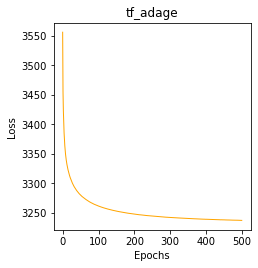

In [78]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)


#name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'tf_adage'
model_temp = model_dict[name]
ax.plot(list(range(0,500)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
ax.set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
#ax.axvline(x = np.std(model_temp.weights)*2.5)
#ax.axvline(x = np.std(model_temp.weights)*-2.5)
ax.set(title = name)
#ax.set_yscale('log')



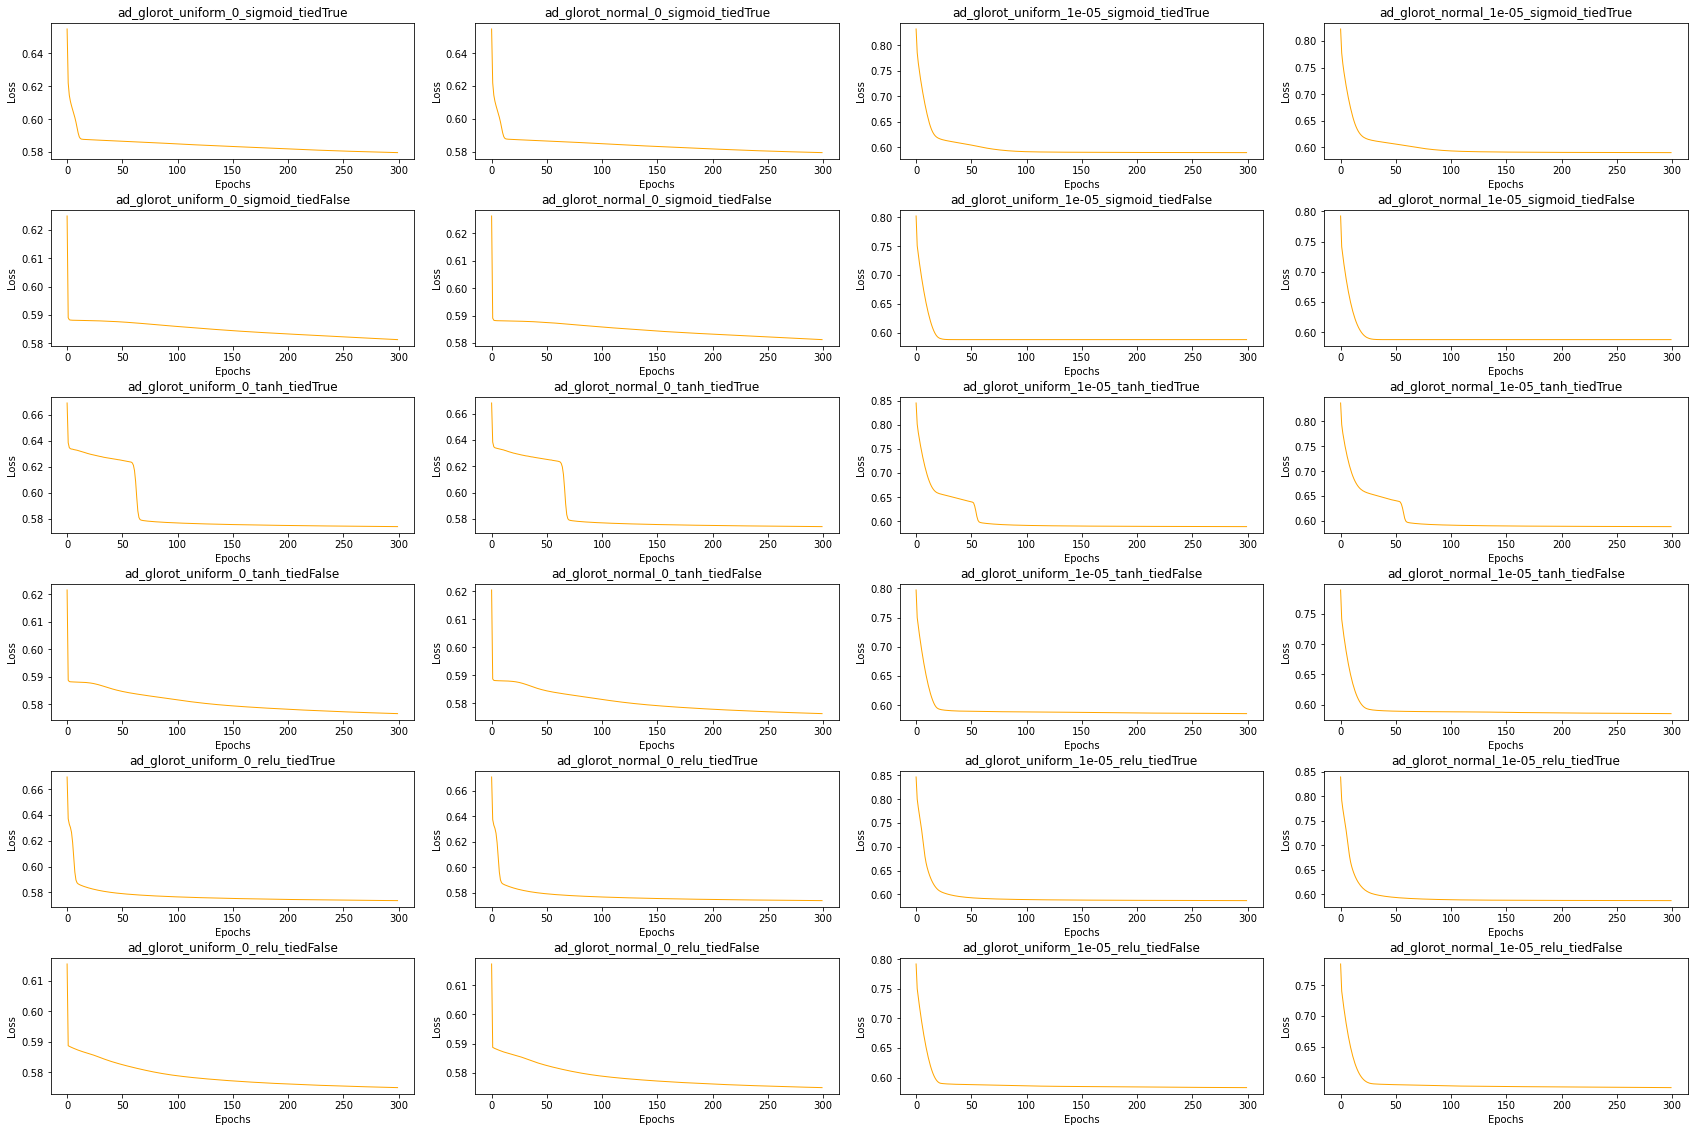

In [96]:
model_dict = model_dict_seq2

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,300)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1


    

In [ ]:
fig.savefig('loss_array.png')

*Takeaway*: Both models reach asymptotes though TF ADAGE has a sharper elbow, perhaps due to L1?

### 2. Node weight dists

We expect the node weights to follow a *certain* distribution and this has bene important for our definition of 'high weight genes' and our interpretation of ADAGE models. 

In [61]:
model_dict = model_dict_seq2

In [62]:
model_dict.keys()

dict_keys(['tf_adage', 'ad_glorot_uniform_0_sigmoid_tiedTrue', 'ad_glorot_uniform_0_sigmoid_tiedFalse', 'ad_glorot_uniform_0_tanh_tiedTrue', 'ad_glorot_uniform_0_tanh_tiedFalse', 'ad_glorot_uniform_0_relu_tiedTrue', 'ad_glorot_uniform_0_relu_tiedFalse', 'ad_glorot_uniform_1e-05_sigmoid_tiedTrue', 'ad_glorot_uniform_1e-05_sigmoid_tiedFalse', 'ad_glorot_uniform_1e-05_tanh_tiedTrue', 'ad_glorot_uniform_1e-05_tanh_tiedFalse', 'ad_glorot_uniform_1e-05_relu_tiedTrue', 'ad_glorot_uniform_1e-05_relu_tiedFalse', 'ad_glorot_normal_0_sigmoid_tiedTrue', 'ad_glorot_normal_0_sigmoid_tiedFalse', 'ad_glorot_normal_0_tanh_tiedTrue', 'ad_glorot_normal_0_tanh_tiedFalse', 'ad_glorot_normal_0_relu_tiedTrue', 'ad_glorot_normal_0_relu_tiedFalse', 'ad_glorot_normal_1e-05_sigmoid_tiedTrue', 'ad_glorot_normal_1e-05_sigmoid_tiedFalse', 'ad_glorot_normal_1e-05_tanh_tiedTrue', 'ad_glorot_normal_1e-05_tanh_tiedFalse', 'ad_glorot_normal_1e-05_relu_tiedTrue', 'ad_glorot_normal_1e-05_relu_tiedFalse'])

/Users/doingg/miniforge3/envs/tf/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'tf_adage')]

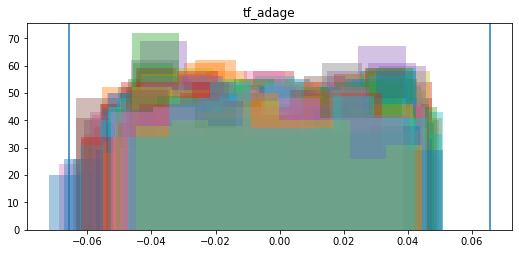

In [63]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*8 ,yd *4))
fig.tight_layout(pad=3.0)


#name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'tf_adage'
model_temp = model_dict['ad_glorot_uniform_0_sigmoid_tiedTrue']
for node in range(0,300):
    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
    ax=ax,
    hist=True,
    kde=False,
    rug=False)
ax.axvline(x = np.std(model_temp.weights)*2.5)
ax.axvline(x = np.std(model_temp.weights)*-2.5)
ax.set(title = name)
#ax.set_yscale('log')




In [ ]:
fig.savefig('weight_dists_adage.png')

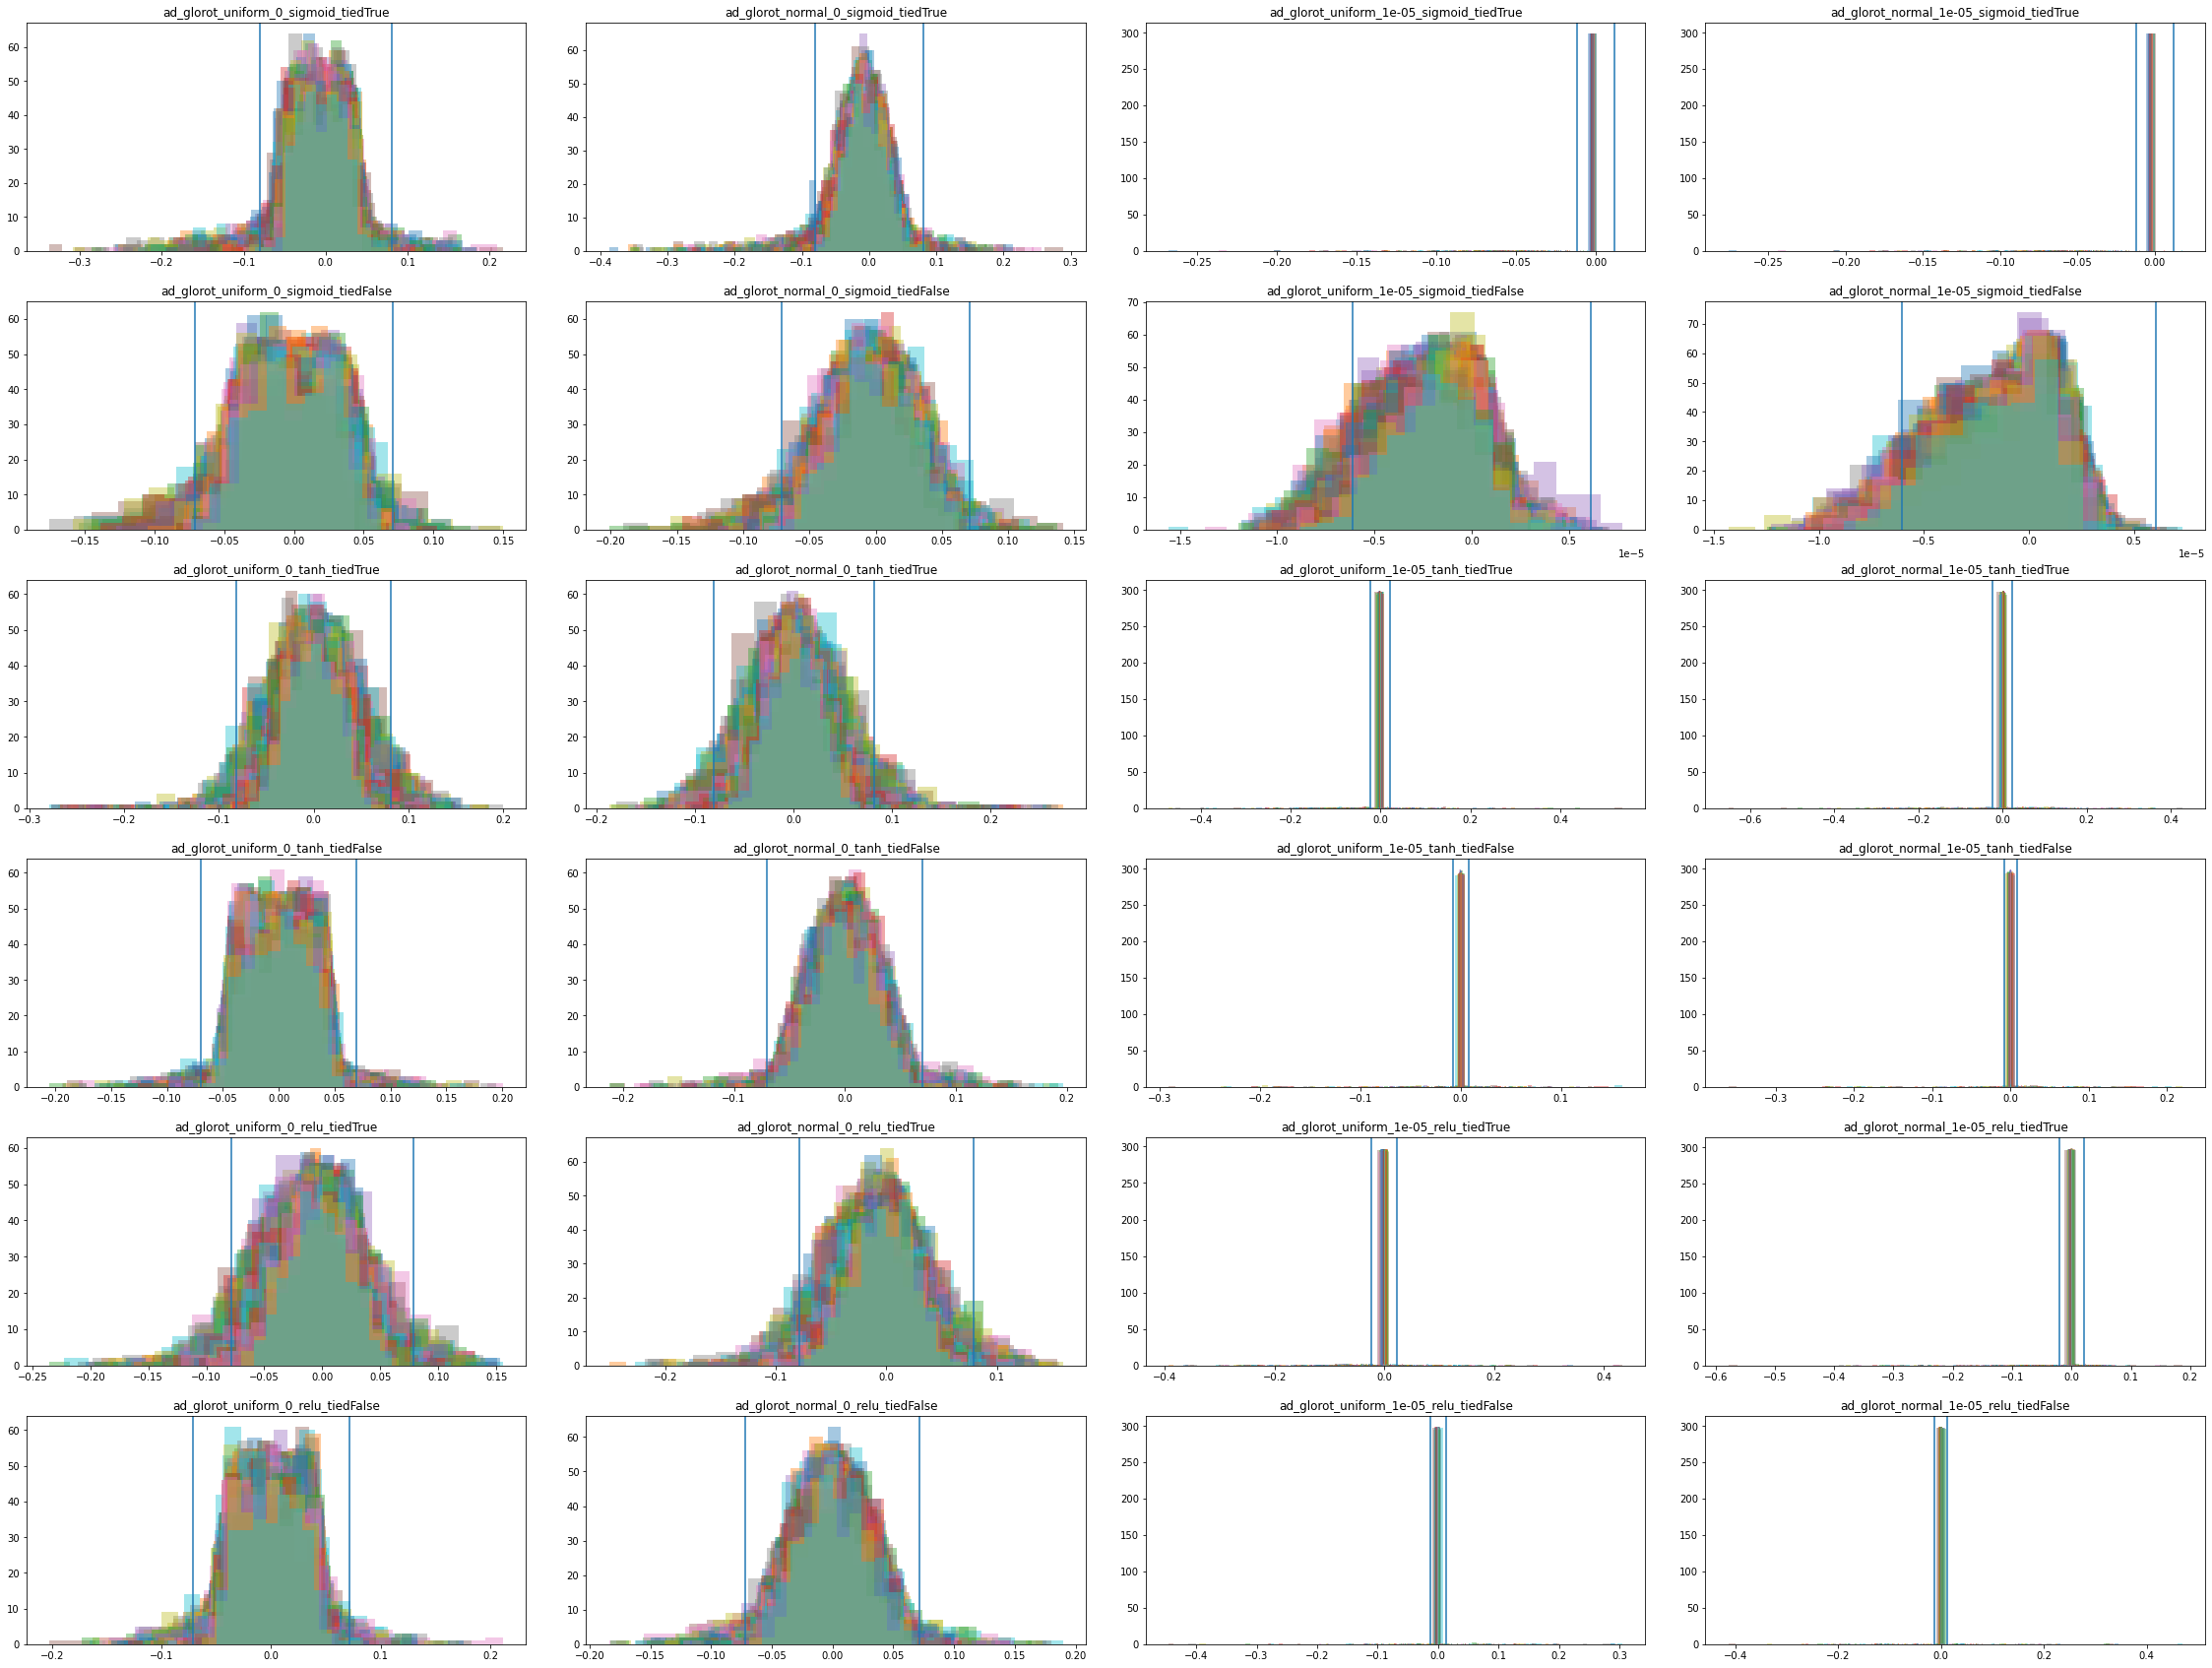

In [99]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict_seq2[name]
                for node in range(0,300):
                    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        hist=True,
                        kde=False,
                        rug=False)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


    

In [36]:
fig.savefig('weight_dists_array.png')

[Text(0.5, 1.0, 'ad_glorot_normal_1e-05_relu_tiedFalse')]

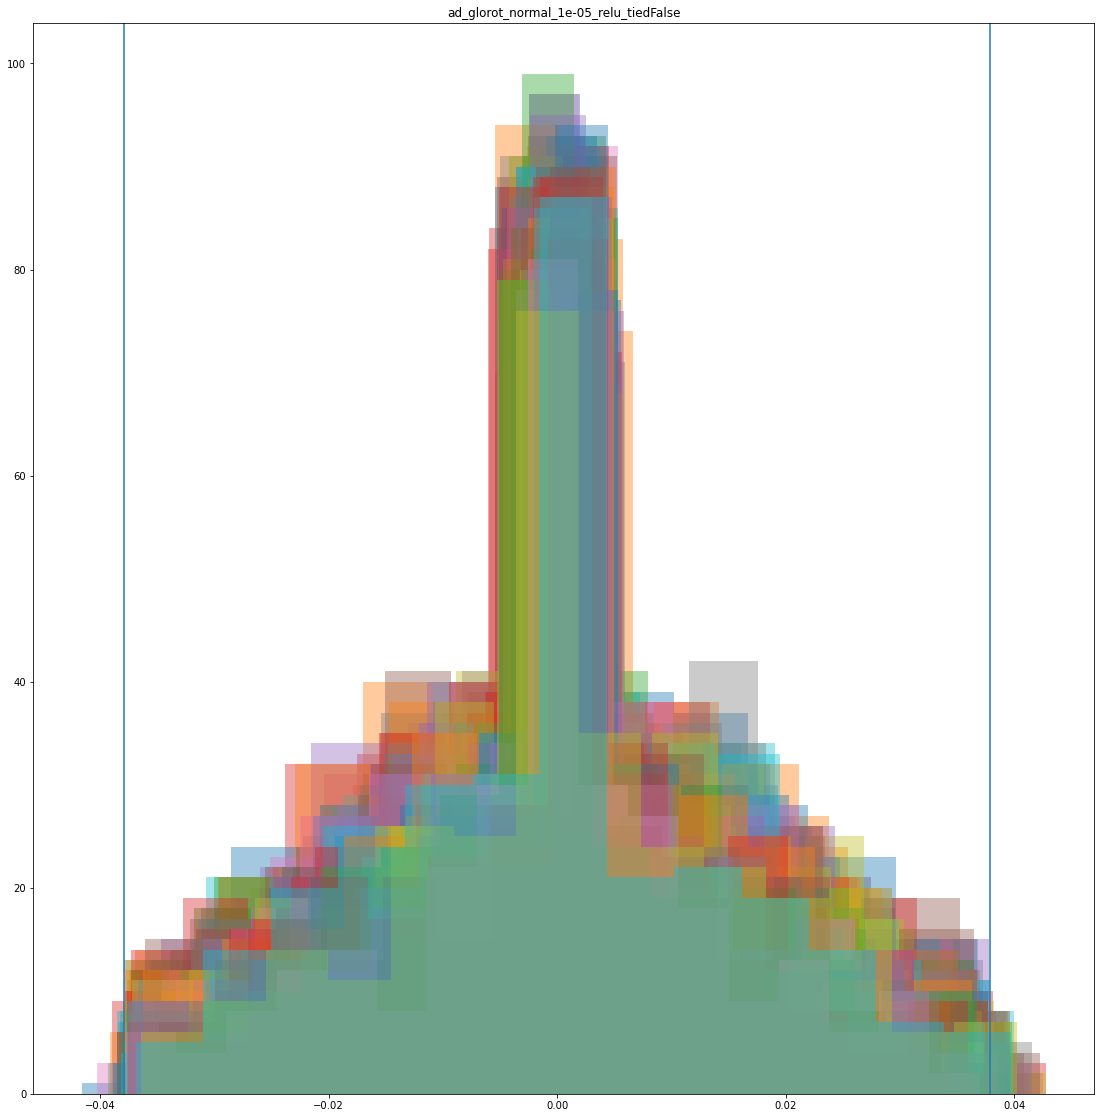

In [70]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*16 ,yd *16))
fig.tight_layout(pad=3.0)


name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) # + str(460)
                #print(name)
name = 'ad_glorot_normal_1e-05_relu_tiedFalse'
model_temp = model_dict2[name]
for node in range(0,300):
    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
    ax=ax,
    hist=True,
    kde=False,
    rug=False)
ax.axvline(x = np.std(model_temp.weights)*2.5)
ax.axvline(x = np.std(model_temp.weights)*-2.5)
ax.set(title = name)
#ax.set_yscale('log')



In [68]:
fig.savefig('single_weight_dist_skewed.png')

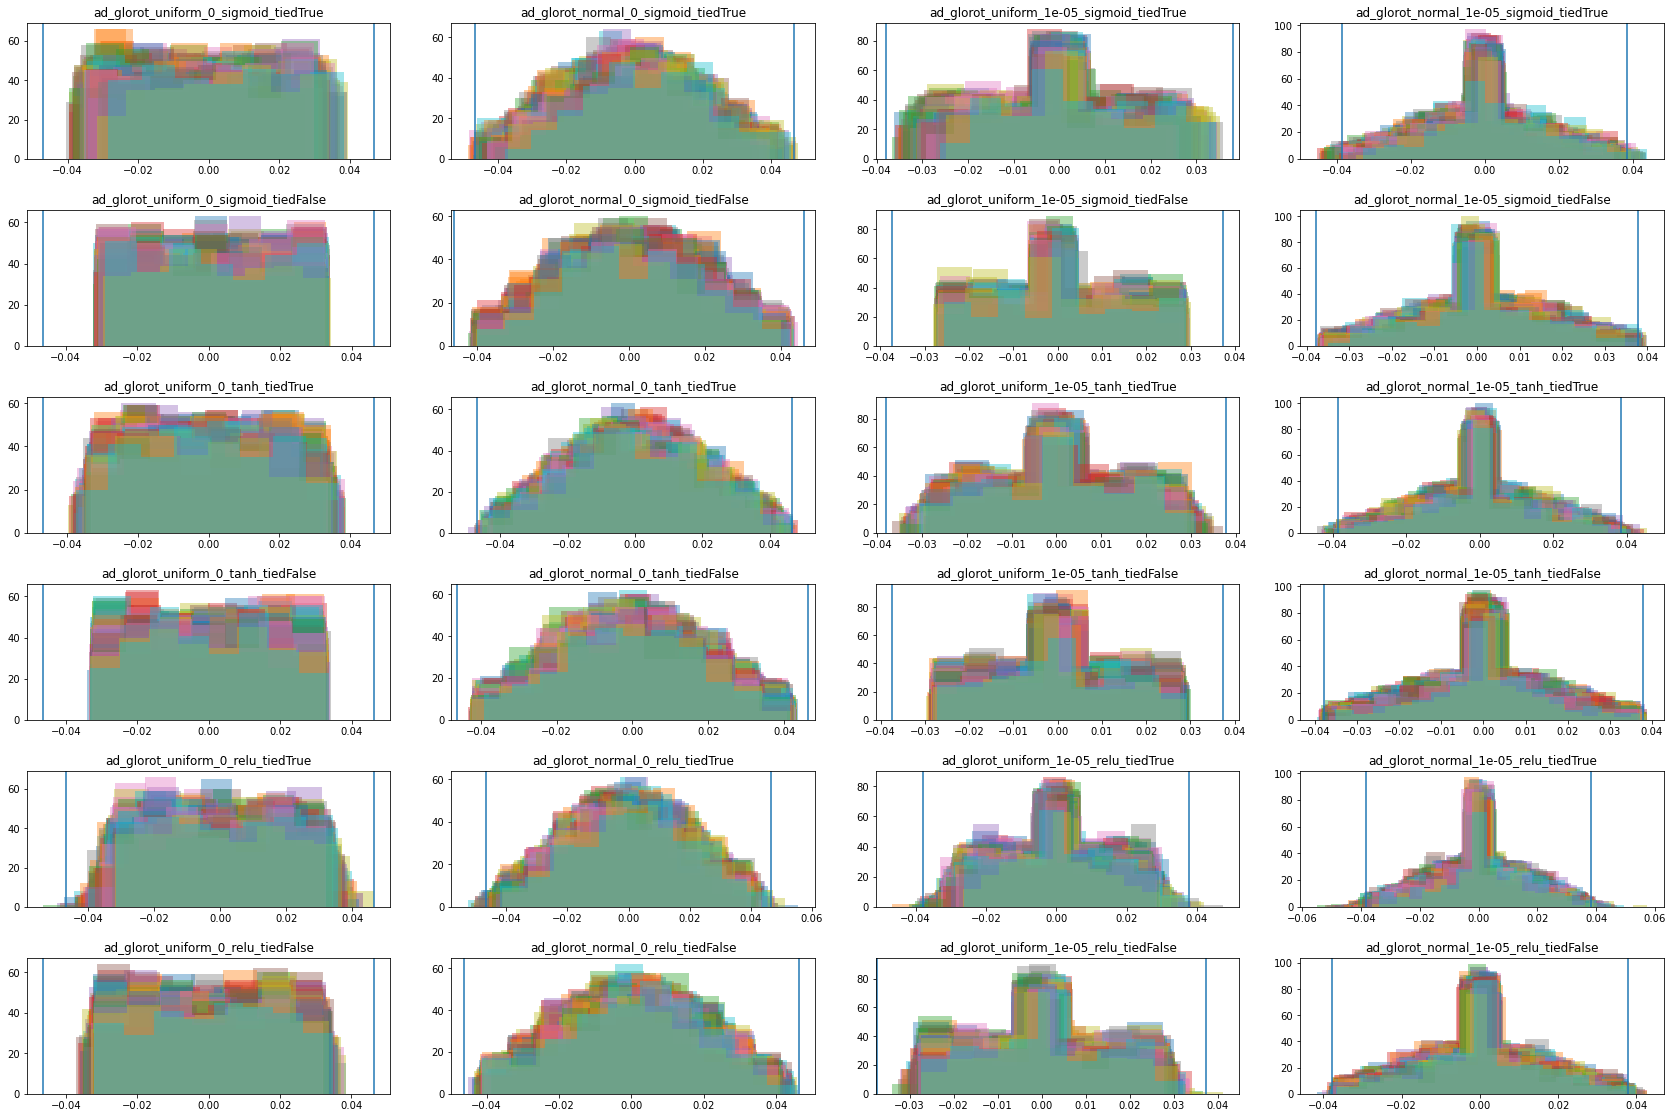

In [71]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict2[name]
                for node in range(0,300):
                    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        hist=True,
                        kde=False,
                        rug=False)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


In [ ]:
fig.savefig('weight_dist_seq.png')

In [ ]:
### Signature sizes

[Text(0.5, 1.0, 'tf_adage'),
 Text(0.5, 15.0, '# HW genes'),
 Text(9.0, 0.5, '# Nodes')]

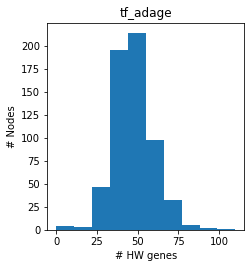

In [72]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

name = 'tf_adage'
model_temp = model_dict[name]
ax.hist(model_temp.hw_genes_all.sum(0))
ax.set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
#ax.set_yscale('log')


In [ ]:
fig.savefig('sig_sizes_adage.png')

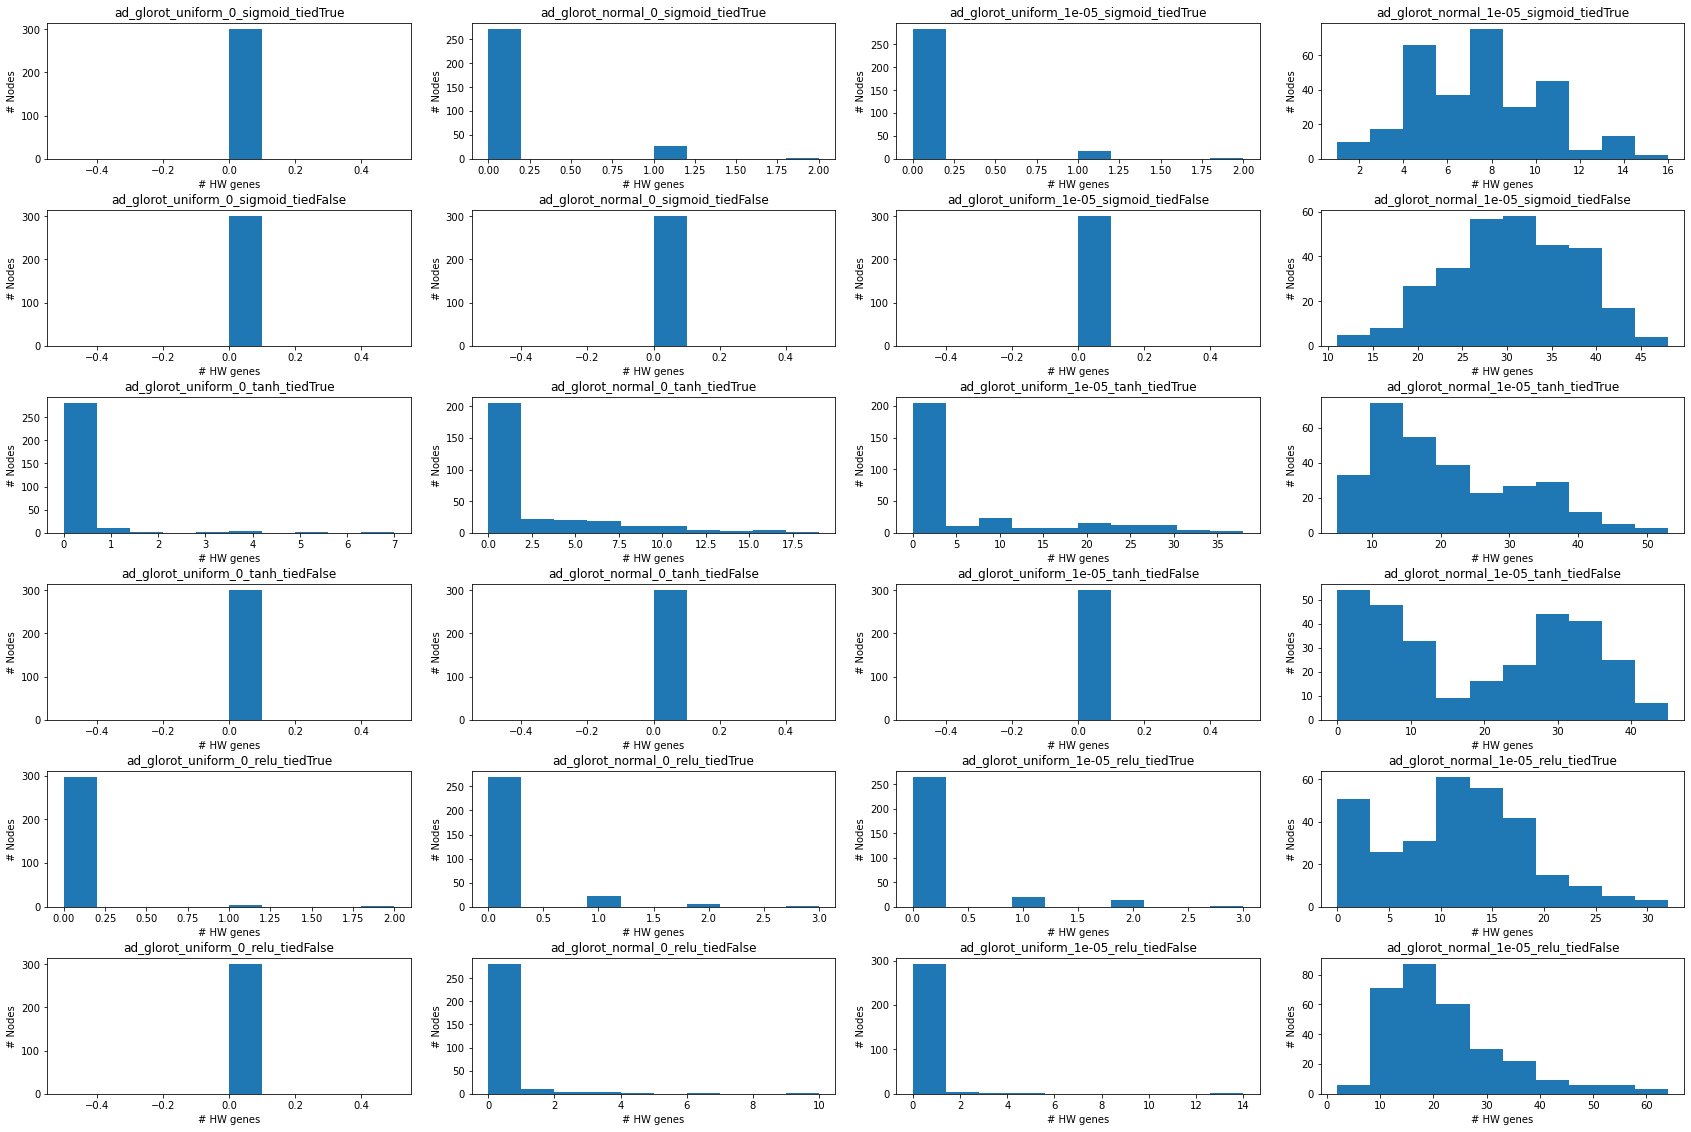

In [73]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict_seq2[name]
                ax[xi,yi].hist(model_temp.hw_genes.sum(0))
                ax[xi,yi].set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
                xi = xi+1
        yi=yi+1


    

In [ ]:
fig.savefig('sig_sizes_array.png')

[Text(0.5, 1.0, 'tf_adage'),
 Text(0.5, 15.0, '# HW genes'),
 Text(9.0, 0.5, '# Nodes')]

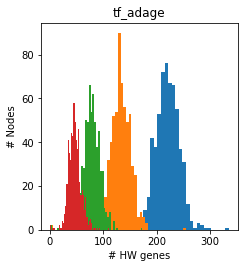

In [74]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)


name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'tf_adage'
model_temp = model_dict[name]
for c in [1.75,2,2.25,2.5]:
    model_temp.set_hwg_cutoff(c)
    ax.hist(model_temp.hw_genes_all.sum(0), bins=50)
ax.set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
#ax.set_yscale('log')



In [ ]:
fig.savefig('hwgs_grad_adage.png')

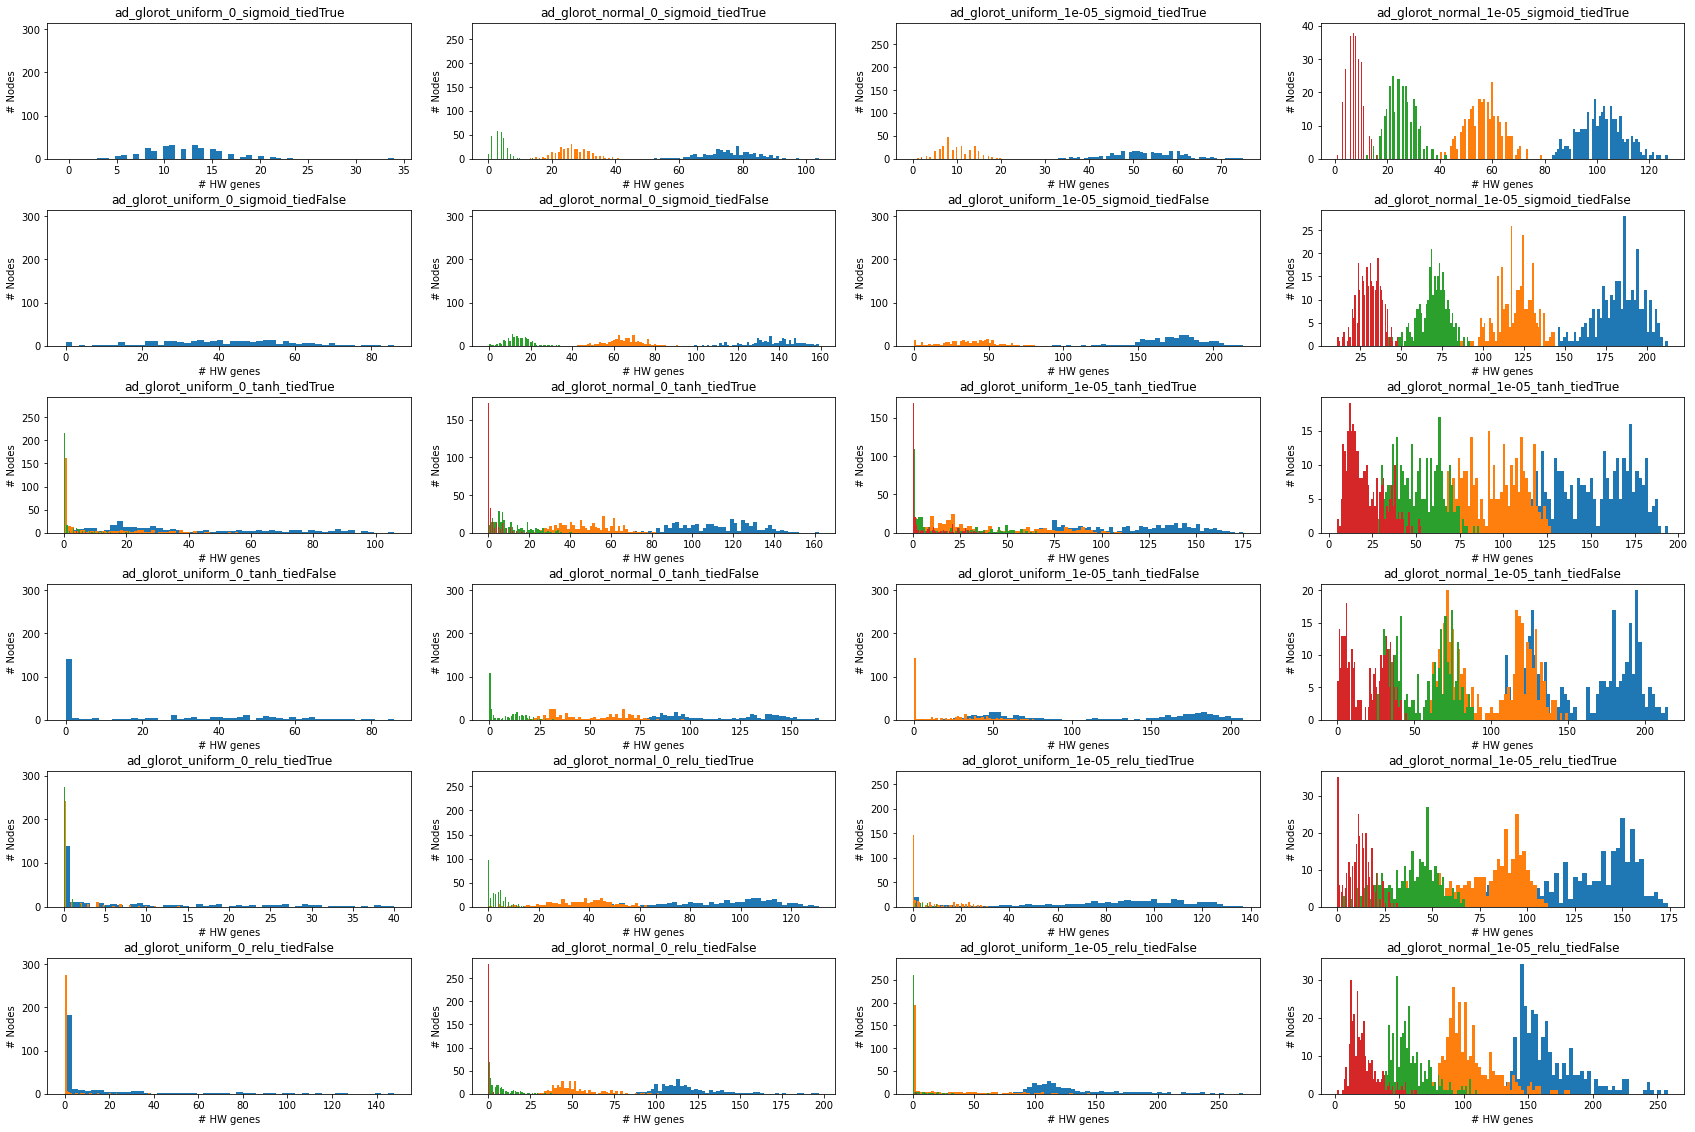

In [75]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict_seq2[name]
                ax[xi,yi].set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
                #ax[xi,yi].set_xscale('log')
                for c in [1.75,2,2.25,2.5]:
                    model_temp.set_hwg_cutoff(c)
                    ax[xi,yi].hist(model_temp.hw_genes.sum(0), bins=50)

                xi = xi+1
        yi=yi+1

In [ ]:
fig.savefig('hwgs_grad_array.png')

*Takeaway*: TF ADAGE may have a wider range of distributions and one *curious" node, though it is hard to say which distribution is "better" without looking at the genes themselves.

### 3. Node KEGG and GO enrichemnts

One of the primary ways we assess ADAGE models is enrichment analyses of each node for KEGG and GO pathways. Based on ADAGE, ADAGE2 and eADAGE we expect over three-quarters of the KEGG pathways to be enriched in at least one node and about half of nodes to be have enrichemnt for at least one KEGG pathway.

In [52]:
model_dict2['tf_adage'].set_hwg_cutoff(2.5)
model_dict2['tf_adage'].set_reg('node_interpretation/regulons_format.txt')
#model_dict[m].set_go('node_interpretation/regulons_format.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'node_interpretation/regulons_format.txt'

In [ ]:

for m in model_dict:
    model_dict[m].set_hwg_cutoff(2.5)
    model_dict[m].set_op('node_interpretation/operons_format.txt')
    model_dict[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    model_dict[m].set_go('node_interpretation/manual_GO_BP_terms.txt') 
    model_dict[m].set_reg('node_interpretation/regulons_format.txt')
  


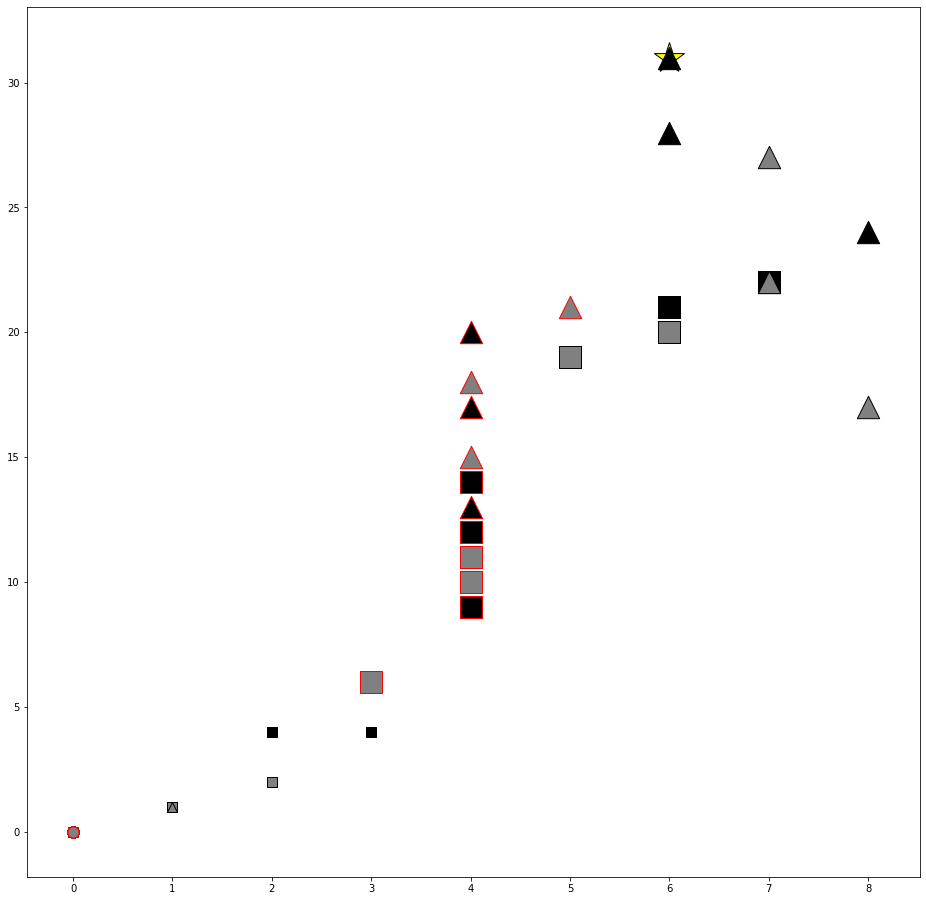

In [123]:
plimk=30
plimg=30
plimr=30
plimo=30
xd=4
yd=4
fig, ax = plt.subplots(xd,yd,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

x = ((model_dict['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
ax[1,2].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

x = ((model_dict['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
ax[2,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

x = ((model_dict['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
ax[2,2].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(3):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.go_ps > plimg).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plimg).sum(1) > 0).sum()
                    ax[1,2].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.regs_ps > plimr).sum(0) > 0).sum()
                    y = ((model_temp.regs_ps > plimr).sum(1) > 0).sum()
                    ax[2,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.ops_ps > plimo).sum(0) > 0).sum()
                    y = ((model_temp.ops_ps > plimo).sum(1) > 0).sum()
                    ax[2,2].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)

                ec='red'
            mi = mi+1
        s=500
    c = 'grey'



In [161]:
total_kegg = []
node_rep = []
names = []
for m in model_d:
    total_kegg.append(((model_d[m].kegg_ps > 10).sum(0) > 0).sum())
    node_rep.append(((model_d[m].kegg_ps > 10).sum(1) > 0).sum())
    names.append(m)
    #print(m + '\n\t' + str(((model_d[m].kegg_ps > 10).sum(0) > 0).sum()) + '\t' + str(((model_d[m].kegg_ps > 10).sum(1) > 0).sum()))
    

fig, ax = plt.subplots()
ax.scatter(total_kegg, node_rep)

i=0
for x,y in zip(total_kegg, node_rep):
    label = names[i]
    if(i < 24):
        ax.annotate(label,(x,y))
    i = i+1
ax.set_xlabel('# KEGG Pathways represented', fontsize=15)
ax.set_ylabel('# Nodes with Pathways', fontsize=15)


NameError: name 'model_d' is not defined

In [162]:
model_temp = model_dict['tf_adage']

hw_gene_lists = []
for n in range(model_temp.hw_genes.shape[1]):
    genes_temp = ['node'+str(n)]
    weights_temp = [1]
    for g in range(model_temp.hw_genes.shape[0]):
        if(model_temp.hw_genes[g,n]):
            #print(g)
            genes_temp.append(model_temp.compendium.index[g])
            weights_temp.append(model_temp.weights[g,n])
    genes_temp_sorted = [x for _,x in sorted(zip(weights_temp, genes_temp), reverse=True)]
    hw_gene_lists.append(genes_temp_sorted)
    

In [ ]:
hw_gene_lists[1]

In [ ]:
#write_data('test_hwgs.csv', hw_gene_lists)
with open("adage_hwgs.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(hw_gene_lists)

In [ ]:
model_temp = model_dict['tf_adage']

hw_gene_lists = []
for n in range(model_temp.hw_genes.shape[1]):
    genes_temp = ['node'+str(n)]
    weights_temp = [1]
    for g in range(model_temp.hw_genes.shape[0]):
        if(model_temp.hw_genes[g,n]):
            #print(g)
            genes_temp.append(model_temp.compendium.index[g])
            weights_temp.append(model_temp.weights[g,n])
    genes_temp_sorted = [x for _,x in sorted(zip(weights_temp, genes_temp), reverse=True)]
    hw_gene_lists.append(genes_temp_sorted)
hw_gene_lists[1]
#write_data('test_hwgs.csv', hw_gene_lists)
with open("adage_hwgs.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(hw_gene_lists)

In [ ]:
total_kegg = []
node_rep = []
names = []
for m in model_d:
    total_kegg.append(((model_d[m].kegg_ps > 10).sum(0) > 0).sum())
    node_rep.append(((model_d[m].kegg_ps > 10).sum(1) > 0).sum())
    names.append(m)
    #print(m + '\n\t' + str(((model_d[m].kegg_ps > 10).sum(0) > 0).sum()) + '\t' + str(((model_d[m].kegg_ps > 10).sum(1) > 0).sum()))
    

fig, ax = plt.subplots()
ax.scatter(total_kegg, node_rep)

i=0
for x,y in zip(total_kegg, node_rep):
    label = names[i]
    if(i < 24):
        ax.annotate(label,(x,y))
    i = i+1
ax.set_xlabel('# KEGG Pathways represented', fontsize=15)
ax.set_ylabel('# Nodes with Pathways', fontsize=15)


In [ ]:
model_dict

KeyError: 'ad_glorot_uniform_0_sigmoid_tiedTrue460'

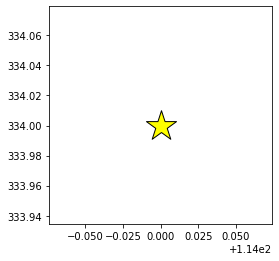

In [114]:
fig, ax = plt.subplots(1,1,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].kegg_ps > 10).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > 10).sum(1) > 0).sum()
ax.scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(10):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict[name]
                    x = ((model_temp.regs_ps > 10).sum(0) > 0).sum()
                    y = ((model_temp.regs_ps > 10).sum(1) > 0).sum()
                    ax.scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    #ax[xi,yi].set(title = m, xlabel = '# HW genes', ylabel = '# Nodes')
                    #xi = xi+1
                ec='red'
            mi = mi+1
        s=500
    c = 'grey'




In [ ]:

for m in model_dict:
    model_dict[m].set_hwg_cutoff(2.5)
    model_dict[m].set_go('node_interpretation/regulons_format.txt')
#model_dict['tf_adage'].set_hwg_cutoff(2.5)
#model_dict['tf_adage'].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt')    




In [ ]:
plim = 30

fig, ax = plt.subplots(1,1,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].go_ps > plim).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plim).sum(1) > 0).sum()
ax.scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(10):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict[name]
                    x = ((model_temp.go_ps > plim).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plim).sum(1) > 0).sum()
                    ax.scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    ax.set(title = m, xlabel = '# Regulons', ylabel = '# Nodes')

                    #xi = xi+1
                ec='red'
            mi = mi+1
        s=500
    c = 'grey'


In [ ]:

fig.savefig('regulon_summary_array.png')

In [ ]:

fig, ax = plt.subplots(len(model_d), 2,figsize=(10,3*len(model_d)))
fig.tight_layout(pad=3.0)

#ax[0].plot(list(range(0,500)), tf_adage.loss,'go-', linewidth=1, markersize=2)
#ax[0].set(title = 'TF', xlabel = 'Epochs', ylabel = 'Cost')
i = 0
for m in model_d:
    ax[i,0].hist((model_d[m].kegg_ps > 10).sum(0))
    ax[i,0].set(title = m, xlabel = '# Nodes per Pathway', ylabel = '# Pathways')
    ax[i,1].hist((model_d[m].kegg_ps > 10).sum(1))
    ax[i,1].set(title = m, xlabel = '# Pathways in Node', ylabel = '# Nodes')
    i = i+1

In [ ]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for i in inits:
    for l in L1_norm:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].hist((model_temp.kegg_ps > 10).sum(0))
                ax[xi,yi].set(title = name, xlabel = '# Nodes per Pathway', ylabel = '# Pathways')
                xi = xi+1
        yi=yi+1



In [ ]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for i in inits:
    for l in L1_norm:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].hist((model_temp.kegg_ps > 10).sum(0))
                ax[xi,yi].set(title = name, xlabel = '# Nodes per Pathway', ylabel = '# Pathways')
                xi = xi+1
        yi=yi+1


yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for i in inits:
    for l in L1_norm:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].hist((model_temp.kegg_ps > 10).sum(1))
                ax[xi,yi].set(title = name, xlabel = '# Pathways in Node', ylabel = '# Nodes')
                xi = xi+1
        yi=yi+1



In [ ]:
fig.savefig('kegg_details.png')

*Takeaway*: This is where the red flag really stands out. Using Keras there was nearly no enrichemnt for any pathways in any nodes at all, perhaps what one would expect using randomly permuted weights? It could be nice to get a good pre- and post- training picture, but I think it is safe to say something has missed the boat.

## seqADAGE

Although the above comparison suggests an error in the Keras workflow, below I have outlines the training of a Keras model on the RNAseq compendium in anticipation of an re-iterative analysis going forward with promising edits.

In [ ]:
#adage_comp = pandas.read_csv('data_files/ADAGE_compendium.csv')
seq_comp = np.loadtxt(open('data_files/refine_bio_seq_clean.csv', "rb"),delimiter=',',skiprows = 1)
seq_gene_num = np.size(seq_comp, 0)
seq_samp_num = np.size(seq_comp, 1)
print(seq_gene_num, seq_samp_num)

In [ ]:
fig = sns.distplot(seq_comp)

In [ ]:
fig.figure.savefig('seq_dist01.png')

In [ ]:
seq_adage = run_model.run_model('data_files/refine_bio_seq_with_gene_names.csv',seed=460,kl1=0,act='relu', tied=True, epochs=500, init = 'glorot_normal')

In [ ]:
model_d = {
    "tf_adage": tf_adage,
    "keras" : keras_adage,
    "keras_L1" : keras_adage_L1,
    'seq_adage': seq_adage
}

for m in model_d:
    print(model_d[m])

In [ ]:
model_dict_seq = {
    "tf_adage": tf_adage
}

for i in inits:
    #print(i)
    for l in L1_norm:
        #print(l)
        for a in act_fun:
            #print(a)
            for t in tied:
                m = run_model.run_model('data_files/refine_bio_seq_01_with_names.csv',seed=460,kl1=l, act = a, tied = t, epochs=500, init=i, batch_size=100)
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                print(name)
                model_dict_seq[name] = m

In [164]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]

model_dict_seq = {
    "tf_adage": tf_adage
}

for i in inits:
    #print(i)
    for l in L1_norm:
        #print(l)
        for a in act_fun:
            #print(a)
            for t in tied:
                for s in range(3):
                    seed = str(460 + s)
                    #print(t)
                    #m = run_model.run_model('data_files/train_set_normalized.csv',seed=460,kl1=l, act = a, tied = t, epochs=500, init=i)
                    prefix = 'data_files/refine_bio_seq_01_with_names_seed:' + seed + '_kl1:' + str(l) + '_kl2:0_act:' + a + '_init:' + i + '_ep:500_tied:' + str(t) + '_batch:' + str(batch)
                    #print(prefix)
                    weights_temp = np.array(pandas.read_csv('outputs/' + prefix + '_en_weights.csv', header = None))
                    loss_temp = np.array(pandas.read_csv('outputs/' + prefix + '_loss.csv', header = None))
                    val_loss_temp = np.array(pandas.read_csv('outputs/' + prefix + '_val_loss.csv', header = None))
                    adage_temp = Adage.Adage(tf_adage.autoencoder, tf_adage.history, tf_adage.compendium)
                    adage_temp.weights = weights_temp
                    adage_temp.loss = loss_temp[0]
                    adage_temp.val_loss = val_loss_temp[0]
                    adage_temp.set_hwg_cutoff(2.5)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_dict_seq[name] = adage_temp
          
                    


In [165]:
model_dict_seq

{'tf_adage': <Adage.Adage at 0x7f6bffe070d0>,
 'ad_glorot_uniform_0_sigmoid_tiedTrue460': <Adage.Adage at 0x7f6ca14fce50>,
 'ad_glorot_uniform_0_sigmoid_tiedTrue461': <Adage.Adage at 0x7f6ca14fc090>,
 'ad_glorot_uniform_0_sigmoid_tiedTrue462': <Adage.Adage at 0x7f6c41b93510>,
 'ad_glorot_uniform_0_sigmoid_tiedFalse460': <Adage.Adage at 0x7f6c48c23cd0>,
 'ad_glorot_uniform_0_sigmoid_tiedFalse461': <Adage.Adage at 0x7f6b994f4e50>,
 'ad_glorot_uniform_0_sigmoid_tiedFalse462': <Adage.Adage at 0x7f6ca80164d0>,
 'ad_glorot_uniform_0_tanh_tiedTrue460': <Adage.Adage at 0x7f6c41b98ad0>,
 'ad_glorot_uniform_0_tanh_tiedTrue461': <Adage.Adage at 0x7f6c41b98750>,
 'ad_glorot_uniform_0_tanh_tiedTrue462': <Adage.Adage at 0x7f6c073d31d0>,
 'ad_glorot_uniform_0_tanh_tiedFalse460': <Adage.Adage at 0x7f6c073d3b10>,
 'ad_glorot_uniform_0_tanh_tiedFalse461': <Adage.Adage at 0x7f6c073d3c90>,
 'ad_glorot_uniform_0_tanh_tiedFalse462': <Adage.Adage at 0x7f6c073d3b50>,
 'ad_glorot_uniform_0_relu_tiedTrue460': <

In [ ]:
model_d = model_dict_seq

In [ ]:

fig, ax = plt.subplots(len(model_d), 1,figsize=(6,3*len(model_d)))
fig.tight_layout(pad=3.0)

#ax[0].plot(list(range(0,500)), tf_adage.loss,'go-', linewidth=1, markersize=2)
#ax[0].set(title = 'TF', xlabel = 'Epochs', ylabel = 'Cost')
i = 0
for m in model_d:
    ax[i].plot(list(range(0,500)), model_d[m].loss, 'go-', linewidth=1, markersize=2, color = 'orange')
    ax[i].set(title = m, xlabel = 'Epochs', ylabel = 'Loss')
    i = i+1

In [ ]:
fig.savefig('seq_loss.png')

In [ ]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
                model_temp = model_dict_seq[name]
                ax[xi,yi].plot(list(range(0,500)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1



In [ ]:
fig.savefig('loss_seq.png')

In [ ]:
fig, ax = plt.subplots(len(model_d), 1,figsize=(6,3*len(model_d)))
fig.tight_layout(pad=3.0)


i = 0
for m in model_d:
    #ax[i].sns.distplot(list(range(0,500)), model_d[m].weights[0], 'go-', linewidth=1, markersize=2, color = 'orange')
    ax[i].set(title = m, xlabel = 'Weight', ylabel = 'Density')
    for node in range(0,300):
        sns.distplot(model_d[m].weights[node],
            ax=ax[i],
            hist=False,
            kde=True,
            rug=False)
    i = i+1

In [ ]:
fig.savefig('seq_weight_dist.png')

In [ ]:
fig, ax = plt.subplots(len(model_d), 1,figsize=(6,3*len(model_d)))
fig.tight_layout(pad=3.0)

#ax[0].plot(list(range(0,500)), tf_adage.loss,'go-', linewidth=1, markersize=2)
#ax[0].set(title = 'TF', xlabel = 'Epochs', ylabel = 'Cost')
i = 0
for m in model_d:
    ax[i].hist(model_d[m].hw_genes.sum(0))
    ax[i].set(title = m, xlabel = '# HW genes', ylabel = '# Nodes')
    i = i+1

In [ ]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
                model_temp = model_dict_seq[name]
                for node in range(0,300):
                    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        hist=True,
                        kde=False,
                        rug=False)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1



In [ ]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
                model_temp = model_dict_seq[name]
                ax[xi,yi].set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
                #ax[xi,yi].set_xscale('log')
                for c in [1.75,2,2.25,2.5]:
                    model_temp.set_hwg_cutoff(c)
                    ax[xi,yi].hist(model_temp.hw_genes.sum(0), bins=50)

                xi = xi+1
        yi=yi+1

In [ ]:
fig.savefig('seq_sig_sizes.png')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].kegg_ps > 10).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > 10).sum(1) > 0).sum()
ax.scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(10):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict_seq[name]
                    x = ((model_temp.kegg_ps > 10).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > 10).sum(1) > 0).sum()
                    ax.scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    #ax[xi,yi].set(title = m, xlabel = '# HW genes', ylabel = '# Nodes')
                    #xi = xi+1
                ec='red'
            mi = mi+1
        s=500
    c = 'grey'


In [ ]:

for m in model_d:
    model_d[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt')

In [ ]:
for m in model_dict_seq:
    model_dict_seq[m].set_hwg_cutoff(2.5)
    model_dict_seq[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].kegg_ps > 10).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > 10).sum(1) > 0).sum()
ax.scatter(x, y, c = 'yellow', marker = '.', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(1):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) 
                    print(name)
                    model_temp = model_dict_seq[name]
                    x = ((model_temp.kegg_ps > 10).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > 10).sum(1) > 0).sum()
                    ax.scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    #ax[xi,yi].set(title = m, xlabel = '# HW genes', ylabel = '# Nodes')
                    #xi = xi+1
                ec='red'
            mi = mi+1
        s=200
    c = 'grey'



In [ ]:
fig, ax = plt.subplots(1,1,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].kegg_ps > 10).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > 10).sum(1) > 0).sum()
ax.scatter(x, y, c = 'yellow', marker = '.', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi=0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:

                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) 
                print(name)
                model_temp = model_dict_seq[name]
                x = ((model_temp.kegg_ps > 10).sum(0) > 0).sum()
                y = ((model_temp.kegg_ps > 10).sum(1) > 0).sum()
                ax.scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    #ax[xi,yi].set(title = m, xlabel = '# HW genes', ylabel = '# Nodes')
                xi = xi+1
                ec='red'
            mi = mi+1
        s=500
    c = 'grey'

In [ ]:
total_kegg = []
node_rep = []
names = []
for m in model_d:
    total_kegg.append(((model_d[m].kegg_ps > 10).sum(0) > 0).sum())
    node_rep.append(((model_d[m].kegg_ps > 10).sum(1) > 0).sum())
    names.append(m)
    #print(m + '\n\t' + str(((model_d[m].kegg_ps > 10).sum(0) > 0).sum()) + '\t' + str(((model_d[m].kegg_ps > 10).sum(1) > 0).sum()))
    

fig, ax = plt.subplots()
ax.scatter(total_kegg, node_rep)

i=0
for x,y in zip(total_kegg, node_rep):
    label = names[i]
    if(i < 24):
        ax.annotate(label,(x,y))
    i = i+1
ax.set_xlabel('# KEGG Pathways represented', fontsize=15)
ax.set_ylabel('# Nodes with Pathways', fontsize=15)



In [ ]:
fig.savefig('seq_kegg_summary.png')

In [ ]:

fig, ax = plt.subplots(len(model_d), 2,figsize=(8,3*len(model_d)))
fig.tight_layout(pad=3.0)

#ax[0].plot(list(range(0,500)), tf_adage.loss,'go-', linewidth=1, markersize=2)
#ax[0].set(title = 'TF', xlabel = 'Epochs', ylabel = 'Cost')
i = 0
for m in model_d:
    ax[i,0].hist((model_d[m].kegg_ps > 10).sum(0))
    ax[i,0].set(title = m, xlabel = '# Nodes per Pathway', ylabel = '# Pathways')
    ax[i,1].hist((model_d[m].kegg_ps > 10).sum(1))
    ax[i,1].set(title = m, xlabel = '# Pathways in Node', ylabel = '# Nodes')
    i = i+1

In [ ]:
fig.savefig('seq_kegg_details.png')

In [ ]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]

model_dict = {
    "tf_adage": tf_adage
}

for seed in range(10):
    for i in inits:
    #print(i)
        for l in L1_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    m = run_model.run_model('data_files/refine_bio_seq_01_with_names.csv',seed=seed+460,kl1=l, act = a, tied = t, epochs=500, init=i)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                    print(name)
                    model_dict_seq[name] = m
                    
for m in model_dict_seq:
    model_dict_seq[m].set_hwg_cutoff(2.5)
    model_dict_seq[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt')

In [ ]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]

model_dict_seq = {
    "tf_adage": tf_adage
}

for i in inits:
    #print(i)
    for l in L1_norm:
        #print(l)
        for a in act_fun:
            #print(a)
            for t in tied:
                for s in range(10):
                    seed = str(460 + s)
                    #print(t)
                    #m = run_model.run_model('data_files/train_set_normalized.csv',seed=460,kl1=l, act = a, tied = t, epochs=500, init=i)
                    prefix = 'data_files/refine_bio_seq_01_with_names_seed:' + seed + '_kl1:' + str(l) + '_kl2:0_act:' + a + '_init:' + i + '_ep:500_tied:' + str(t)
                    #print(prefix)
                    weights_temp = np.array(pandas.read_csv('outputs/' + prefix + '_en_weights.csv', header = None))
                    loss_temp = np.array(pandas.read_csv('outputs/' + prefix + '_loss.csv', header = None))
                    val_loss_temp = np.array(pandas.read_csv('outputs/' + prefix + '_val_loss.csv', header = None))

                    adage_temp = Adage.Adage(keras_adage.autoencoder, keras_adage.history, keras_adage.compendium)
                    adage_temp.weights = weights_temp
                    adage_temp.loss = loss_temp[0]
                    adage_temp.val_loss = val_loss_temp[0]
                    adage_temp.set_hwg_cutoff(2.5)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    print(name)
                    model_dict_seq[name] = adage_temp
                    
model_dict_seq

In [ ]:
for m in model_dict_seq:
    model_dict_seq[m].set_hwg_cutoff(2.5)
    model_dict_seq[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt')

In [ ]:
model_temp = model_dict_seq['ad_glorot_uniform_0_sigmoid_tiedTrue460']

hw_gene_lists = []
for n in range(model_temp.hw_genes.shape[1]):
    genes_temp = ['node'+str(n)]
    weights_temp = [1]
    for g in range(model_temp.hw_genes.shape[0]):
        if(model_temp.hw_genes[g,n]):
            #print(g)
            genes_temp.append(model_temp.compendium.index[g])
            weights_temp.append(model_temp.weights[g,n])
    genes_temp_sorted = [x for _,x in sorted(zip(weights_temp, genes_temp), reverse=True)]
    hw_gene_lists.append(genes_temp_sorted)
    

In [ ]:
#write_data('test_hwgs.csv', hw_gene_lists)
with open("group8_seq_hwgs.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(hw_gene_lists)

In [ ]:

model_dict_seq

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].kegg_ps > 10).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > 10).sum(1) > 0).sum()
ax.scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(10):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict_seq[name]
                    x = ((model_temp.kegg_ps > 10).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > 10).sum(1) > 0).sum()
                    ax.scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    #ax[xi,yi].set(title = m, xlabel = '# HW genes', ylabel = '# Nodes')
                    #xi = xi+1
                ec='red'
            mi = mi+1
        s=500
    c = 'grey'




In [ ]:
for m in model_dict:
    model_dict_seq[m].set_hwg_cutoff(2.5)
    model_dict_seq[m].set_go('node_interpretation/regulons_format.txt')
#model_dict['tf_adage'].set_hwg_cutoff(2.5)
#model_dict['tf_adage'].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt')    


In [ ]:
plim = 8
fig, ax = plt.subplots(1,1,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].go_ps > plim).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plim).sum(1) > 0).sum()
ax.scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(10):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict_seq[name]
                    x = ((model_temp.go_ps > plim).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plim).sum(1) > 0).sum()
                    ax.scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    #ax[xi,yi].set(title = m, xlabel = '# HW genes', ylabel = '# Nodes')
                    #xi = xi+1
                ec='red'
            mi = mi+1
        s=500
    c = 'grey'


In [ ]:
fig.savefig('regulon_summary_seq.png')

## seqADAGE

Although the above comparison suggests an error in the Keras workflow, below I have outlines the training of a Keras model on the RNAseq compendium in anticipation of an re-iterative analysis going forward with promising edits.

In [ ]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]

model_dict2 = {
    "tf_adage": tf_adage
}
model_dict_seq2 = {
    "tf_adage": tf_adage
}

for seed in range(10):
    for i in inits:
    #print(i)
        for l in L1_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(seed)
                    print(name)
                    mseq = run_model.run_model('data_files/refine_bio_seq_clean_with_names.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=500, init=i)
                    marr = run_model.run_model('data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=500, init=i)

                    model_dict2[name] = marr
                    model_dict_seq2[name] = mseq
                

In [8]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]
seq_temp = run_model.run_model('../data_files/refine_bio_seq_clean_with_names.csv',960,kl1=0, act = 'tanh', tied = True, epochs=1, init='glorot_normal')
arr_temp = run_model.run_model('../data_files/train_set_normalized.csv',960,kl1=0, act = 'tanh', tied = True, epochs=1, init='glorot_normal')
tf_adage = Adage.Adage(arr_temp.autoencoder, arr_temp.history, arr_temp.compendium)
tf_weights = np.array(pd.read_csv('../outputs/ADAGE_OG_weights.csv', header = None))
tf_cost = pd.read_csv('../outputs/ADAGE_OG_cost_log.csv')
tf_adage.weights = tf_weights
tf_adage.loss = tf_cost['cost']
tf_adage.set_hwg_cutoff(2.5).shape

tensorflow
(5210, 995)
90/90 [==============================] - 2s 15ms/step - loss: 2.4632 - val_loss: 1.8423
(2,)
tensorflow
(5549, 950)
86/86 [==============================] - 2s 19ms/step - loss: 2.2743 - val_loss: 1.6891
(2,)


(5549, 600)

In [16]:
seq_temp.compendium

ERR583485  ERR583486  ERR583487  ERR583488  ERR583489  ERR583490  \
X                                                                          
PA0001   0.671443   0.708615   0.754896   0.692356   0.709740   0.643171   
PA0002   0.475630   0.499940   0.603676   0.499238   0.563537   0.493243   
PA0003   0.527891   0.578327   0.629401   0.579720   0.609309   0.594365   
PA0004   0.524364   0.553934   0.654255   0.560586   0.635635   0.549134   
PA0005   0.327333   0.360534   0.495376   0.407000   0.453617   0.358099   
...           ...        ...        ...        ...        ...        ...   
PA5564   0.375295   0.397557   0.385648   0.366963   0.395829   0.374039   
PA5565   0.677224   0.688574   0.659348   0.580513   0.643933   0.549346   
PA5566   0.166319   0.161202   0.338037   0.261451   0.326882   0.232460   
PA5568   0.671777   0.673660   0.648053   0.615674   0.635533   0.604452   
PA5569   0.528206   0.551225   0.646739   0.496328   0.637053   0.508383   

        ERR583491  ERR583492  ERR583493  ERR583494  ...  SRR10856464  \
X                                                   ...                
PA0001   0.814958   0.813673   0.612071   0.601390  ...     0.713945   
PA0002   0.579042   0.585886   0.461118   0.473614  ...     0.639362   
PA0003   0.731892   0.696162   0.469088   0.481004  ...     0.629865   
PA0004   0.697372   0.712418   0.550984   0.564737  ...     0.744624   
PA0005   0.335235   0.380722   0.325236   0.313923  ...     0.531310   
...           ...        ...        ...        ...  ...          ...   
PA5564   0.398319   0.415448   0.273601   0.252365  ...     0.533213   
PA5565   0.644655   0.652909   0.512445   0.497420  ...     0.724968   
PA5566   0.213960   0.200833   0.176812   0.197625  ...     0.346166   
PA5568   0.676529   0.682554   0.555338   0.547771  ...     0.724803   
PA5569   0.518933   0.563911   0.453450   0.461412  ...     0.633352   

        SRR10856465  SRR10856468  SRR10856475  SRR10856476  SRR10856477  \
X                                                                         
PA0001     0.713606     0.649205     0.656233     0.688644     0.689434   
PA0002     0.653312     0.624799     0.617239     0.651947     0.656096   
PA0003     0.629187     0.548001     0.548130     0.598767     0.602136   
PA0004     0.747036     0.693060     0.690483     0.732670     0.736854   
PA0005     0.529932     0.505435     0.501224     0.503099     0.502439   
...             ...          ...          ...          ...          ...   
PA5564     0.530416     0.447806     0.417744     0.497868     0.506976   
PA5565     0.714228     0.631686     0.620521     0.685616     0.687426   
PA5566     0.376799     0.411912     0.416786     0.331355     0.347427   
PA5568     0.724986     0.668699     0.672685     0.696249     0.702610   
PA5569     0.623829     0.561042     0.551728     0.616899     0.620216   

        SRR10856478  SRR10856479  SRR10856480       NA.  
X                                                        
PA0001     0.671596     0.681038     0.671996  0.668927  
PA0002     0.733395     0.735548     0.636665  0.631781  
PA0003     0.570664     0.565829     0.592751  0.581351  
PA0004     0.728671     0.730206     0.708053  0.699519  
PA0005     0.448920     0.508096     0.543919  0.559678  
...             ...          ...          ...       ...  
PA5564     0.455384     0.459894     0.486245  0.471133  
PA5565     0.644645     0.649773     0.651875  0.647432  
PA5566     0.222948     0.283338     0.451496  0.443314  
PA5568     0.698851     0.692690     0.695474  0.690123  
PA5569     0.656138     0.639071     0.589136  0.588639  

[5210 rows x 995 columns]

In [20]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]

model_dict3 = {
    "tf_adage": tf_adage
}

model_dict_seq3 = {
    "tf_adage": tf_adage
}

for i in inits:
    #print(i)
    for l in L1_norm:
        #print(l)
        for a in act_fun:
            #print(a)
            for t in tied:
                for s in range(3):
                    seed = str(560 + s)
                    #print(t)
                    #m = run_model.run_model('data_files/train_set_normalized.csv',seed=460,kl1=l, act = a, tied = t, epochs=500, init=i)
                    prefix = 'data_files/train_set_normalized_seed:' + seed + '_kl1:' + str(l) + '_kl2:0_act:' + a + '_init:' + i + '_ep:500_tied:' + str(t)
                    #print(prefix)
                    weights_temp = np.array(pd.read_csv('outputs/' + prefix + '_en_weights.csv', header = None))
                    loss_temp = np.array(pd.read_csv('outputs/' + prefix + '_loss.csv', header = None))
                    val_loss_temp = np.array(pd.read_csv('outputs/' + prefix + '_val_loss.csv', header = None))
                    adage_temp = Adage.Adage(tf_adage.autoencoder, tf_adage.history, tf_adage.compendium)
                    adage_temp.weights = weights_temp
                    adage_temp.loss = loss_temp[0]
                    adage_temp.val_loss = val_loss_temp[0]
                    adage_temp.set_hwg_cutoff(2.5)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_dict3[name] = adage_temp
                    
                    prefix = 'data_files/refine_bio_seq_clean_with_names_seed:' + seed + '_kl1:' + str(l) + '_kl2:0_act:' + a + '_init:' + i + '_ep:500_tied:' + str(t)
                    #print(prefix)
                    weights_temp = np.array(pd.read_csv('outputs/' + prefix + '_en_weights.csv', header = None))
                    loss_temp = np.array(pd.read_csv('outputs/' + prefix + '_loss.csv', header = None))
                    val_loss_temp = np.array(pd.read_csv('outputs/' + prefix + '_val_loss.csv', header = None))
                    adage_temp = Adage.Adage(seq_temp.autoencoder, seq_temp.history, seq_temp.compendium)
                    adage_temp.weights = weights_temp
                    adage_temp.loss = loss_temp[0]
                    adage_temp.val_loss = val_loss_temp[0]
                    adage_temp.set_hwg_cutoff(2.5)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_dict_seq3[name] = adage_temp
          
                    

In [181]:
for m in model_dict_seq2:
    print(m)

tf_adage
ad_glorot_uniform_0_sigmoid_tiedTrue
ad_glorot_uniform_0_sigmoid_tiedFalse
ad_glorot_uniform_0_tanh_tiedTrue
ad_glorot_uniform_0_tanh_tiedFalse
ad_glorot_uniform_0_relu_tiedTrue
ad_glorot_uniform_0_relu_tiedFalse
ad_glorot_uniform_1e-05_sigmoid_tiedTrue
ad_glorot_uniform_1e-05_sigmoid_tiedFalse
ad_glorot_uniform_1e-05_tanh_tiedTrue
ad_glorot_uniform_1e-05_tanh_tiedFalse
ad_glorot_uniform_1e-05_relu_tiedTrue
ad_glorot_uniform_1e-05_relu_tiedFalse
ad_glorot_normal_0_sigmoid_tiedTrue
ad_glorot_normal_0_sigmoid_tiedFalse
ad_glorot_normal_0_tanh_tiedTrue
ad_glorot_normal_0_tanh_tiedFalse
ad_glorot_normal_0_relu_tiedTrue
ad_glorot_normal_0_relu_tiedFalse
ad_glorot_normal_1e-05_sigmoid_tiedTrue
ad_glorot_normal_1e-05_sigmoid_tiedFalse
ad_glorot_normal_1e-05_tanh_tiedTrue
ad_glorot_normal_1e-05_tanh_tiedFalse
ad_glorot_normal_1e-05_relu_tiedTrue
ad_glorot_normal_1e-05_relu_tiedFalse
ad_glorot_uniform_0_sigmoid_tiedTrue560
ad_glorot_uniform_0_sigmoid_tiedTrue561
ad_glorot_uniform_0_sig

#### Training loss curves

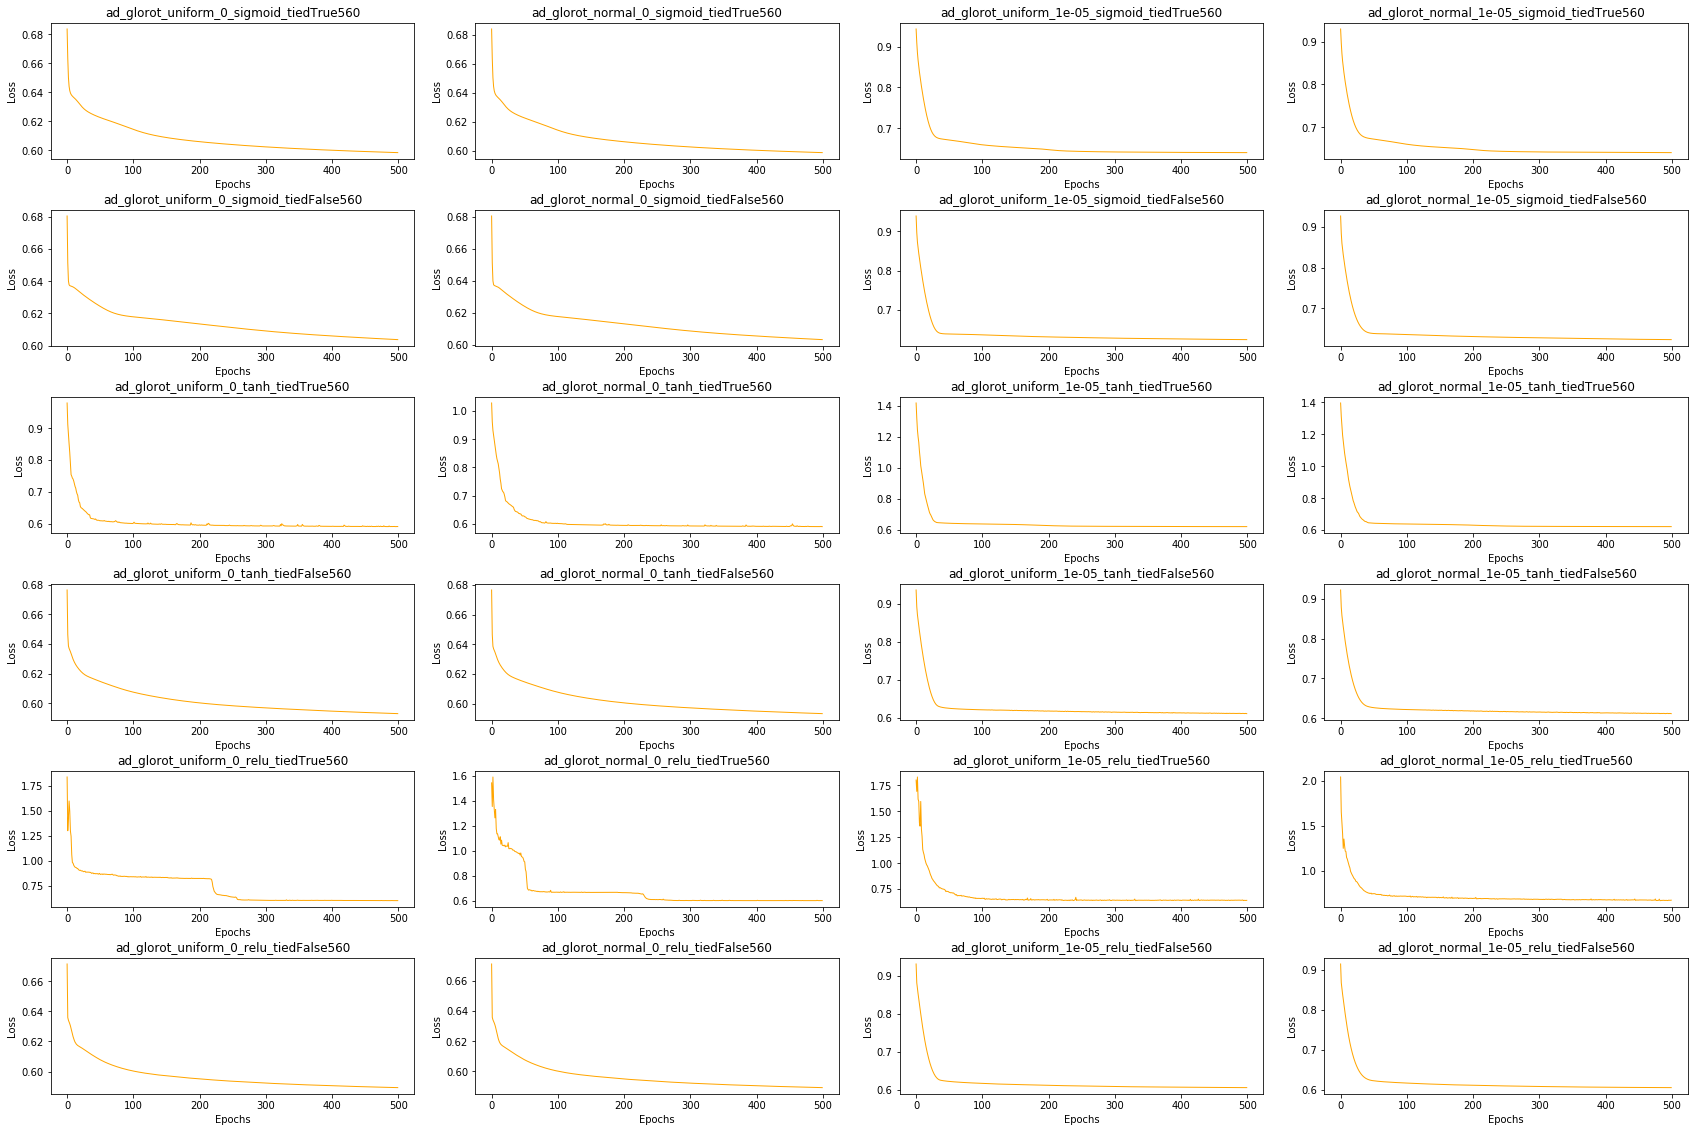

In [535]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict2[name]
                ax[xi,yi].plot(list(range(0,500)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1


In [ ]:
fig.savefig('training_loss_array.png')

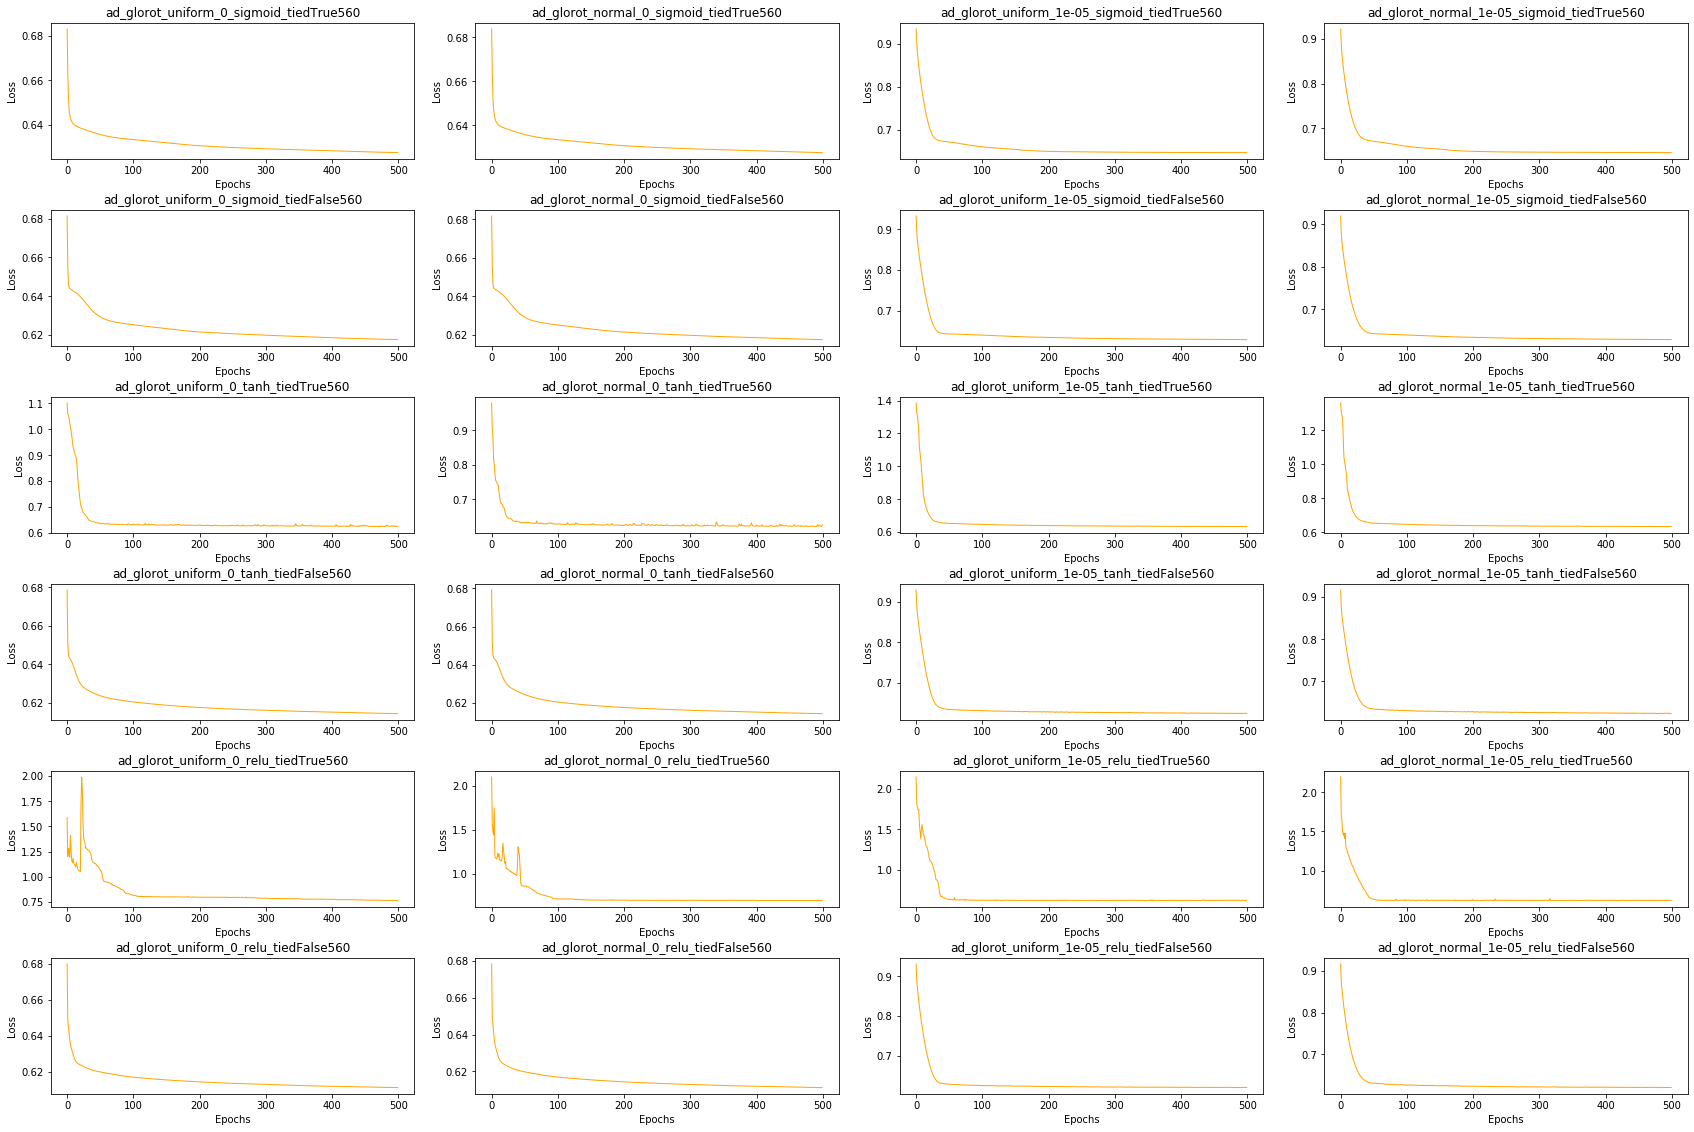

In [182]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict_seq2[name]
                ax[xi,yi].plot(list(range(0,500)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1


In [ ]:
fig.savefig('training_loss_seq.png')

#### Node weight distributions

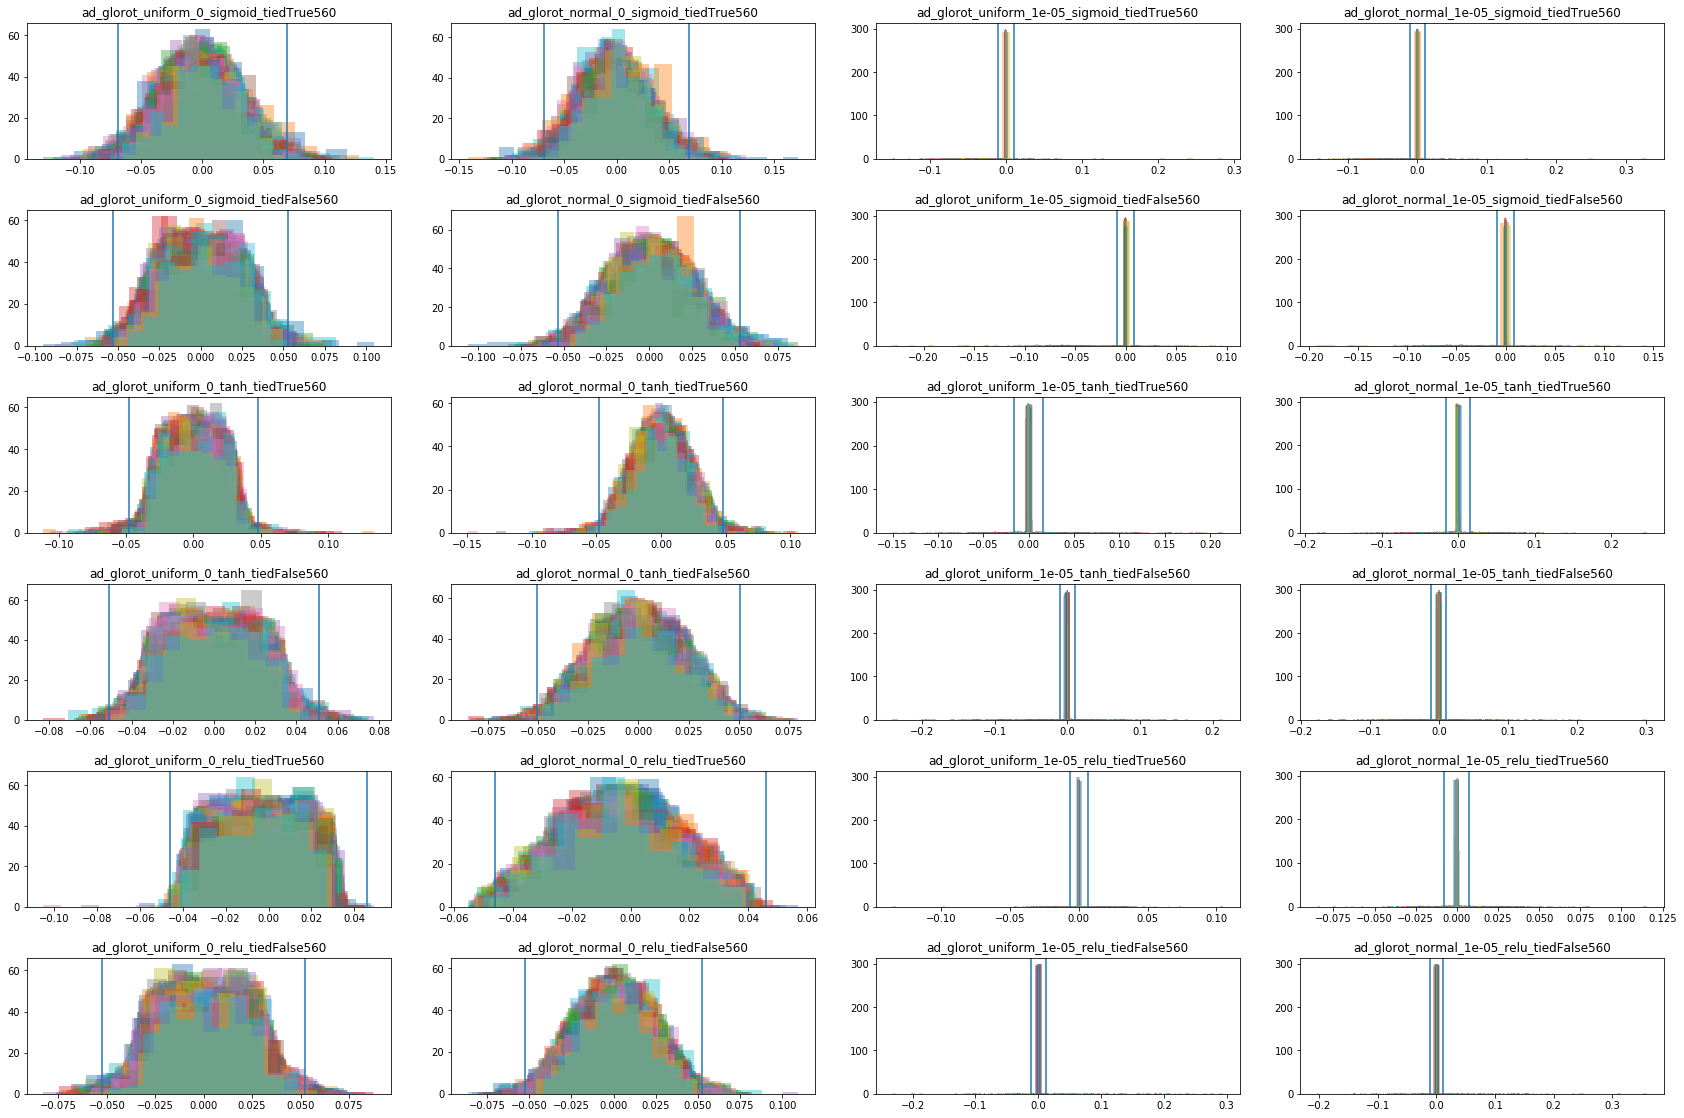

In [521]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict2[name]
                for node in range(0,300):
                    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        hist=True,
                        kde=False,
                        rug=False)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1



In [522]:
fig.savefig('array_distributions_b10.png')

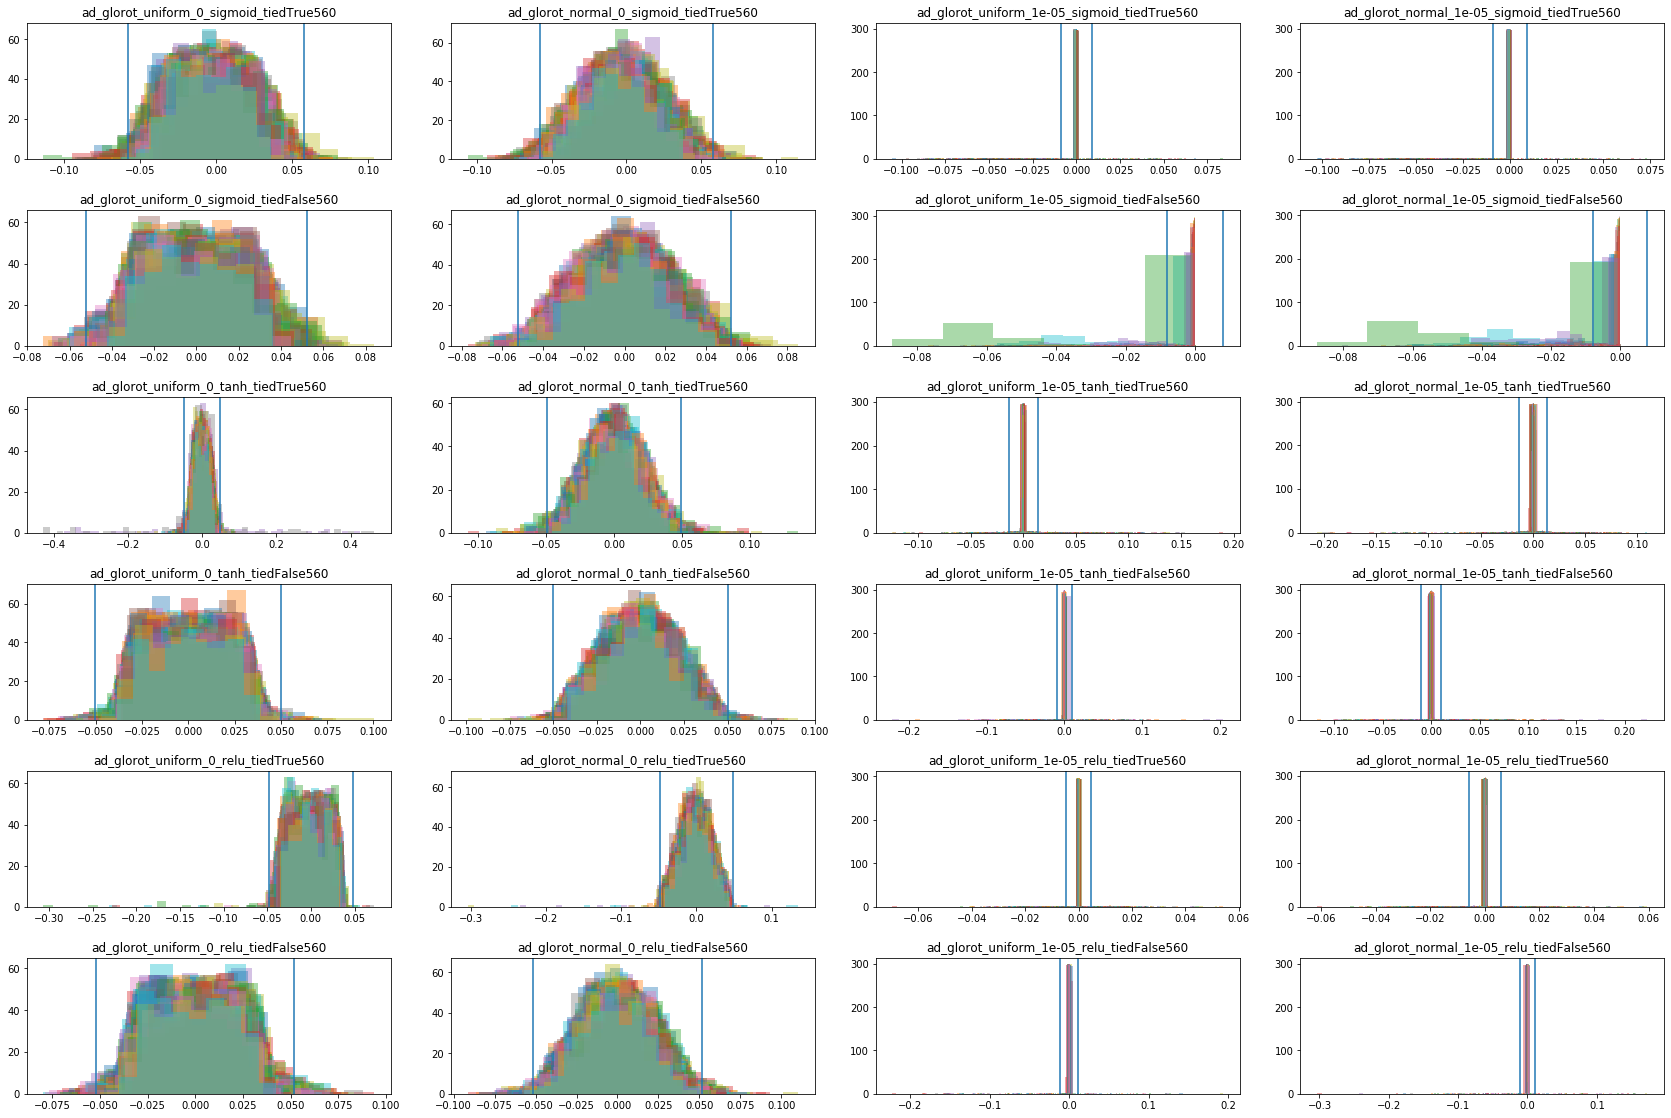

In [523]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict_seq2[name]
                for node in range(0,300):
                    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        hist=True,
                        kde=False,
                        rug=False)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1



In [524]:
fig.savefig('seq_distributions_b10.png')

[Text(0.5, 1, 'ad_glorot_uniform_0_sigmoid_tiedTrue560')]

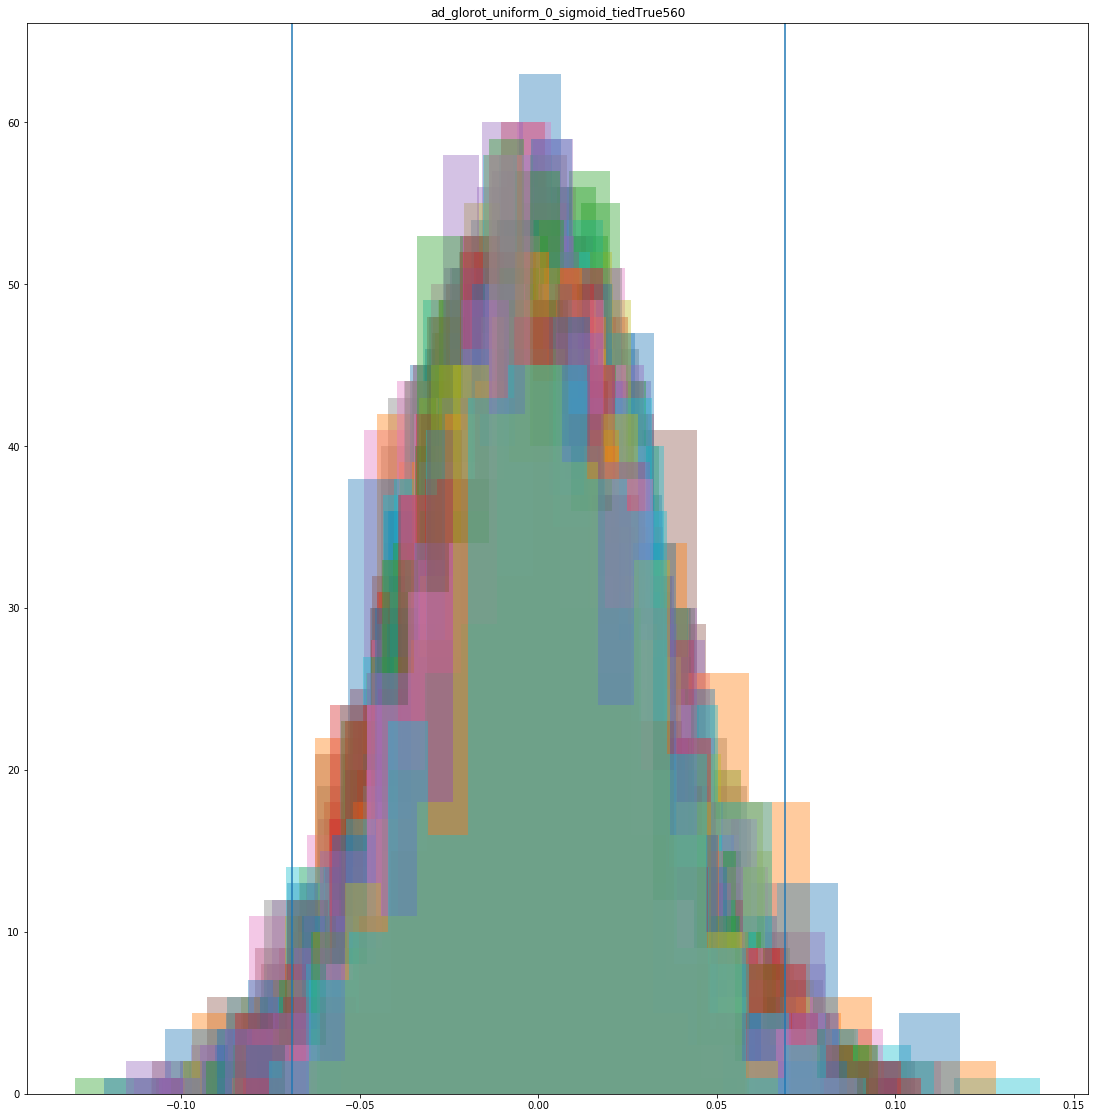

In [255]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*16 ,yd *16))
fig.tight_layout(pad=3.0)


name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'ad_glorot_normal_1e-05_relu_tiedFalse560'
name = 'ad_glorot_uniform_0_sigmoid_tiedTrue560'
model_temp = model_dict2[name]
for node in range(0,300):
    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
    ax=ax,
    hist=True,
    kde=False,
    rug=False)
ax.axvline(x = np.std(model_temp.weights)*2.5)
ax.axvline(x = np.std(model_temp.weights)*-2.5)
ax.set(title = name)
#ax.set_yscale('log')



#### HWG signature sizes

In [258]:
(model_dict2['tf_adage'].weights > np.std(model_dict2['tf_adage'].weights, axis=0)*2.5).shape

(5549, 300)

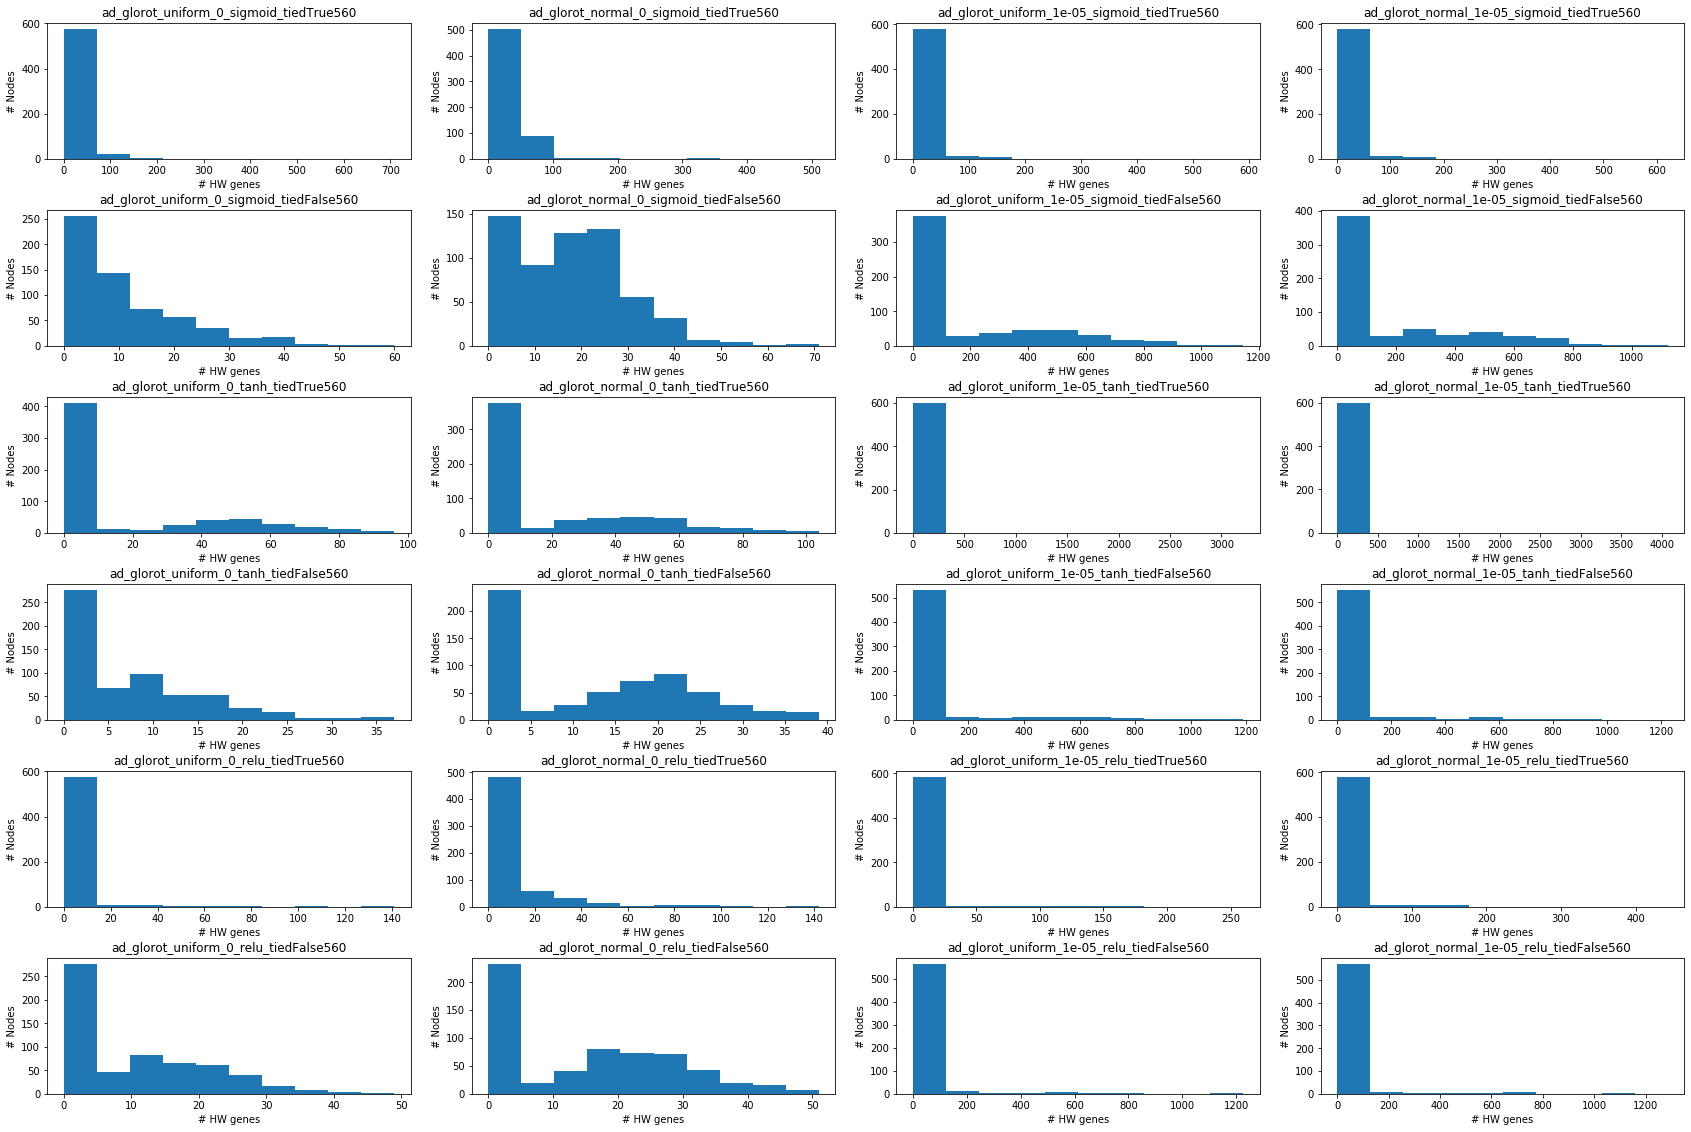

In [257]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict3[name]
                ax[xi,yi].hist(model_temp.hw_genes_all.sum(0))
                ax[xi,yi].set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
                xi = xi+1
        yi=yi+1



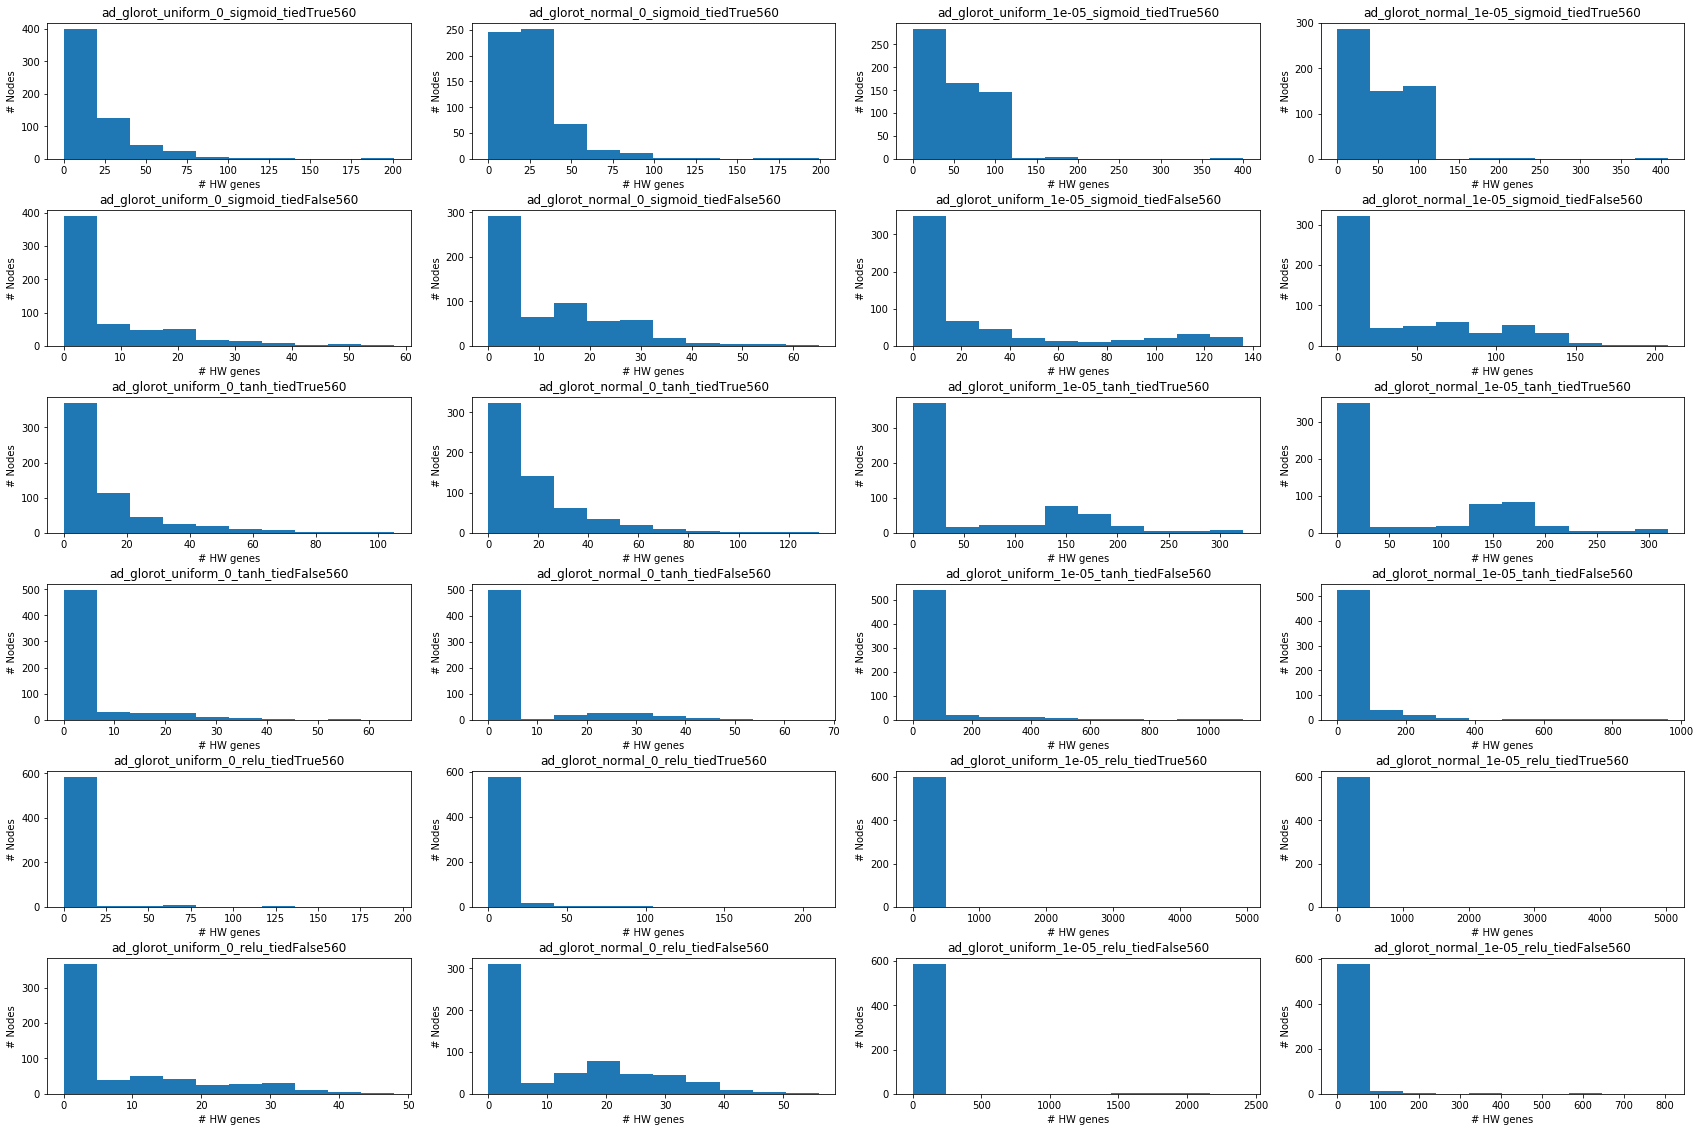

In [259]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict_seq3[name]
                ax[xi,yi].hist(model_temp.hw_genes_all.sum(0))
                ax[xi,yi].set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
                xi = xi+1
        yi=yi+1



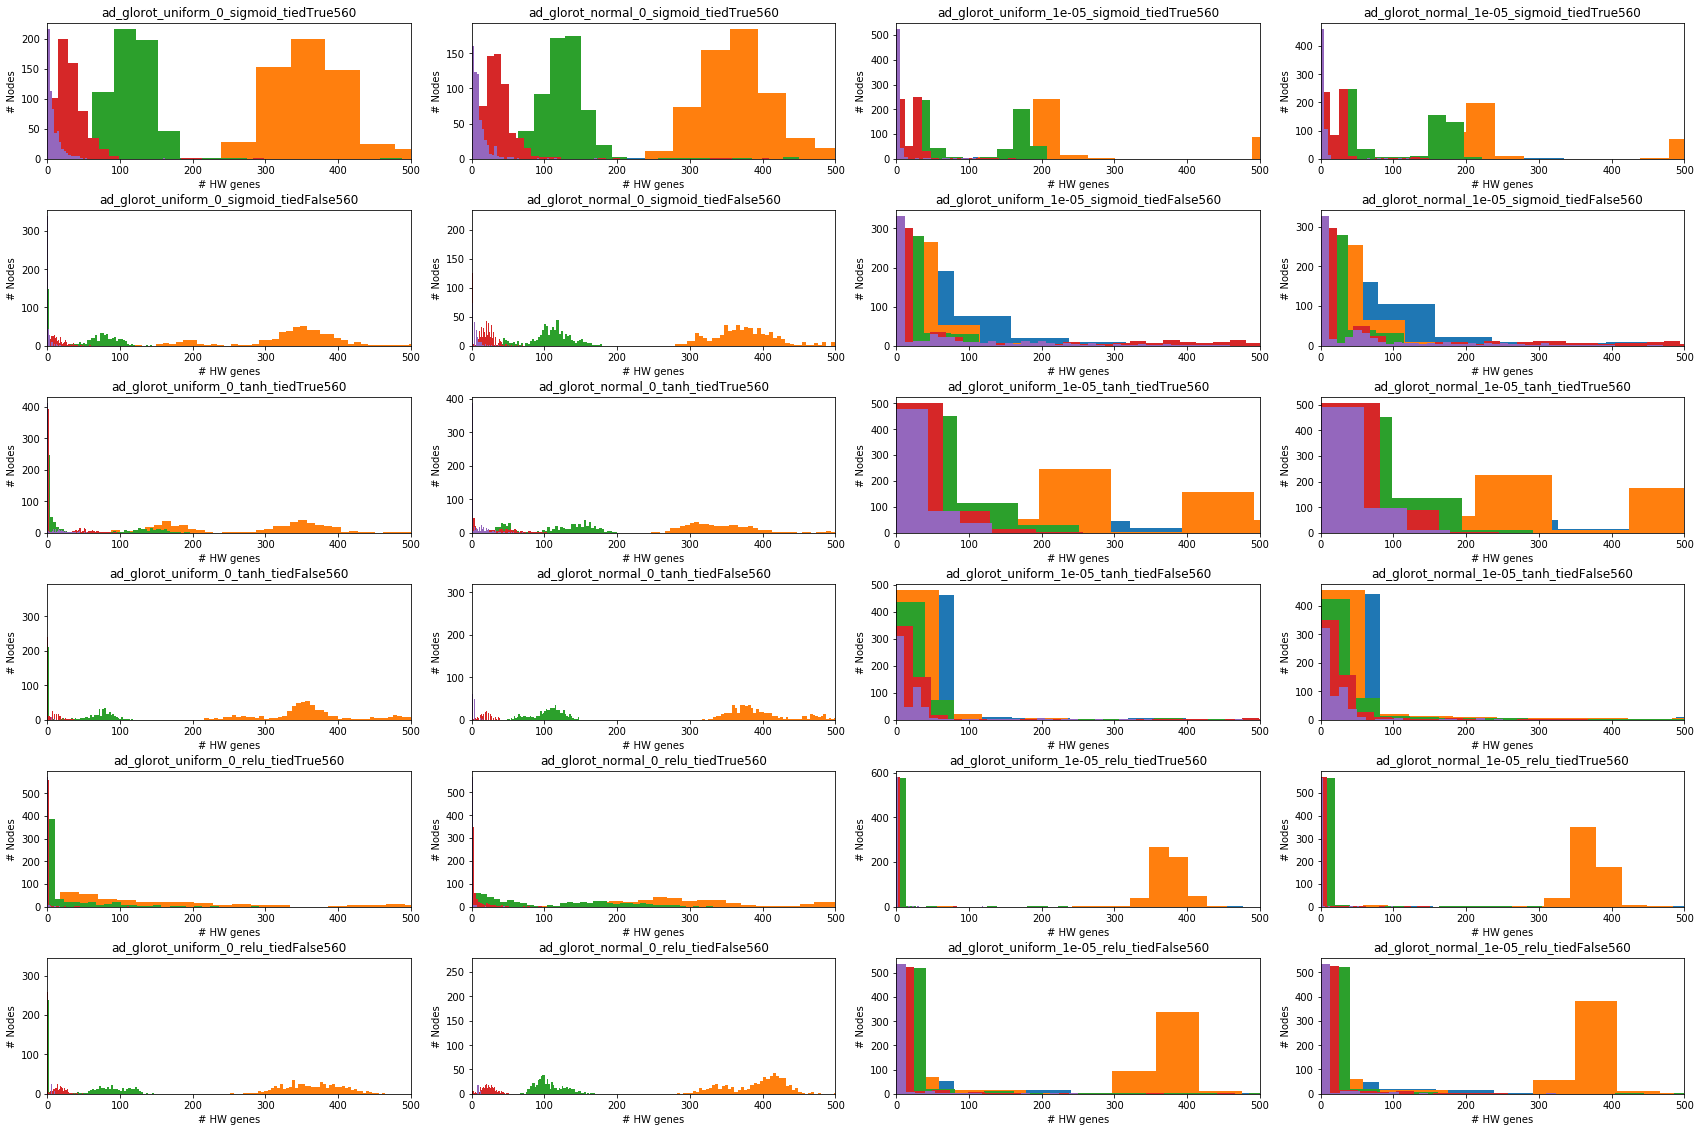

In [426]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict3[name]
                ax[xi,yi].set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
                #ax[xi,yi].set_xscale('log')
                #for c in [1.75,2,2.25,2.5]:
                for c in [1.0,1.5,2.0,2.5,3.0]:
                    model_temp.set_hwg_cutoff(c)
                    ax[xi,yi].hist(model_temp.hw_genes_all.sum(0), bins=50)
                    ax[xi,yi].set_xlim([0,500])

                xi = xi+1
        yi=yi+1

In [427]:
fig.savefig('sig_sizes_by_hw_cutoff_array_xlim500.png')

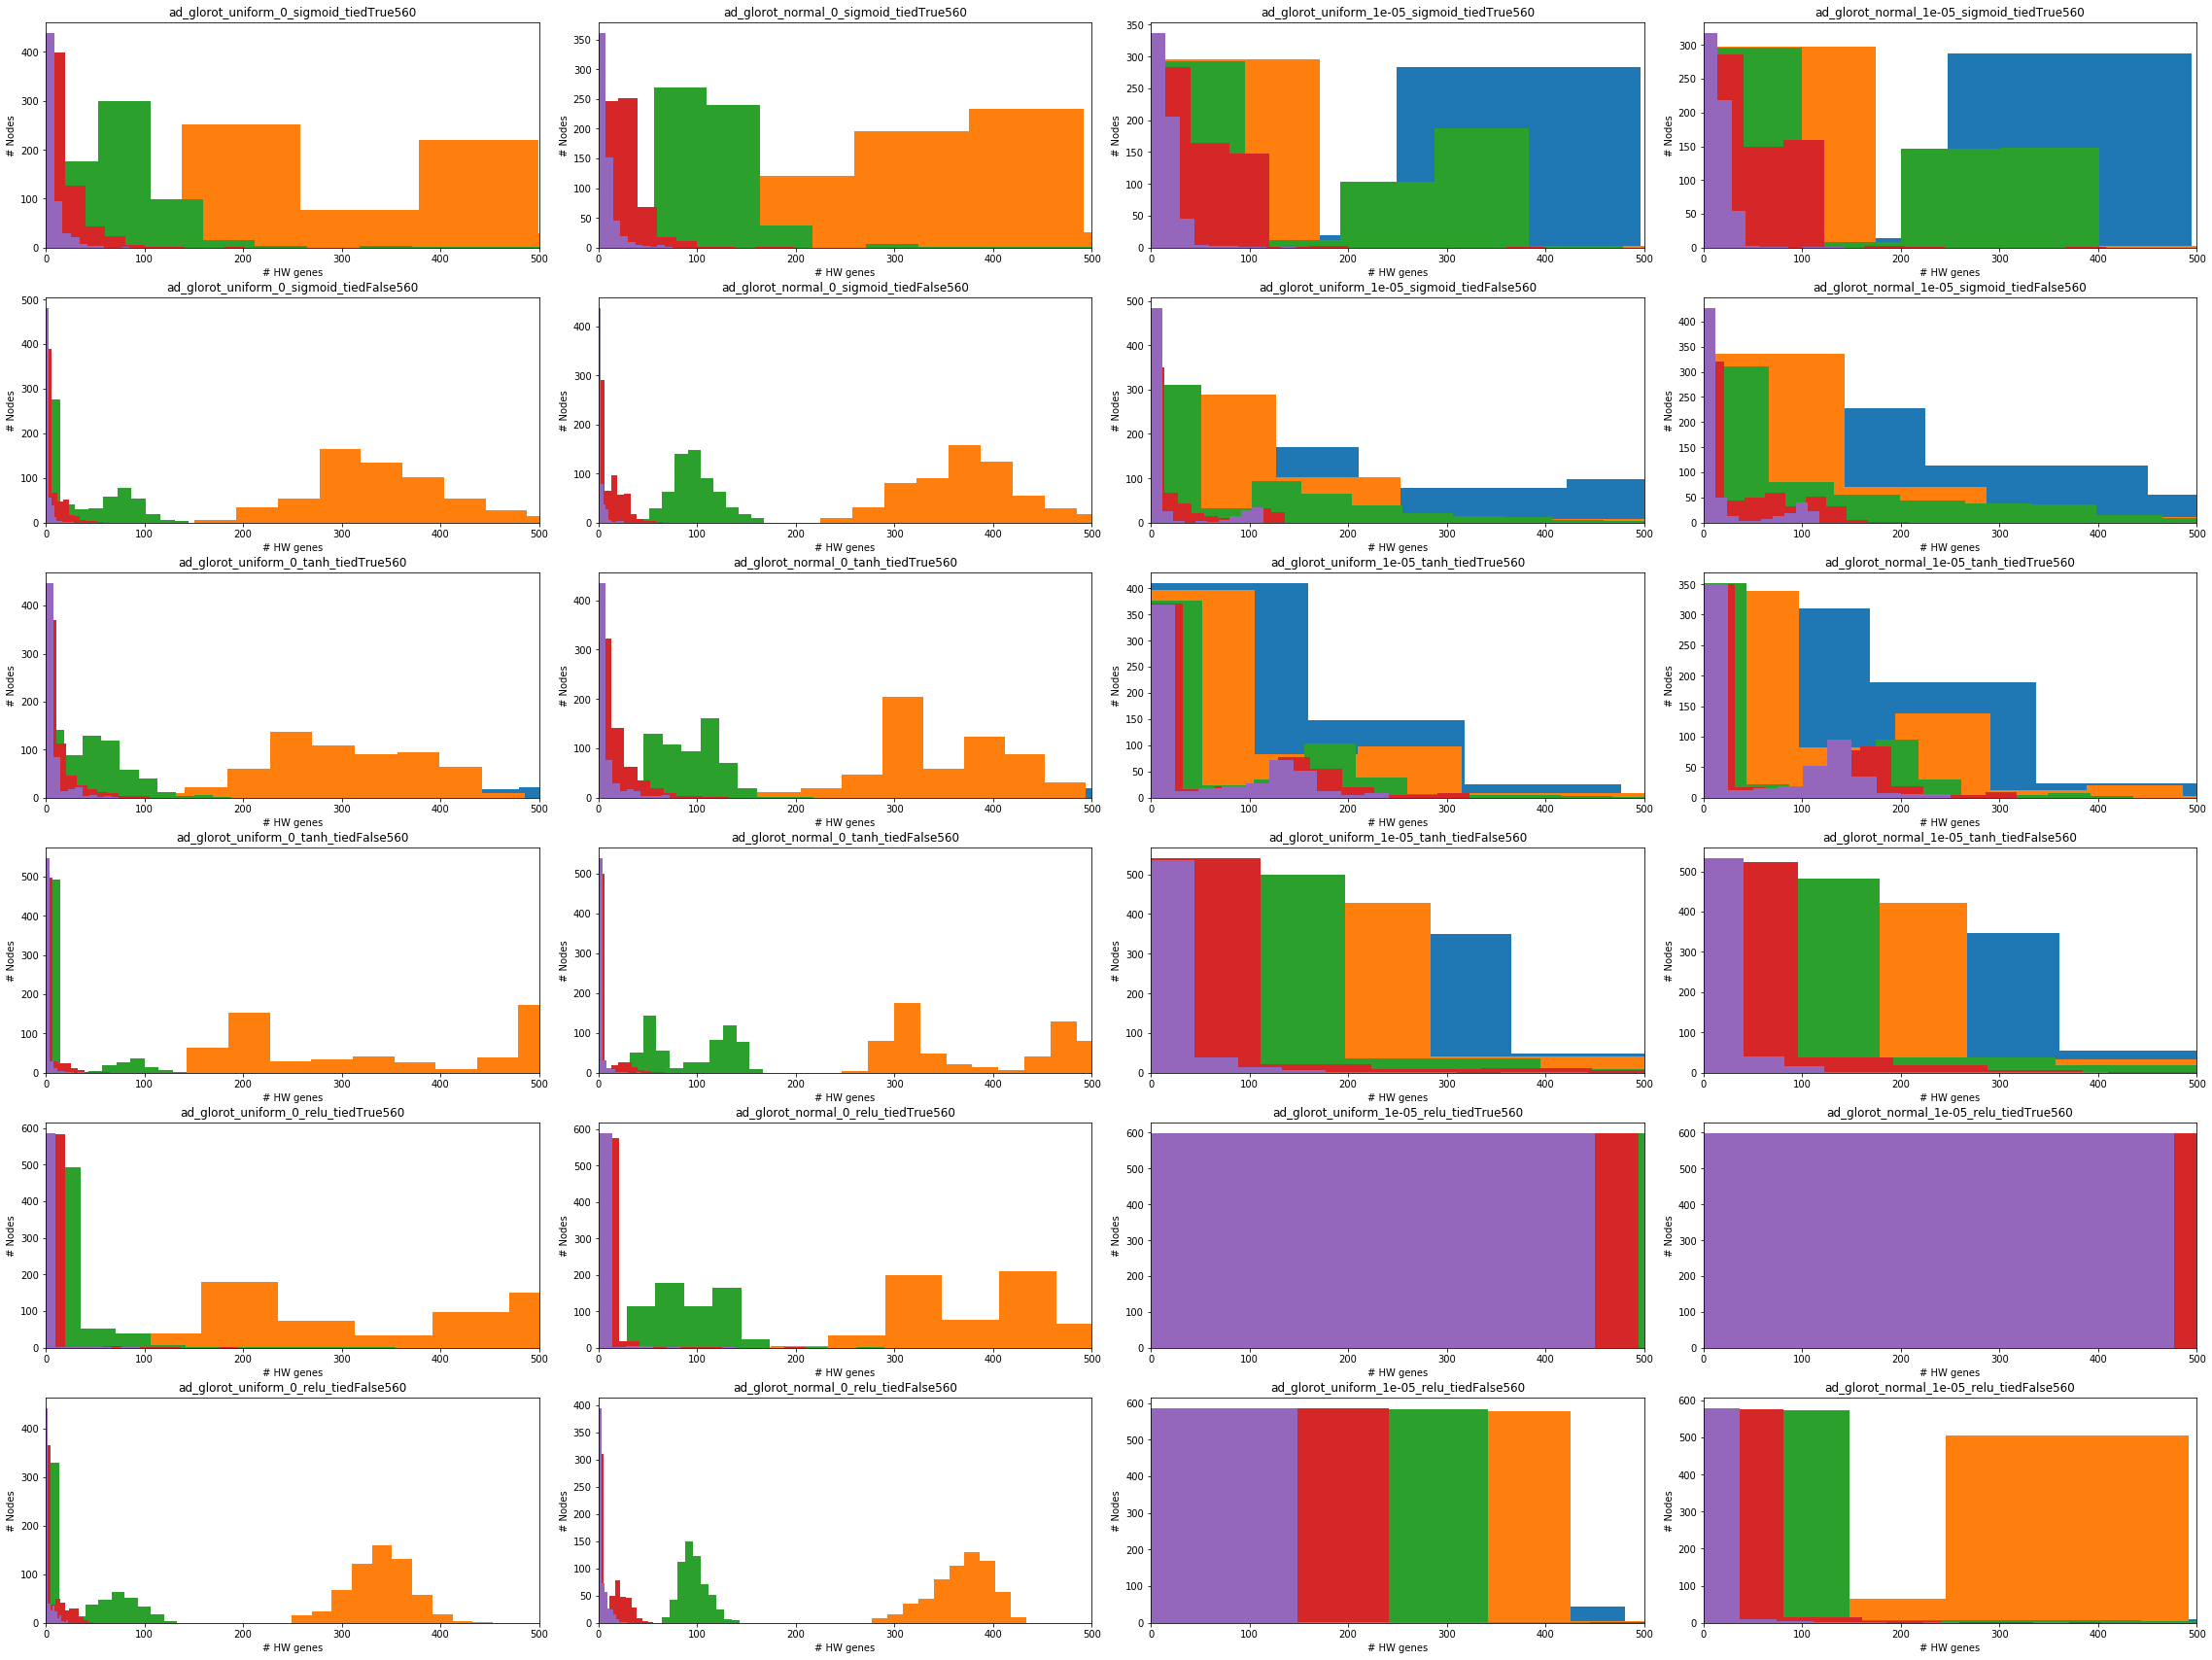

In [428]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict_seq3[name]
                ax[xi,yi].set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
                #ax[xi,yi].set_xscale('log')
                #for c in [1.75,2,2.25,2.5]:
                #for c in [3.0,2.5,2.0,1.5,1.0]:
                for c in [1.0,1.5,2.0,2.5,3.0]:
                    model_temp.set_hwg_cutoff(c)
                    ax[xi,yi].hist(model_temp.hw_genes_all.sum(0)) #, bins=50
                    ax[xi,yi].set_xlim([0,500])

                xi = xi+1
        yi=yi+1

In [423]:
fig.savefig('sig_sizes_by_hw_cutoff_seq.png')

[Text(45.125, 0.5, '# Nodes'),
 Text(0.5, 15.0, '# HW genes'),
 Text(0.5, 1, 'tf_adage')]

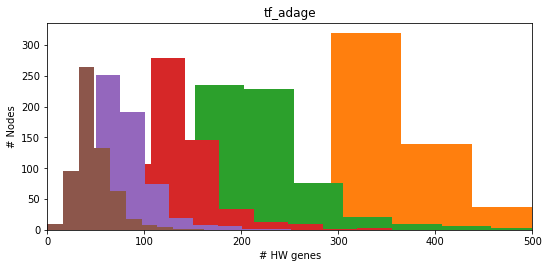

In [300]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*8 ,yd *4))
fig.tight_layout(pad=3.0)


name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'tf_adage'
model_temp = model_dict[name]
for c in [1,1.5,1.75,2,2.25,2.5]:
    model_temp.set_hwg_cutoff(c)
    ax.hist(model_temp.hw_genes_all.sum(0))
    ax.set_xlim([0,500])
ax.set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
#ax.set_yscale('log')



[Text(45.125, 0.5, '# HWGs'),
 Text(0.5, 15.0, 'Cutoff'),
 Text(0.5, 1, 'ad_glorot_normal_0_tanh_tiedTrue560')]

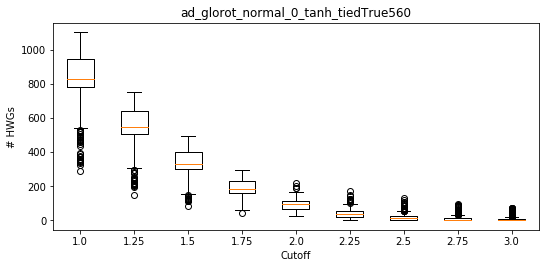

In [409]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*8 ,yd *4))
fig.tight_layout(pad=3.0)


name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'tf_adage'
name = 'ad_glorot_normal_0_tanh_tiedTrue560'
model_temp = model_dict_seq3[name]
hwgs = []
for c in [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0]:
    hwgs_temp = model_temp.set_hwg_cutoff(c)
    hwgs.append(model_temp.hw_genes_all.sum(0))
    
ax.boxplot(hwgs, labels = [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0])

ax.set(title = name, xlabel = 'Cutoff', ylabel = '# HWGs')
#ax.set_yscale('log')

[Text(45.125, 0.5, '# KEGG / Node'),
 Text(0.5, 15.0, 'Cutoff'),
 Text(0.5, 1, 'ad_glorot_normal_0_tanh_tiedTrue560')]

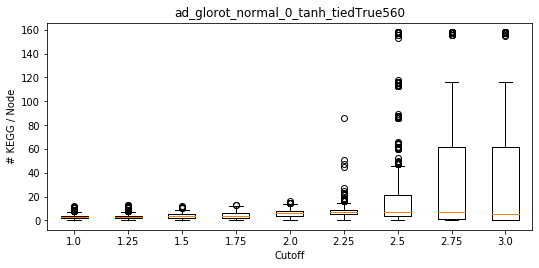

In [410]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*8 ,yd *4))
fig.tight_layout(pad=3.0)



plim=5
name = 'tf_adage'
name = 'ad_glorot_normal_0_tanh_tiedTrue560'
model_temp = model_dict_seq3[name]
hwgs = []
for c in [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0]:
    hwgs_temp = model_temp.set_hwg_cutoff(c)
    model_temp.set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    en_temp = (model_temp.kegg_ps > plim).sum(1)
    hwgs.append(en_temp)
    
ax.boxplot(hwgs, labels = [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0])

ax.set(title = name, xlabel = 'Cutoff', ylabel = '# KEGG / Node')
#ax.set_yscale('log')

In [ ]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*8 ,yd *4))
fig.tight_layout(pad=3.0)



plim=5
name = 'tf_adage'
name = 'ad_glorot_normal_0_tanh_tiedTrue560'
model_temp = model_dict_seq3[name]
hwgs = []
for c in [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0]:
    hwgs_temp = model_temp.set_hwg_cutoff(c)
    model_temp.set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    en_temp = (model_temp.kegg_ps > plim).sum(1)
    hwgs.append(en_temp)
    
ax.boxplot(hwgs, labels = [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0])

ax.set(title = name, xlabel = 'Cutoff', ylabel = '# KEGG / Node')
#ax.set_yscale('log')

[Text(45.125, 0.5, '# KEGG / Node'),
 Text(0.5, 15.0, 'Cutoff'),
 Text(0.5, 1, 'ad_glorot_uniform_0_sigmoid_tiedTrue560')]

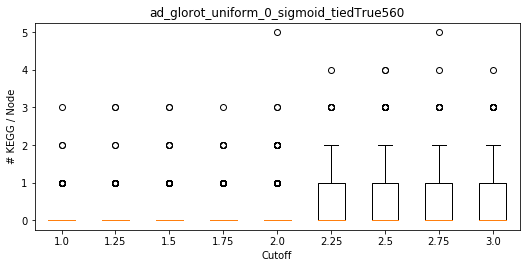

In [355]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*8 ,yd *4))
fig.tight_layout(pad=3.0)


name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
#print(name)
plim=10
name = 'ad_glorot_uniform_0_sigmoid_tiedTrue560'
model_temp = model_dict_seq3[name]
hwgs = []
for c in [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0]:
    hwgs_temp = model_temp.set_hwg_cutoff(c)
    model_temp.set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    en_temp = (model_temp.kegg_ps > plim).sum(1)
    hwgs.append(en_temp)
    
ax.boxplot(hwgs, labels = [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0])

ax.set(title = name, xlabel = 'Cutoff', ylabel = '# KEGG / Node')
#ax.set_yscale('log')

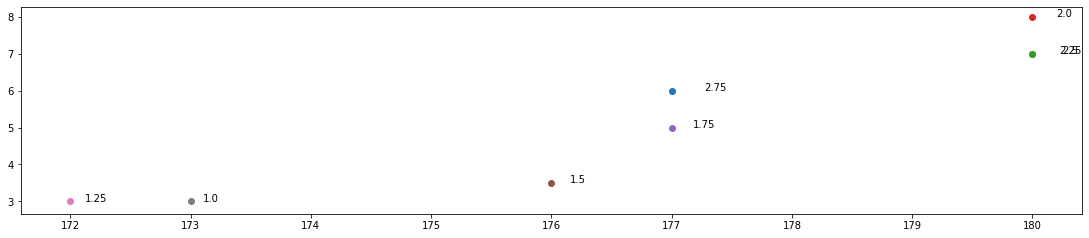

In [414]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*16 ,yd *4))
fig.tight_layout(pad=3.0)


name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
#print(name)
plim=5
name = 'ad_glorot_uniform_0_sigmoid_tiedTrue560'
name = 'ad_glorot_uniform_0_tanh_tiedTrue560'
model_temp = model_dict_seq3[name]
hwgs = []
for c in [2.75,2.5,2.25,2.0, 1.75,1.5, 1.25, 1.0]:
    hwgs_temp = model_temp.set_hwg_cutoff(c)
    model_temp.set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    en_temp = (model_temp.kegg_ps > plim).sum(1)
    hwgs.append(en_temp)
    kegg_per_med = (model_temp.kegg_ps > plim).sum(1).median()
    all_kegg = ((model_temp.kegg_ps > plim).sum(0) > 0).sum()
    ax.scatter(x = all_kegg , y = kegg_per_med)
    ax.text(x = all_kegg+(c/10), y = kegg_per_med,s = str(c))
               

               #ax.hist(hwgs, label = [2.75,2.5,2.25,2.0])
#ax.legend(prop={'size': 10})
    
#ax.boxplot(hwgs, labels = [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0])

#ax.set(title = name, xlabel = 'Cutoff', ylabel = '# KEGG / Node')
#ax.set_yscale('log')

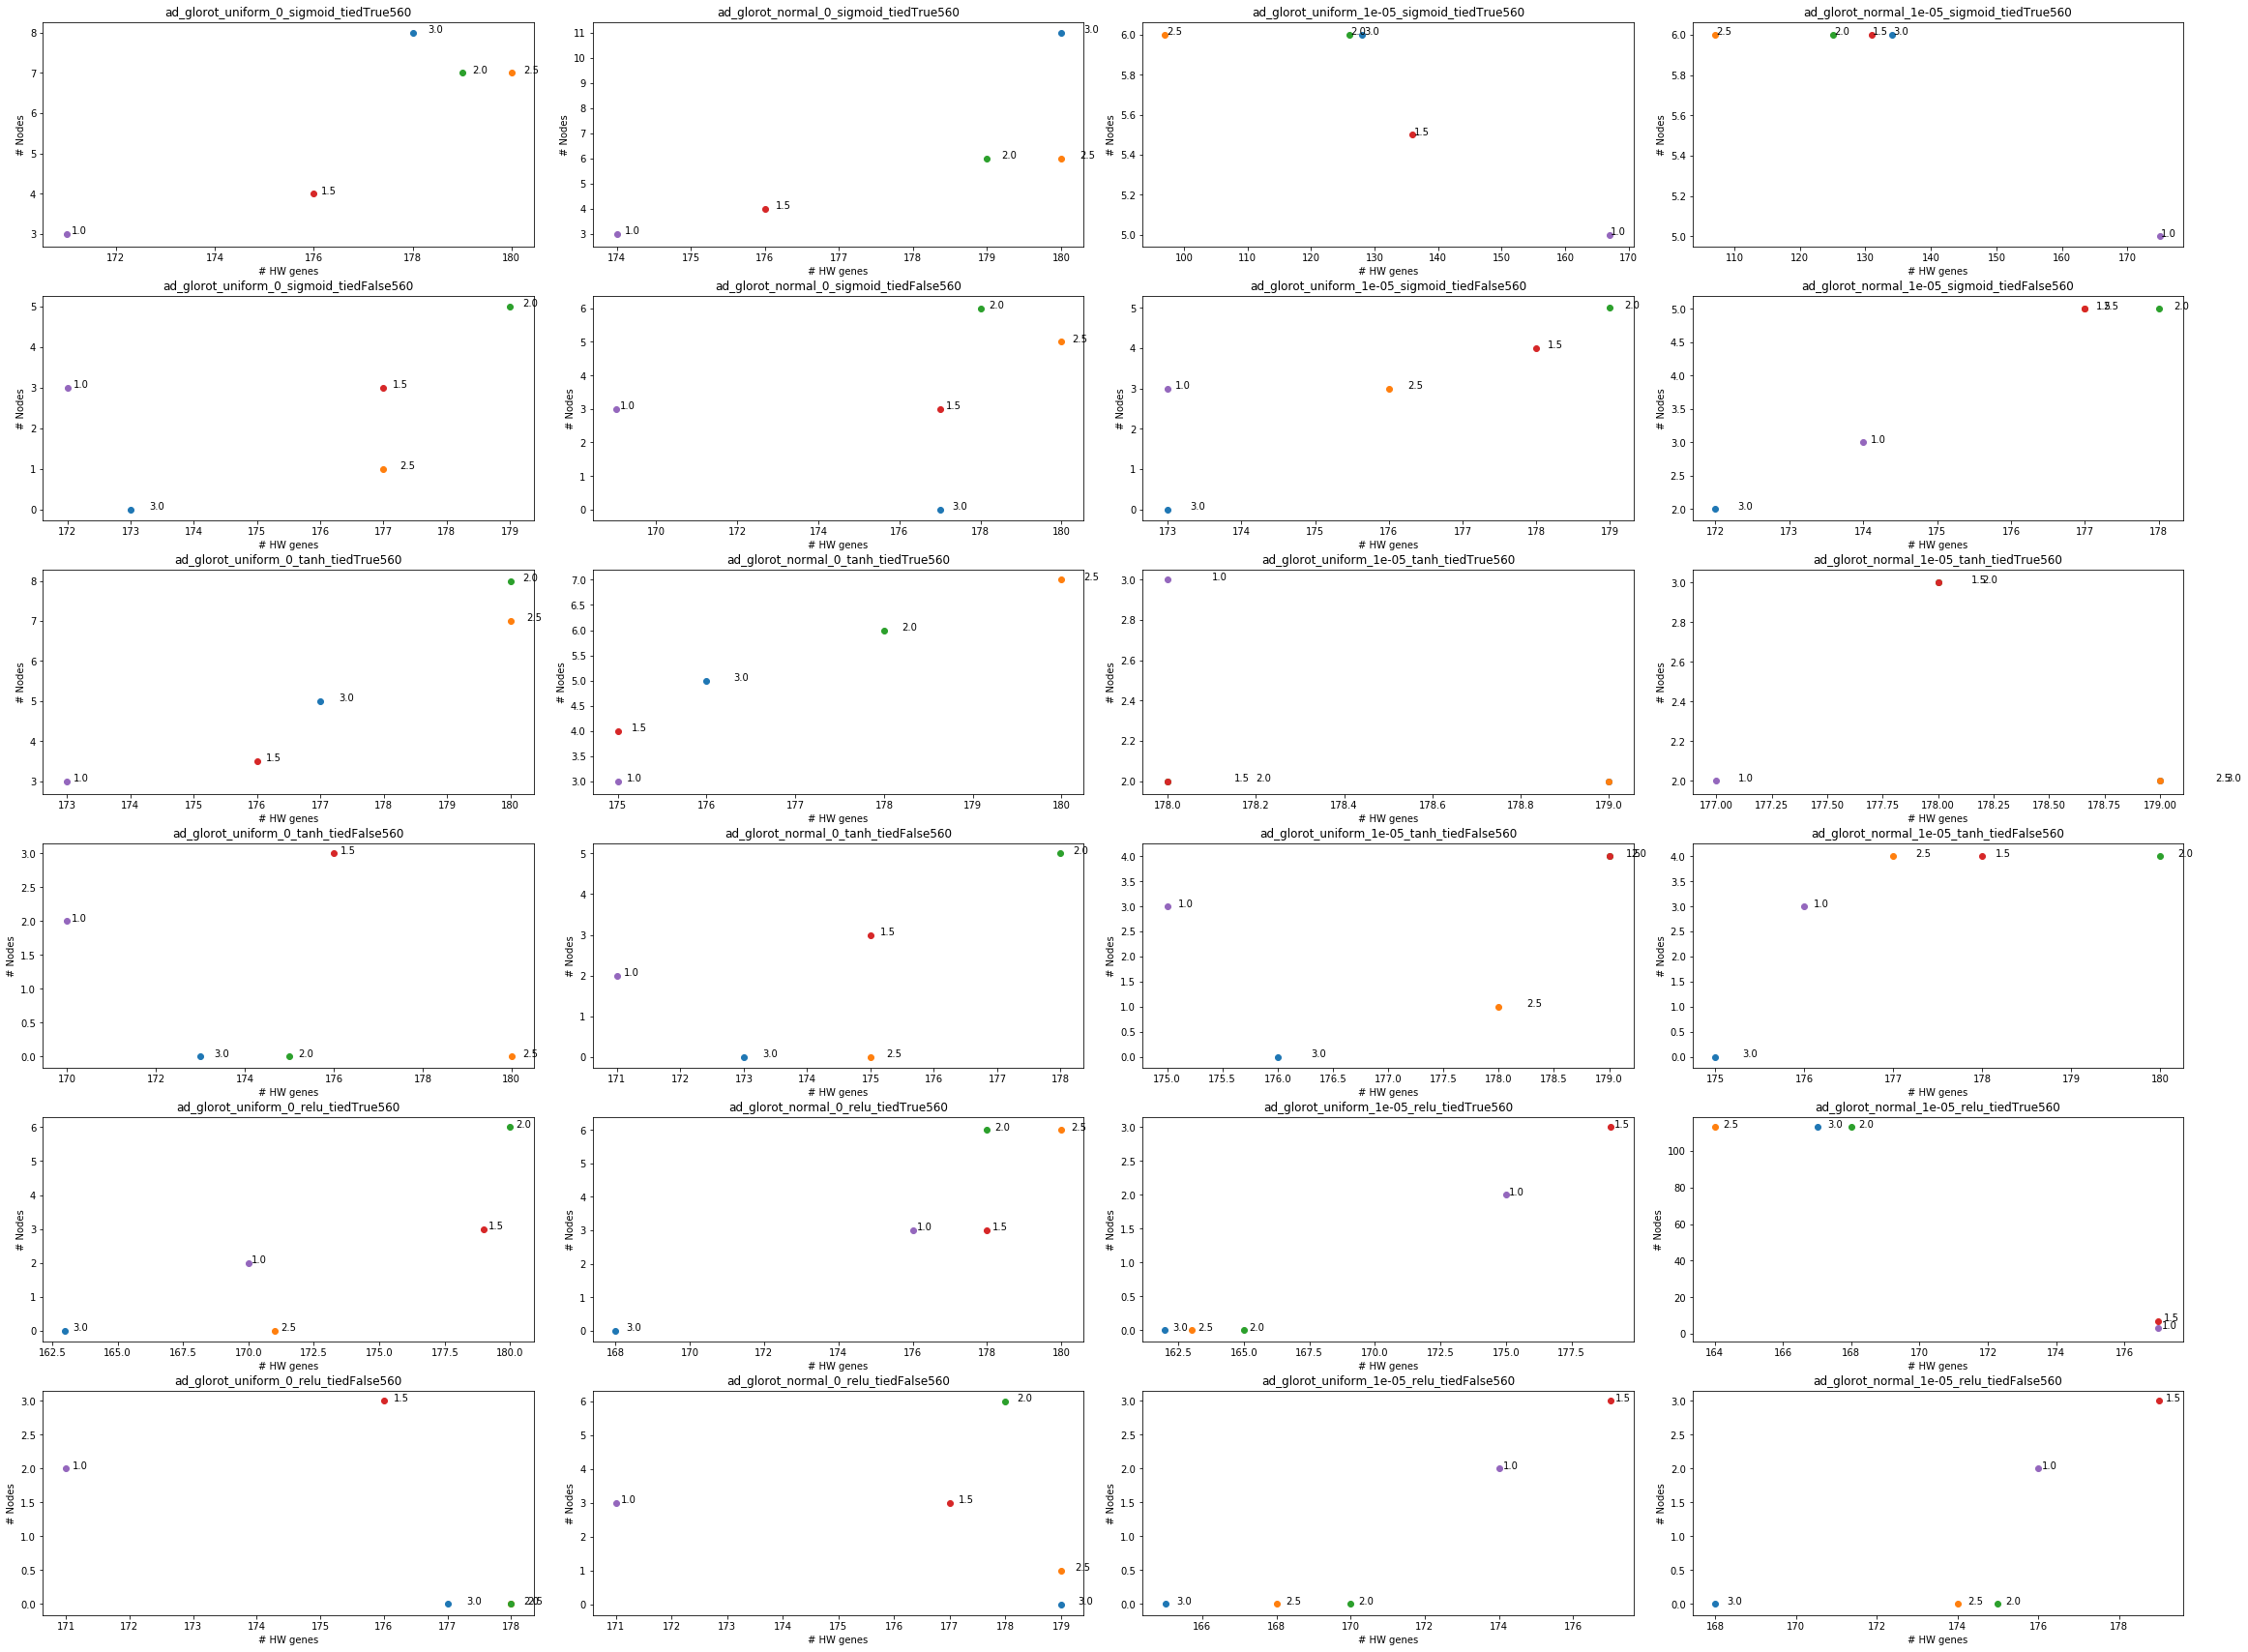

In [415]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)
plim = 5
xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict_seq3[name]
                ax[xi,yi].set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
                #ax[xi,yi].set_xscale('log')
                #for c in [1.75,2,2.25,2.5]:
                hwgs = []
                for c in [3.0,2.5,2.0,1.5,1.0]:
                    hwgs_temp = model_temp.set_hwg_cutoff(c)
                    model_temp.set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
                    en_temp = (model_temp.kegg_ps > plim).sum(1)
                    hwgs.append(en_temp)
                    kegg_per_med = (model_temp.kegg_ps > plim).sum(1).median()
                    all_kegg = ((model_temp.kegg_ps > plim).sum(0) > 0).sum()
                    ax[xi,yi].scatter(x = all_kegg , y = kegg_per_med)
                    ax[xi,yi].text(x = all_kegg+(c/10), y = kegg_per_med,s = str(c))

                xi = xi+1
        yi=yi+1

In [416]:
fig.savefig('kegg_en_by_hw_cutoff_seq.png')

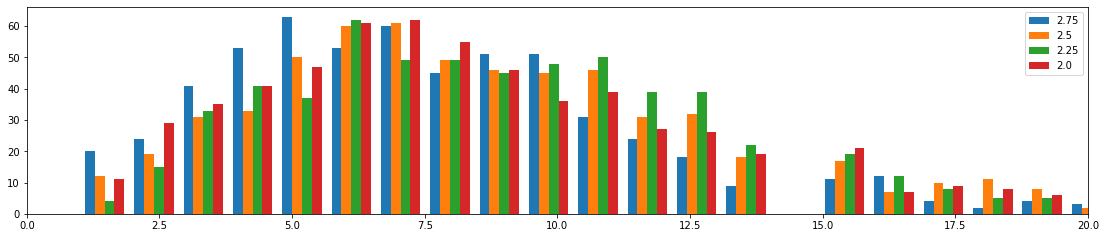

In [342]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*16 ,yd *4))
fig.tight_layout(pad=3.0)
ax.hist(hwgs,bins = 100, label = [2.75,2.5,2.25,2.0])
ax.set_xlim([0,20])
ax.legend(prop={'size': 10})

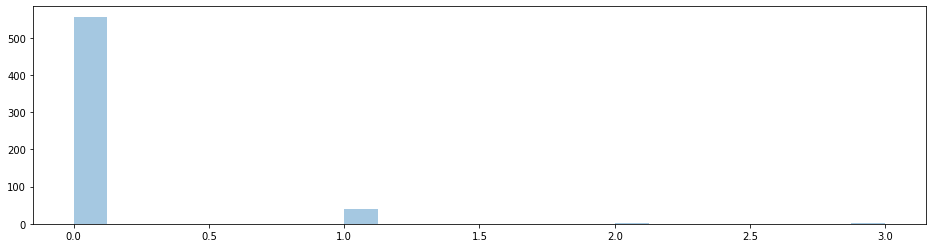

In [385]:
fig, ax = plt.subplots(xd, yd,figsize=(xd*16 ,yd *4))
sns.distplot(hwgs[0], ax=ax, kde=False)

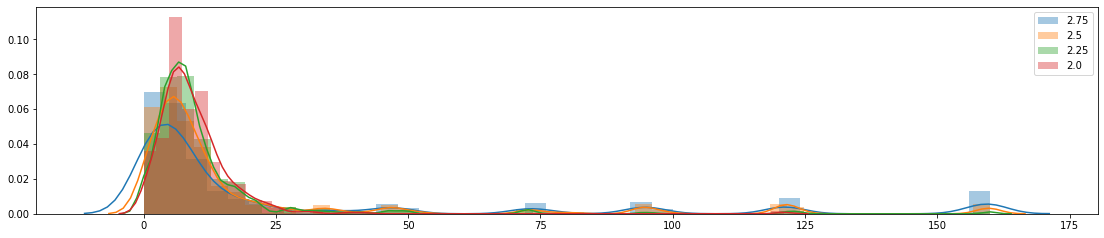

In [400]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*16 ,yd *4))
fig.tight_layout(pad=3.0)
for n in range(4):
    sns.distplot(hwgs[n], label = [2.75,2.5,2.25,2.0][n], #[model_temp.weights[node] > 0],
    ax=ax,
    hist=True,
    kde=True
)
ax.legend()
#ax.axvline(x = np.std(model_temp.weights)*2.5)
#ax.axvline(x = np.std(model_temp.weights)*-2.5)
#ax.set(title = name)

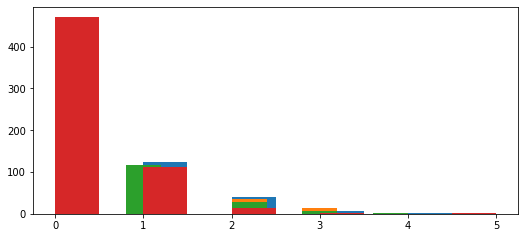

In [321]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*8 ,yd *4))
fig.tight_layout(pad=3.0)


name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
#print(name)
plim=10
name = 'ad_glorot_uniform_0_sigmoid_tiedTrue560'
model_temp = model_dict_seq3[name]
hwgs = []
for c in [2.75,2.5,2.25,2.0]:
    hwgs_temp = model_temp.set_hwg_cutoff(c)
    model_temp.set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    ax.hist((model_temp.kegg_ps > plim).sum(1))
    
#ax.boxplot(hwgs, labels = [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0])

#ax.set(title = name, xlabel = 'Cutoff', ylabel = '# KEGG / Node')
#ax.set_yscale('log')

In [333]:
(model_dict['tf_adage'].kegg_ps > 10).sum(1)[(model_dict['tf_adage'].kegg_ps > 10).sum(1) > 0]

TypeError: '>' not supported between instances of 'list' and 'int'

In [305]:

model_dict['tf_adage'].set_hwg_cutoff(2.5)
model_dict['tf_adage'].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt')
((model_dict['tf_adage'].kegg_ps > 10).sum(1) > 0).sum()

334

#### Enrichments

In [ ]:
for m in model_dict:
    model_dict[m].set_hwg_cutoff(2.5)
    #model_dict[m].set_kegg('node_interpretation/operons_format.txt')
    model_dict[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    #model_dict[m].set_go('node_interpretation/regulons_format.txt')
  

##### Summary Fig

In [ ]:
plim = 30

fig, ax = plt.subplots(1,1,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].go_ps > plim).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plim).sum(1) > 0).sum()
ax.scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(10):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict[name]
                    x = ((model_temp.go_ps > plim).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plim).sum(1) > 0).sum()
                    ax.scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    ax.set(title = m, xlabel = '# Regulons', ylabel = '# Nodes')

                    #xi = xi+1
                ec='red'
            mi = mi+1
        s=500
    c = 'grey'

##### Details

In [ ]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for i in inits:
    for l in L1_norm:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].hist((model_temp.kegg_ps > 10).sum(0))
                ax[xi,yi].set(title = name, xlabel = '# Nodes per Pathway', ylabel = '# Pathways')
                xi = xi+1
        yi=yi+1





In [ ]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for i in inits:
    for l in L1_norm:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].hist((model_temp.kegg_ps > 10).sum(1))
                ax[xi,yi].set(title = name, xlabel = '# Pathways in Node', ylabel = '# Nodes')
                xi = xi+1
        yi=yi+1


### Write out HWG lists

In [276]:
for m in model_dict_seq3:
    model_dict_seq3[m].set_hwg_cutoff(2.0)
    #model_dict_seq[m].set_op('node_interpretation/operons_format.txt')
    #print('op done')
    model_dict_seq3[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    #print('kegg done')
    model_dict_seq3[m].set_go('node_interpretation/manual_GO_BP_terms.txt') 
    #print('go done')
    model_dict_seq3[m].set_reg('node_interpretation/regulons_format.txt')
    #print('reg done')
    print(m)
print('dict seq done') 

tf_adage
ad_glorot_uniform_0_sigmoid_tiedTrue560
ad_glorot_uniform_0_sigmoid_tiedTrue561
ad_glorot_uniform_0_sigmoid_tiedTrue562
ad_glorot_uniform_0_sigmoid_tiedFalse560
ad_glorot_uniform_0_sigmoid_tiedFalse561
ad_glorot_uniform_0_sigmoid_tiedFalse562
ad_glorot_uniform_0_tanh_tiedTrue560
ad_glorot_uniform_0_tanh_tiedTrue561
ad_glorot_uniform_0_tanh_tiedTrue562
ad_glorot_uniform_0_tanh_tiedFalse560
ad_glorot_uniform_0_tanh_tiedFalse561
ad_glorot_uniform_0_tanh_tiedFalse562
ad_glorot_uniform_0_relu_tiedTrue560
ad_glorot_uniform_0_relu_tiedTrue561
ad_glorot_uniform_0_relu_tiedTrue562
ad_glorot_uniform_0_relu_tiedFalse560
ad_glorot_uniform_0_relu_tiedFalse561
ad_glorot_uniform_0_relu_tiedFalse562
ad_glorot_uniform_1e-05_sigmoid_tiedTrue560
ad_glorot_uniform_1e-05_sigmoid_tiedTrue561
ad_glorot_uniform_1e-05_sigmoid_tiedTrue562
ad_glorot_uniform_1e-05_sigmoid_tiedFalse560
ad_glorot_uniform_1e-05_sigmoid_tiedFalse561
ad_glorot_uniform_1e-05_sigmoid_tiedFalse562
ad_glorot_uniform_1e-05_tanh_ti

In [196]:
for m in model_dict:
    model_dict[m].set_hwg_cutoff(2.5)
    model_dict[m].set_op('node_interpretation/operons_format.txt')

print('dict done') 

for m in model_dict_seq:
    model_dict_seq[m].set_hwg_cutoff(2.5)
    model_dict_seq[m].set_op('node_interpretation/operons_format.txt')

print('dict seq done') 

for m in model_dict2:
    model_dict2[m].set_hwg_cutoff(2.5)
    model_dict2[m].set_op('node_interpretation/operons_format.txt')

print('dict2 done')  

for m in model_dict_seq2:
    model_dict_seq2[m].set_hwg_cutoff(2.5)
    model_dict_seq2[m].set_op('node_interpretation/operons_format.txt')

print('dict seq2 done') 

dict done
dict seq done


KeyboardInterrupt: 

In [534]:
for m in model_dict3:
    model_dict3[m].set_hwg_cutoff(2.5)
    model_dict3[m].set_op('node_interpretation/operons_format.txt')

print('dict2 done')  

for m in model_dict_seq3:
    model_dict_seq3[m].set_hwg_cutoff(2.5)
    model_dict_seq3[m].set_op('node_interpretation/operons_format.txt')

print('dict seq2 done') 

dict2 done
dict seq2 done


In [142]:
for m in model_dict:
    model_dict[m].set_hwg_cutoff(2.5)
    model_dict[m].set_op('node_interpretation/operons_format.txt')
    print('op done')
    model_dict[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    print('kegg done')
    model_dict[m].set_go('node_interpretation/manual_GO_BP_terms.txt') 
    print('go done')
    model_dict[m].set_reg('node_interpretation/regulons_format.txt')
    print('reg done')
print('dict done') 

for m in model_dict_seq:
    model_dict_seq[m].set_hwg_cutoff(2.5)
    model_dict_seq[m].set_op('node_interpretation/operons_format.txt')
    print('op done')
    model_dict_seq[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    print('kegg done')
    model_dict_seq[m].set_go('node_interpretation/manual_GO_BP_terms.txt') 
    print('go done')
    model_dict_seq[m].set_reg('node_interpretation/regulons_format.txt')
    print('reg done')
print('dict seq done') 

for m in model_dict2:
    model_dict2[m].set_hwg_cutoff(2.5)
    model_dict2[m].set_op('node_interpretation/operons_format.txt')
    print('op done')
    model_dict2[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    print('kegg done')
    model_dict2[m].set_go('node_interpretation/manual_GO_BP_terms.txt') 
    print('go done')
    model_dict2[m].set_reg('node_interpretation/regulons_format.txt')
    print('reg done')
print('dict2 done')  

for m in model_dict_seq2:
    model_dict_seq2[m].set_hwg_cutoff(2.5)
    model_dict_seq2[m].set_op('node_interpretation/operons_format.txt')
    print('op done')
    model_dict_seq2[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    print('kegg done')
    model_dict_seq2[m].set_go('node_interpretation/manual_GO_BP_terms.txt') 
    print('go done')
    model_dict_seq2[m].set_reg('node_interpretation/regulons_format.txt')
    print('reg done')
print('dict seq2 done') 

op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go

NameError: name 'model_dict_seq' is not defined

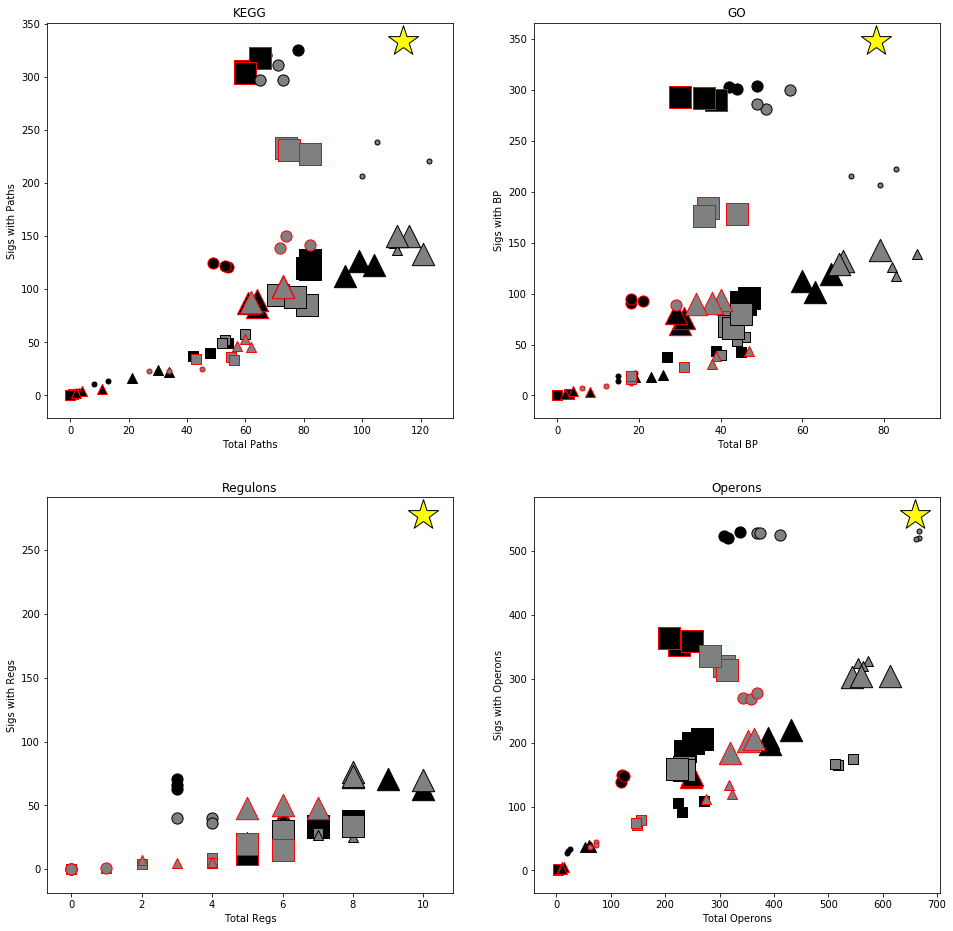

In [303]:
5plimk=10
plimg=10
plimr=10
plimo=10
xd=2
yd=2
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
x = ((model_dict['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

x = ((model_dict['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

x = ((model_dict['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

x = ((model_dict['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(3):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                   
                    
                    x = ((model_temp.go_ps > plimg).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plimg).sum(1) > 0).sum()
                    ax[0,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.regs_ps > plimr).sum(0) > 0).sum()
                    y = ((model_temp.regs_ps > plimr).sum(1) > 0).sum()
                    ax[1,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.ops_ps > plimo).sum(0) > 0).sum()
                    y = ((model_temp.ops_ps > plimo).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)

                ec='red'
            mi = mi+1
        s=500
    c = 'grey'



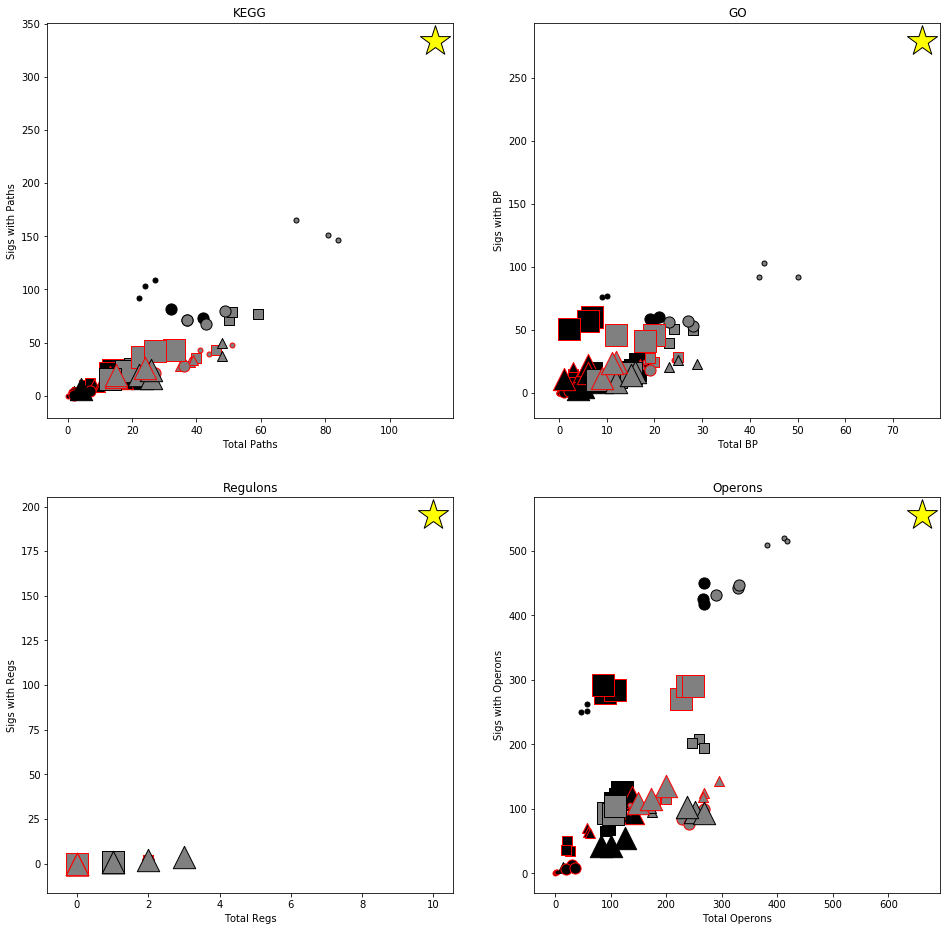

In [207]:
plimk=10
plimg=10
plimr=10
plimo=10
xd=2
yd=2
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
x = ((model_dict['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

x = ((model_dict['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

x = ((model_dict['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

x = ((model_dict['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(3):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict_seq[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.go_ps > plimg).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plimg).sum(1) > 0).sum()
                    ax[0,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.regs_ps > plimr).sum(0) > 0).sum()
                    y = ((model_temp.regs_ps > plimr).sum(1) > 0).sum()
                    ax[1,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.ops_ps > plimo).sum(0) > 0).sum()
                    y = ((model_temp.ops_ps > plimo).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)

                ec='red'
            mi = mi+1
        s=500
    c = 'grey'



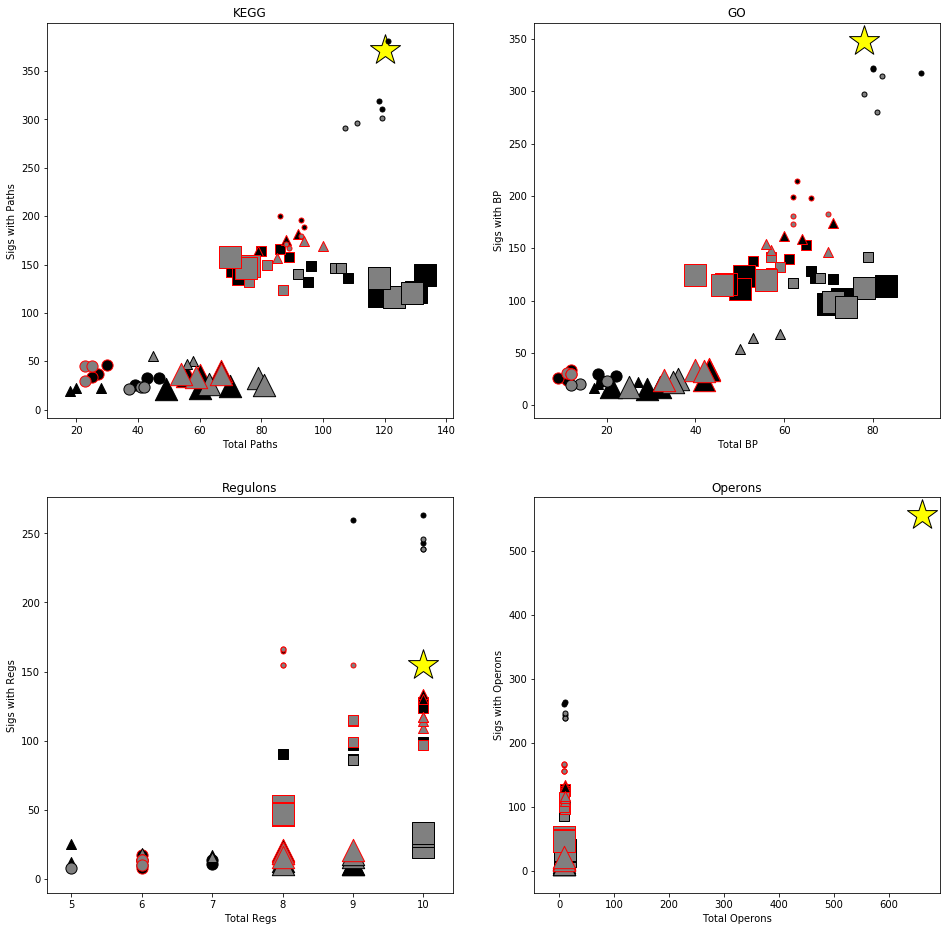

In [532]:
plimk=10
plimg=10
plimr=10
plimo=10
xd=2
yd=2
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
x = ((model_dict['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

x = ((model_dict['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

x = ((model_dict['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

x = ((model_dict['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(3):
                    seed = str(se+560)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict2[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.go_ps > plimg).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plimg).sum(1) > 0).sum()
                    ax[0,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.regs_ps > plimr).sum(0) > 0).sum()
                    y = ((model_temp.regs_ps > plimr).sum(1) > 0).sum()
                    ax[1,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                   # x = ((model_temp.ops_ps > plimo).sum(0) > 0).sum()
                   # y = ((model_temp.ops_ps > plimo).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)

                ec='red'
            mi = mi+1
        s=500
    c = 'grey'



In [526]:
fig.savefig('array_enrichments.png')

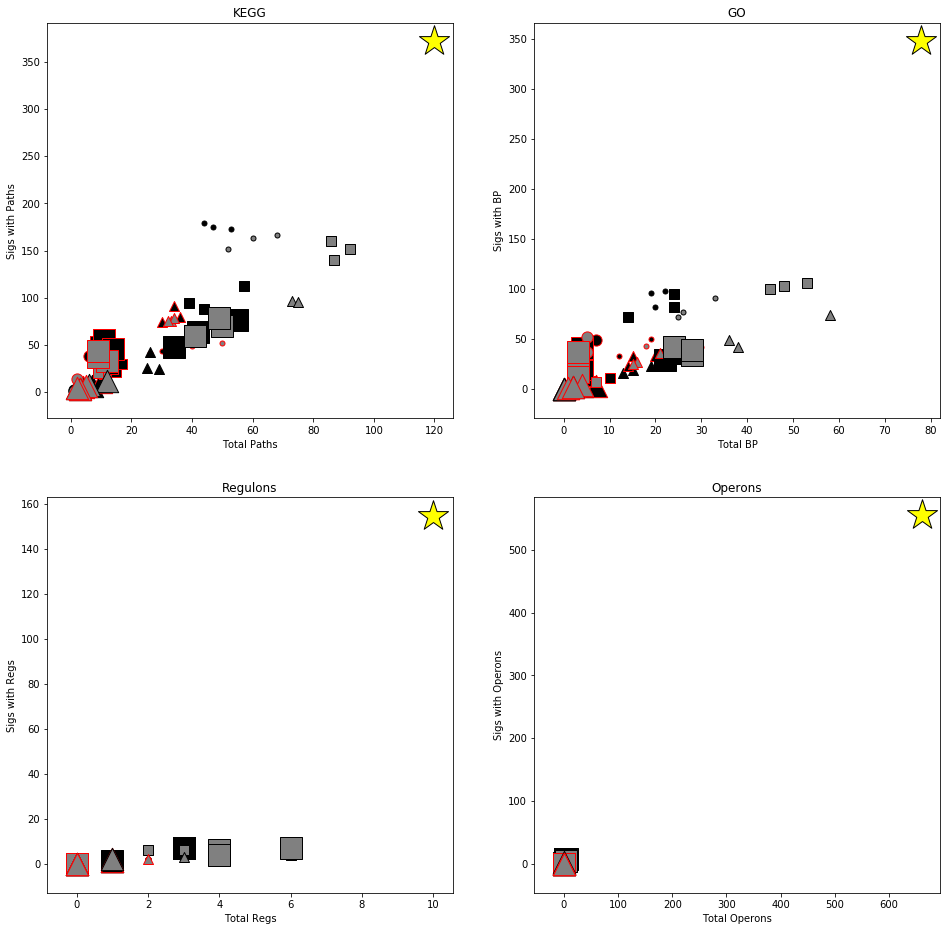

In [527]:
plimk=10
plimg=10
plimr=10
plimo=10
xd=2
yd=2
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
x = ((model_dict['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

x = ((model_dict['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

x = ((model_dict['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

x = ((model_dict['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(3):
                    seed = str(se+560)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict_seq2[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.go_ps > plimg).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plimg).sum(1) > 0).sum()
                    ax[0,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.regs_ps > plimr).sum(0) > 0).sum()
                    y = ((model_temp.regs_ps > plimr).sum(1) > 0).sum()
                    ax[1,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                   # x = ((model_temp.ops_ps > plimo).sum(0) > 0).sum()
                   # y = ((model_temp.ops_ps > plimo).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)

                ec='red'
            mi = mi+1
        s=500
    c = 'grey'



In [1]:
model_dict_seq3

NameError: name 'model_dict_seq3' is not defined

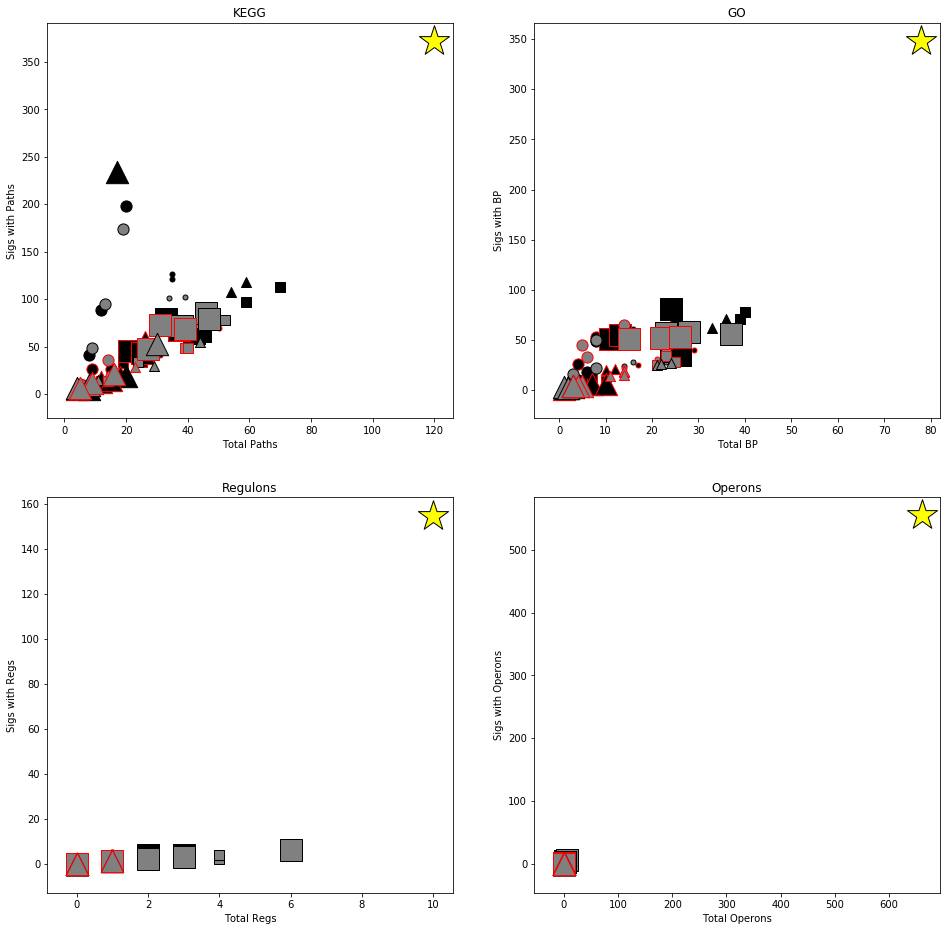

In [533]:
plimk=10
plimg=10
plimr=10
plimo=10
xd=2
yd=2
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
x = ((model_dict['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

x = ((model_dict['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

x = ((model_dict['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

x = ((model_dict['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(3):
                    seed = str(se+560)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict_seq3[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.go_ps > plimg).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plimg).sum(1) > 0).sum()
                    ax[0,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.regs_ps > plimr).sum(0) > 0).sum()
                    y = ((model_temp.regs_ps > plimr).sum(1) > 0).sum()
                    ax[1,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                   # x = ((model_temp.ops_ps > plimo).sum(0) > 0).sum()
                   # y = ((model_temp.ops_ps > plimo).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)

                ec='red'
            mi = mi+1
        s=500
    c = 'grey'



In [529]:
fig.savefig('seq_enrichments.png')

In [280]:
for m in model_dict_seq3:
    model_dict_seq3[m].set_hwg_cutoff(2.0)
    #model_dict_seq[m].set_op('node_interpretation/operons_format.txt')
    #print('op done')
    model_dict_seq3[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    #print('kegg done')
    model_dict_seq3[m].set_go('node_interpretation/manual_GO_BP_terms.txt') 
    #print('go done')
    model_dict_seq3[m].set_reg('node_interpretation/regulons_format.txt')
    #print('reg done')
    print(m)
print('dict seq done') 

plimk=10
plimg=10
plimr=10
plimo=10
xd=2
yd=2
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
x = ((model_dict_seq3['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
y = ((model_dict_seq3['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

x = ((model_dict_seq3['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
y = ((model_dict_seq3['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

x = ((model_dict_seq3['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
y = ((model_dict_seq3['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

#x = ((model_dict['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
#y = ((model_dict['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
#ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(3):
                    seed = str(se+560)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict_seq3[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.go_ps > plimg).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plimg).sum(1) > 0).sum()
                    ax[0,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.regs_ps > plimr).sum(0) > 0).sum()
                    y = ((model_temp.regs_ps > plimr).sum(1) > 0).sum()
                    ax[1,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                   # x = ((model_temp.ops_ps > plimo).sum(0) > 0).sum()
                   # y = ((model_temp.ops_ps > plimo).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)

                ec='red'
            mi = mi+1
        s=500
    c = 'grey'


False

## WRITE OUT GENE LISTS

In [443]:
model_dict3

{'tf_adage': <Adage.Adage at 0x7f6bffe070d0>,
 'ad_glorot_uniform_0_sigmoid_tiedTrue560': <Adage.Adage at 0x7f6b8487a310>,
 'ad_glorot_uniform_0_sigmoid_tiedTrue561': <Adage.Adage at 0x7f6c08843ed0>,
 'ad_glorot_uniform_0_sigmoid_tiedTrue562': <Adage.Adage at 0x7f6ba71e2150>,
 'ad_glorot_uniform_0_sigmoid_tiedFalse560': <Adage.Adage at 0x7f6c03ac6050>,
 'ad_glorot_uniform_0_sigmoid_tiedFalse561': <Adage.Adage at 0x7f6bfeb80850>,
 'ad_glorot_uniform_0_sigmoid_tiedFalse562': <Adage.Adage at 0x7f6b849ae650>,
 'ad_glorot_uniform_0_tanh_tiedTrue560': <Adage.Adage at 0x7f6b849ae6d0>,
 'ad_glorot_uniform_0_tanh_tiedTrue561': <Adage.Adage at 0x7f6b84861f50>,
 'ad_glorot_uniform_0_tanh_tiedTrue562': <Adage.Adage at 0x7f6b84813d10>,
 'ad_glorot_uniform_0_tanh_tiedFalse560': <Adage.Adage at 0x7f6b849c2890>,
 'ad_glorot_uniform_0_tanh_tiedFalse561': <Adage.Adage at 0x7f6bb8a7db90>,
 'ad_glorot_uniform_0_tanh_tiedFalse562': <Adage.Adage at 0x7f6b85252690>,
 'ad_glorot_uniform_0_relu_tiedTrue560': <

In [563]:
name = 'ad_glorot_normal_1e-05_tanh_tiedTrue560'
name = 'ad_glorot_uniform_0_tanh_tiedTrue560'
name = 'ad_glorot_uniform_0_sigmoid_tiedTrue560'
name = 'ad_glorot_normal_1e-05_tanh_tiedTrue560'
model_names = ['tf_adage','ad_glorot_normal_1e-05_tanh_tiedTrue560', 'ad_glorot_uniform_0_tanh_tiedTrue560',
              'ad_glorot_uniform_0_sigmoid_tiedTrue560']
hwgc = 0.0

for m in model_names:
    #model_temp = model_dict_seq3[name]
    model_temp = model_dict3[m]
    model_temp.set_hwg_cutoff(hwgc)
    hw_gene_lists = []
    weight_lists = []
    for n in range(model_temp.hw_genes_all.shape[1]):
        genes_temp = ['node'+str(n)]
        weights_temp = [1]
        for g in range(model_temp.hw_genes_all.shape[0]):
            if(model_temp.hw_genes_all[g,n]):
                #print(g)
                genes_temp.append(model_temp.compendium.index[g])
                weights_temp.append(abs(model_temp.weights[g,n % model_temp.weights.shape[1]]))

        genes_temp_sorted = [x for _,x in sorted(zip(weights_temp, genes_temp), reverse=True)]
        weights_temp_sorted = [x for _,x in sorted(zip(weights_temp, weights_temp), reverse=True)]
        hw_gene_lists.append(genes_temp_sorted)
        weight_lists.append(weights_temp_sorted)
        
    hw_gene_df = pd.DataFrame(hw_gene_lists).fillna('').values  
    hw_weight_df = pd.DataFrame(weight_lists).fillna(0).values  
    #hw_gene_lists[1]
    #write_data('test_hwgs.csv', hw_gene_lists)
    with open( 'new_models/' + m + "array_hwgs_" + str(hwgc) + ".csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(hw_gene_df)
    with open(  'new_models/' + m + "array_hwg_weights_" + str(hwgc) + ".csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(hw_weight_df)
        
    with open(  'new_models/' + m + "array_weights.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(model_temp.weights)
        
        
for m in model_names:
    #model_temp = model_dict_seq3[name]
    model_temp = model_dict_seq3[m]
    model_temp.set_hwg_cutoff(hwgc)
    hw_gene_lists = []
    weight_lists = []
    for n in range(model_temp.hw_genes_all.shape[1]):
        genes_temp = ['node'+str(n)]
        weights_temp = [1]
        for g in range(model_temp.hw_genes_all.shape[0]):
            if(model_temp.hw_genes_all[g,n]):
                #print(g)
                genes_temp.append(model_temp.compendium.index[g])
                weights_temp.append(abs(model_temp.weights[g,n % model_temp.weights.shape[1]]))

        genes_temp_sorted = [x for _,x in sorted(zip(weights_temp, genes_temp), reverse=True)]
        weights_temp_sorted = [x for _,x in sorted(zip(weights_temp, weights_temp), reverse=True)]
        hw_gene_lists.append(genes_temp_sorted)
        weight_lists.append(weights_temp_sorted)
        
    hw_gene_df = pd.DataFrame(hw_gene_lists).fillna('').values  
    hw_weight_df = pd.DataFrame(weight_lists).fillna(0).values 
    #hw_gene_lists[1]
    #write_data('test_hwgs.csv', hw_gene_lists)
    with open(  'new_models/' + m + "seq_hwgs_" + str(hwgc) + ".csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(hw_gene_df)
    with open(  'new_models/' + m + "seq_hwg_weights_" + str(hwgc) + ".csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(hw_weight_df)
        
    with open(  'new_models/' + m + "seq_weights.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(model_temp.weights)

## write out enrichments

In [497]:
model_temp.kegg_ps

[]

In [519]:
name = 'tf_adage'
#name = 'ad_glorot_uniform_0_tanh_tiedTrue560'
model_dict_seq3[name].set_reg('node_interpretation/regulons_format.txt') 

0    Anr_regulon  PhoB_regulon  PvdR_regulon  PchR_regulon  AlgU_regulon  \
0       3.515272      0.777285      6.718862      3.111741      0.506846   
1       1.310983      0.682734      2.831144      2.981172      1.290197   
2       2.198471      1.462515      3.794460      3.947171      1.120229   
3       1.929693      3.098536      3.510287      3.662458      0.893108   
4       2.584913      4.466859      4.196414      4.349664      1.463733   
..           ...           ...           ...           ...           ...   
595    12.675450      3.648236      3.794460      3.947171      2.917954   
596     2.010416      3.262092      3.596129      3.748480      0.960088   
597     0.978063      0.427115      2.439636      2.587536      0.773726   
598     1.513812      2.276593      3.058929      3.209848      1.635339   
599    10.600472      0.579607      2.681651      2.830968      0.345512   

0    LasR_regulon  RhlR_regulon  PqsR_regulon  QscR_regulon  VreI_regulon  
0        0.680917      0.978198      0.916936      5.784154      2.227616  
1        1.678492      0.875319      0.816353      1.372065      2.101811  
2        1.344428      1.699294      1.628226      0.703815      3.043832  
3       13.889035      3.582050      8.913920     15.062785      2.763947  
4        7.329671      2.072309      1.998633      5.030659      3.441481  
..            ...           ...           ...           ...           ...  
595      1.344428      1.699294      6.890549      0.703815      3.043832  
596      5.341711      1.520056      1.450692      3.194471      2.848361  
597      1.096440      1.664003      1.545833      5.601526      1.727069  
598      8.129610      1.057647      0.994820      0.894500      2.322539  
599      0.494487      3.761317      3.558405      0.126863      1.957933  

[600 rows x 10 columns]

In [520]:

name = 'ad_glorot_normal_1e-05_tanh_tiedTrue560'
name = 'ad_glorot_uniform_0_tanh_tiedTrue560'
name = 'ad_glorot_uniform_0_sigmoid_tiedTrue560'
name = 'ad_glorot_normal_1e-05_tanh_tiedTrue560'
name = 'tf_adage'
model_temp = model_dict_seq3[name]
#model_temp = model_dict3[name]

node_paths_list=[]
for n in range(model_temp.hw_genes_all.shape[1]):
    paths_temp = ['node'+str(n)]
    for k in range(model_temp.regs_ps.shape[1]):
        if(model_temp.regs_ps.loc[n][k] > -np.log(0.01)):
            paths_temp.append(model_temp.regs_ps.columns[k])
    node_paths_list.append(paths_temp)
node_paths_list

with open("jie_adage_regs.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(node_paths_list)